# 小红书热评数据挖掘与用户画像分析

## 项目概述
本项目是一个综合性的小红书热门评论数据挖掘与分析工具。通过爬取小红书热门笔记的评论数据，结合NLP技术和数据可视化，深入分析小红书用户的行为特征、评论模式和互动习惯，最终生成高赞用户画像报告。

## 数据采集内容
项目爬取的原始数据包括：
- **用户基本信息**：昵称、性别、达人等级
- **评论内容**：文字内容、回复对象、评论层级(一级/二级)
- **互动指标**：点赞数量、收藏数、二级评论数
- **时间特征**：回复时间戳

## 分析维度
本笔记本将从以下维度进行探索性数据分析(EDA)：
1. **时间特征分析**：点赞时段分布、评论发布时间与热度关系
2. **互动关系分析**：一级评论点赞数与二级评论数的关系、评论网络结构
3. **内容特征分析**：情感极性分析、表情符号使用、信息熵特征
4. **用户特征分析**：达人等级与点赞关系、用户互动行为模式

## 实用价值
- 为内容创作者提供受众用户画像
- 帮助理解高赞评论的特征规律
- 揭示小红书社区互动模式和用户行为特点
- 为社区运营与内容策略提供数据支持

通过下面的代码块，我们将完成环境配置、数据爬取、特征提取及丰富的可视化分析，最终生成全面的用户画像报告。

# 第一步 配置环境

在进行小红书热评数据挖掘之前，我们需要先安装必要的Python库文件。这些库包括：

- **requests**：用于发送HTTP请求，抓取小红书API数据
- **openpyxl**：处理Excel格式的数据存储和读取
- **pandas**：强大的数据分析和处理工具，用于结构化数据操作
- **matplotlib**：用于数据可视化，绘制各类统计图表
- **pyvis**：用于交互式网络可视化，展示评论关系网络
- **其他NLP相关库**：用于文本分析、情感提取等任务

通过运行下方的pip指令，我们将从requirements.txt文件中安装所有依赖。确保安装过程顺利完成后，再进行后续的数据爬取和分析工作。如果某些库已经安装，系统会自动跳过，只安装缺失的库。

In [1]:
pip install -r requirements.txt



> 注意：如果遇到安装问题，可能需要升级pip或手动安装特定版本的库。

# 第二步 运行下方代码，爬取小红书热门评论信息

在这一步中，我们将使用构建好的爬虫程序从小红书获取热门笔记评论数据。这个爬虫实现了以下几个关键功能：

- **热门笔记获取**：自动获取小红书探索页推荐的热门笔记列表
- **多级评论处理**：同时识别一级评论和二级回复评论，正确标记评论层级关系
- **智能评论识别**：通过点赞数和回复数特征，智能识别特殊形式的二级评论
- **自动备份机制**：按照设定频率自动备份数据，防止意外中断导致数据丢失
- **数据结构化存储**：将爬取的评论数据保存为Excel文件，便于后续分析

爬虫工作流程如下：
1. 访问小红书探索页，获取推荐的热门笔记列表
2. 根据设定的爬取帖子数量收集笔记详情
3. 依次打开每个笔记，提取评论区域中的一级评论
4. 记录评论的用户信息、内容、点赞数、二级回复数等关键数据
5. 按设定频率自动备份，确保数据安全
6. 将所有数据整合并保存到Excel文件中

爬取的评论数据包含用户昵称、评论内容、点赞数、发布时间、评论层级、被回复用户等丰富信息，为后续分析提供完整数据基础。

> **注意事项**：
> - 请合理控制爬取频率，避免对小红书服务器造成过大压力
> - 程序中已设置随机等待时间和模拟人类操作，减少被封禁风险
> - 小红书对爬虫检测较为严格，建议不要设置过多的爬取数量
> - 爬取大量数据可能需要较长时间，请耐心等待
> - 爬取时注意遵守平台规则，仅用于学习研究目的

## 第一段：参数确认

在运行爬虫代码前，请确认您已经通过运行上方单元格，正确设置并保存了以下参数：
- **隐藏浏览器窗口**：选择是否在后台运行浏览器，不显示界面
- **爬取帖子数**：控制要爬取的笔记数量，数值越大获取的数据越多
- **备份频率**：设置每爬取多少个帖子备份一次数据（0表示不备份）
- **输出文件路径**：爬取的数据将保存到此Excel文件中

请检查控制面板中显示的值是否符合您的需求，并确保已经点击了"保存配置"按钮。状态区域应该显示"配置已保存"的消息。

## 第二段：执行提示

现在您可以点击"登录获取Cookies"按钮，待浏览器成功加载小红书页面后，再点击"开始爬取"按钮开始收集数据。爬取过程中，日志控制台会显示实时进度，包括当前爬取的笔记信息和评论内容。

请注意：
- 爬取过程可能需要几分钟到几十分钟不等，取决于参数设置和网络状况
- 如果遇到网络错误或平台限制，程序会自动重试或跳过问题笔记
- 爬取完成后，数据将自动保存到指定的Excel文件中，可以在下一步中进行分析
- 首次使用时需要手动完成登录操作，登录成功后cookies将自动保存供后续使用

完成设置后请点击相应按钮开始操作，耐心等待直到爬取过程完全结束。

In [1]:
# 导入自动爬虫类
import sys
import os
import time
import json
import atexit
from datetime import datetime, timedelta
import random

# 添加当前目录到Python path
module_path = os.path.dirname(os.path.abspath('auto_crawler.py'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from fake_useragent import UserAgent

# 日志系统类
class LogSystem:
    """可折叠的日志系统类"""
    
    def __init__(self):
        """初始化日志系统"""
        # 日志输出区域
        self.log_output = widgets.Output(
            layout={
                'border': '1px solid #ddd', 
                'padding': '10px', 
                'overflow': 'auto',
                'background-color': '#f5f5f5',
                'font-family': 'monospace',
                'font-size': '12px',
                'line-height': '1.2'
            }
        )
        
        # 日志设置
        self.log_settings = {
            'level': 'INFO',
            'levels': {
                'VERBOSE': 0,
                'INFO': 1,
                'WARNING': 2,
                'ERROR': 3
            },
            'colors': {
                'VERBOSE': 'gray',
                'INFO': 'blue',
                'WARNING': 'orange',
                'ERROR': 'red'
            }
        }
        
        # 存储日志内容
        self.log_contents = []
        
        # 日志控制组件
        self.height_slider = widgets.IntSlider(
            value=300,
            min=100,
            max=800,
            step=50,
            description='日志高度:',
            disabled=False,
            continuous_update=True,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style={'description_width': 'initial'}
        )
        
        self.log_level = widgets.Dropdown(
            options=[
                ('详细', 'VERBOSE'), 
                ('信息', 'INFO'), 
                ('警告', 'WARNING'), 
                ('错误', 'ERROR')
            ],
            value='INFO',
            description='日志级别:',
            style={'description_width': 'initial'},
            layout={'width': '200px'}
        )
        
        self.clear_log_button = widgets.Button(
            description='清除日志',
            disabled=False,
            button_style='warning',
            tooltip='清除当前所有日志',
            icon='trash'
        )
        
        self.export_log_button = widgets.Button(
            description='导出日志',
            disabled=False,
            button_style='info',
            tooltip='导出日志到文件',
            icon='download'
        )
        
        # 折叠控件 - 调整标题，使其更明显
        self.accordion = widgets.Accordion(
            children=[
                widgets.VBox([
                    widgets.HBox([self.height_slider, self.log_level, self.clear_log_button, self.export_log_button]),
                    self.log_output
                ])
            ]
        )
        # 设置折叠标题，使其更加醒目
        self.accordion.set_title(0, '📋 日志控制台 (点击展开/折叠)')
        
        # 添加展开/折叠状态跟踪
        self.is_expanded = False

        # 绑定事件
        self.height_slider.observe(self.update_log_height, names='value')
        self.log_level.observe(self.update_log_level, names='value')
        self.clear_log_button.on_click(self.clear_logs)
        self.export_log_button.on_click(self.export_logs)
        
        # 初始化高度
        self.log_output.layout.height = f'{self.height_slider.value}px'

    def toggle_log_panel(self, b=None):
        """切换日志面板的展开/折叠状态"""
        if self.is_expanded:
            self.accordion.selected_index = None  # 折叠
            self.toggle_button.description = '展开日志'
            self.toggle_button.icon = 'plus'
            self.is_expanded = False
        else:
            self.accordion.selected_index = 0  # 展开
            self.toggle_button.description = '折叠日志'
            self.toggle_button.icon = 'minus'
            self.is_expanded = True
    
    def update_log_height(self, change):
        """更新日志区域高度"""
        self.log_output.layout.height = f'{change["new"]}px'
    
    def update_log_level(self, change):
        """更新日志级别"""
        self.log_settings['level'] = change['new']
        # 重新显示符合当前级别的日志
        self.refresh_logs()
    
    def clear_logs(self, b=None):
        """清除日志"""
        with self.log_output:
            self.log_output.clear_output()
            self.log_contents.clear()
            print(f"[{datetime.now().strftime('%H:%M:%S')}] 日志已清除")
    
    def export_logs(self, b=None):
        """导出日志到文件"""
        if not self.log_contents:
            with self.log_output:
                print(f"[{datetime.now().strftime('%H:%M:%S')}] [WARNING] 没有可导出的日志内容")
            return
            
        try:
            log_dir = './logs'
            if not os.path.exists(log_dir):
                os.makedirs(log_dir)
                
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            log_file = f"{log_dir}/xhs_crawler_log_{timestamp}.txt"
            
            with open(log_file, 'w', encoding='utf-8') as f:
                for log_item in self.log_contents:
                    f.write(f"{log_item['timestamp']} [{log_item['level']}] {log_item['message']}\n")
                    
            with self.log_output:
                print(f"[{datetime.now().strftime('%H:%M:%S')}] [INFO] 日志已导出到: {log_file}")
                
        except Exception as e:
            with self.log_output:
                print(f"[{datetime.now().strftime('%H:%M:%S')}] [ERROR] 导出日志失败: {str(e)}")
    
    def refresh_logs(self):
        """刷新日志显示"""
        current_level_value = self.log_settings['levels'][self.log_settings['level']]
        displayed_logs = set()  # 防止重复显示相同日志
        
        with self.log_output:
            self.log_output.clear_output()
            for log_item in self.log_contents:
                level = log_item['level']
                if self.log_settings['levels'][level] >= current_level_value:
                    log_id = f"{log_item['timestamp']}_{log_item['message']}"
                    if log_id not in displayed_logs:
                        print(f"[{log_item['timestamp']}] [{level}] {log_item['message']}")
                        displayed_logs.add(log_id)
    
    def log(self, message, level='INFO'):
        """记录日志消息"""
        timestamp = datetime.now().strftime('%H:%M:%S')
        
        # 创建日志项
        log_item = {
            'timestamp': timestamp,
            'level': level,
            'message': message
        }
        
        # 添加到日志内容列表
        self.log_contents.append(log_item)
        
        # 显示符合当前级别的日志
        if self.log_settings['levels'][level] >= self.log_settings['levels'][self.log_settings['level']]:
            with self.log_output:
                print(f"[{timestamp}] [{level}] {message}")
    
    def display(self):
        """显示日志控制台"""
        # 显示展开/折叠按钮和折叠面板
        display(self.accordion)
        # 默认折叠
        self.accordion.selected_index = None
        self.is_expanded = False
        
        # 记录初始化完成信息
        self.log("日志系统初始化完成", "INFO")
        self.log(f"设置日志级别为: {self.log_level.value}", "INFO")

# 在文件顶部初始化日志系统
log_system = LogSystem()  # 创建日志系统单例

class UISystem:
    """小红书爬虫UI管理系统"""
    
    def __init__(self, log_system):
        """初始化UI系统"""
        self.log_system = log_system  # 保存日志系统引用
        
        # 全局变量存储
        self.cookies_storage = {"cookies": "", "timestamp": None}
        self.browser_instance = {"driver": None, "created_at": None}
        self.config_storage = {
            "headless": False, 
            "max_notes": 20, 
            "output_file": "./result/XHS/comment_output.xlsx",
            "backup_frequency": 3  # 默认每3个帖子备份一次
        }
        self.login_completed = False  # 跟踪登录状态
        
        # 创建参数控制界面
        self.headless_checkbox = widgets.Checkbox(
            value=False,
            description='隐藏浏览器窗口',
            disabled=False
        )

        self.max_notes_slider = widgets.IntSlider(
            value=20,
            min=5,
            max=100,
            step=5,
            description='爬取帖子数:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d'
        )

        self.backup_frequency_slider = widgets.IntSlider(
            value=3,
            min=0,
            max=20,
            step=1,
            description='备份频率:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            tooltip='每爬取多少个帖子备份一次，0表示不备份'
        )

        self.backup_frequency_label = widgets.HTML(
            value="<span style='font-size: 12px; color: #666;'>每爬取多少篇帖子备份一次，0表示不备份</span>"
        )

        self.output_file = widgets.Text(
            value='./result/XHS/comment_output.xlsx',
            placeholder='输入文件保存路径',
            description='输出文件:',
            disabled=False
        )

        self.save_config_button = widgets.Button(
            description='保存配置',
            disabled=False,
            button_style='primary',
            tooltip='保存爬取配置',
            icon='save'
        )

        self.login_button = widgets.Button(
            description='登录获取Cookies',
            disabled=False,
            button_style='info',
            tooltip='打开浏览器并登录获取Cookies',
            icon='sign-in'
        )

        self.crawl_button = widgets.Button(
            description='开始爬取',
            disabled=True,  # 初始禁用，直到登录成功
            button_style='success',
            tooltip='使用已获取的Cookies开始爬取评论',
            icon='play'
        )

        self.status_label = widgets.HTML(
            value="<div style='color:orange;'>请先保存配置，然后登录获取Cookies</div>"
        )

        self.progress_bar = widgets.IntProgress(
            value=0,
            min=0,
            max=100,
            description='进度:',
            style={'bar_color': '#0078D7'},
            orientation='horizontal'
        )

        # 创建折叠面板
        self.accordion = widgets.Accordion(
            children=[
                widgets.VBox([
                    widgets.HBox([
                        widgets.VBox([
                            widgets.Label('1. 设置参数并保存配置:'),
                            widgets.VBox([
                                self.headless_checkbox,
                                self.max_notes_slider,
                                widgets.VBox([self.backup_frequency_slider, self.backup_frequency_label]),
                                self.output_file,
                                self.save_config_button
                            ])
                        ]),
                        widgets.VBox([
                            widgets.Label('2. 登录获取Cookies:'),
                            self.login_button,
                            widgets.Label('3. 开始爬取数据:'),
                            self.crawl_button,
                            widgets.Label('状态:'),
                            self.status_label,
                            self.progress_bar
                        ])
                    ])
                ])
            ]
        )

        # 添加搜索框
        self.search_box = widgets.Text(
            placeholder='搜索日志...',
            description='搜索:',
            style={'description_width': 'initial'},
            layout={'width': '250px'}
        )
        self.search_box.observe(self.search_logs, names='value')

        self.accordion.set_title(0, '小红书自动爬虫控制面板')

        self.output_area = widgets.Output()
        
        # 绑定事件
        self.save_config_button.on_click(self.save_config)
        self.login_button.on_click(self.login_and_get_cookies)
        self.crawl_button.on_click(self.start_crawling)
        self.max_notes_slider.observe(self.update_backup_frequency_max, names='value')
        
        # 尝试加载配置
        self.load_config()
        
    def log(self, message, level='INFO'):
        """通过日志系统记录日志"""
        self.log_system.log(message, level)
    
    def load_config(self):
        """从文件加载配置"""
        try:
            if os.path.exists("./config.json"):
                with open("./config.json", 'r', encoding='utf-8') as f:
                    loaded_config = json.load(f)
                    self.config_storage.update(loaded_config)
                    
                    # 更新UI控件值
                    self.headless_checkbox.value = self.config_storage["headless"]
                    # 兼容旧配置文件
                    if "max_notes" in self.config_storage:
                        self.max_notes_slider.value = self.config_storage["max_notes"]
                    elif "max_pages" in self.config_storage:
                        self.max_notes_slider.value = self.config_storage["max_pages"]
                        self.config_storage["max_notes"] = self.config_storage["max_pages"]
                        
                    # 设置备份频率(如果存在)
                    if "backup_frequency" in self.config_storage:
                        self.backup_frequency_slider.value = self.config_storage["backup_frequency"]
                    else:
                        self.config_storage["backup_frequency"] = self.backup_frequency_slider.value
                        
                    self.output_file.value = self.config_storage["output_file"]
                    
                    self.log("已加载保存的配置")
                    
            # 尝试加载cookies
            if os.path.exists("./cookies.json"):
                with open("./cookies.json", 'r', encoding='utf-8') as f:
                    cookies_data = json.load(f)
                    self.cookies_storage["cookies"] = cookies_data.get("cookies", "")
                    timestamp_str = cookies_data.get("timestamp")
                    if timestamp_str:
                        self.cookies_storage["timestamp"] = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
                    
                    # 更新登录按钮文本
                    self.update_login_button_text()
                    
                    # 如果有有效的cookies，启用爬取按钮
                    if self.cookies_storage["cookies"]:
                        self.crawl_button.disabled = False
                    
                    self.log("已加载保存的cookies")
        except Exception as e:
            self.log(f"加载配置或Cookies时出错: {str(e)}", "ERROR")
    
    def update_backup_frequency_max(self, change):
        """根据爬取帖子数动态调整备份频率滑块的最大值"""
        new_max_notes = change["new"]
        # 设置备份频率最大值为爬取帖子数
        self.backup_frequency_slider.max = new_max_notes
        # 如果当前值大于新的最大值，则调整当前值
        if self.backup_frequency_slider.value > new_max_notes:
            self.backup_frequency_slider.value = new_max_notes if new_max_notes > 0 else 0

    def save_config(self, b=None):
        """保存用户配置"""
        with self.output_area:
            self.output_area.clear_output()
            self.log(f"=== 开始保存配置 ===")
            
            # 保存配置到全局变量
            self.config_storage["headless"] = self.headless_checkbox.value
            self.config_storage["max_notes"] = self.max_notes_slider.value
            self.config_storage["output_file"] = self.output_file.value
            self.config_storage["backup_frequency"] = self.backup_frequency_slider.value
            
            # 创建输出目录(如果不存在)
            output_dir = os.path.dirname(self.output_file.value)
            if not os.path.exists(output_dir):
                try:
                    os.makedirs(output_dir)
                    self.log(f"创建输出目录: {output_dir}")
                except Exception as e:
                    self.log(f"创建输出目录失败: {str(e)}", "ERROR")
            
            # 保存配置到文件
            try:
                config_file = "./config.json"
                with open(config_file, 'w', encoding='utf-8') as f:
                    json.dump(self.config_storage, f, ensure_ascii=False, indent=2)
                self.log(f"配置已保存到 {config_file}")
            except Exception as e:
                self.log(f"保存配置文件失败: {str(e)}", "ERROR")
            
            # 更新状态
            self.log(f"配置保存完成!")
            self.log(f"- 隐藏浏览器: {self.config_storage['headless']}")
            self.log(f"- 爬取帖子数: {self.config_storage['max_notes']}")
            self.log(f"- 输出文件: {self.config_storage['output_file']}")
            self.log(f"- 备份频率: {self.config_storage['backup_frequency']}")
            
            self.status_label.value = "<div style='color:green;'>配置已保存 ✅<br>可以点击「登录获取Cookies」按钮继续</div>"
            self.log(f"=== 配置保存完成 ===")
    
    def update_login_button_text(self):
        """根据Cookies状态更新登录按钮文本"""
        if self.cookies_storage["cookies"]:
            self.login_button.description = '打开小红书'
            self.login_button.tooltip = '打开浏览器访问小红书'
            self.login_button.icon = 'external-link'
        else:
            self.login_button.description = '登录获取Cookies'
            self.login_button.tooltip = '打开浏览器并登录获取Cookies'
            self.login_button.icon = 'sign-in'

    def initialize_browser(self, headless=False):
        """初始化并返回一个优化的浏览器实例"""
        with self.output_area:
            self.log(f"开始初始化浏览器...")
            
            # 计时开始
            global_start = time.time()
            
            # 检查现有浏览器实例是否可用
            if self.browser_instance["driver"] is not None:
                try:
                    current_url = self.browser_instance["driver"].current_url
                    self.log(f"复用现有浏览器实例，当前URL: {current_url}")
                    return self.browser_instance["driver"]
                except Exception as e:
                    self.log(f"现有浏览器实例已失效: {str(e)}", "WARNING")
                    try:
                        self.browser_instance["driver"].quit()
                    except:
                        pass
                    finally:
                        self.browser_instance["driver"] = None
                        self.log(f"已重置浏览器实例")
            
            # 使用固定的缓存目录，保持登录状态
            start_time = time.time()
            cache_dir = os.path.join(os.getcwd(), "chrome_persistent_cache")
            
            # 确保目录存在
            if not os.path.exists(cache_dir):
                os.makedirs(cache_dir)
                self.log(f"创建持久化缓存目录: {cache_dir}")
            else:
                self.log(f"使用现有缓存目录: {cache_dir}")
                
            # 确保temp目录存在    
            temp_base_dir = self.ensure_temp_directory()
            
            # 在temp目录内创建chrome临时目录
            chrome_temp_name = f"chrome_temp_{datetime.now().strftime('%Y%m%d%H%M%S')}"
            temp_dir = os.path.join(temp_base_dir, chrome_temp_name)
            if not os.path.exists(temp_dir):
                os.makedirs(temp_dir)
            
            elapsed = time.time() - start_time
            self.log(f"缓存目录准备完成，耗时: {elapsed:.2f}秒")
            self.log(f"临时缓存目录: {temp_dir}")
            
            # 获取Chrome选项
            chrome_options = self.optimize_chrome_options(headless)
            chrome_options.add_argument(f'--user-data-dir={cache_dir}')
            chrome_options.add_argument(f'--disk-cache-dir={temp_dir}')
            
            try:
                # 使用ChromeDriverManager快速获取driver
                self.log(f"开始加载ChromeDriver...")
                start_time = time.time()
                
                driver_path = ChromeDriverManager().install()
                elapsed = time.time() - start_time
                self.log(f"ChromeDriver已下载: {driver_path}")
                self.log(f"ChromeDriver下载耗时: {elapsed:.2f}秒")
                
                start_time = time.time()
                driver = webdriver.Chrome(
                    service=Service(driver_path),
                    options=chrome_options
                )
                elapsed = time.time() - start_time
                self.log(f"Chrome实例创建完成，耗时: {elapsed:.2f}秒")
                
                # 绕过WebDriver检测
                start_time = time.time()
                driver.execute_script(
                    "Object.defineProperty(navigator, 'webdriver', {get: () => undefined})"
                )
                elapsed = time.time() - start_time
                self.log(f"WebDriver检测绕过，耗时: {elapsed:.2f}秒")
                
                # 设置页面加载超时
                driver.set_page_load_timeout(60)  # 增加到60秒
                driver.set_script_timeout(60)  # 增加到60秒
                
                # 总耗时
                total_elapsed = time.time() - global_start
                self.log(f"浏览器初始化完成! 总耗时: {total_elapsed:.2f}秒")
                
                # 存储浏览器实例
                self.browser_instance["driver"] = driver
                self.browser_instance["created_at"] = datetime.now()
                
                return driver
                
            except Exception as e:
                self.log(f"浏览器初始化失败: {str(e)}", "ERROR")
                
                # 尝试使用备用方式启动
                try:
                    self.log(f"尝试备用方式启动浏览器...")
                    # 使用临时目录代替，同样放在temp文件夹下
                    temp_backup_name = f"chrome_backup_{datetime.now().strftime('%Y%m%d%H%M%S')}"
                    temp_cache_dir = os.path.join(temp_base_dir, temp_backup_name)
                    os.makedirs(temp_cache_dir, exist_ok=True)
                    
                    # 创建新选项不使用持久化缓存
                    chrome_options = self.optimize_chrome_options(headless)
                    chrome_options.add_argument(f'--user-data-dir={temp_cache_dir}')
                    
                    driver = webdriver.Chrome(
                        service=Service(driver_path),
                        options=chrome_options
                    )
                    
                    self.log(f"备用方式启动成功!")
                    
                    # 存储浏览器实例
                    self.browser_instance["driver"] = driver
                    self.browser_instance["created_at"] = datetime.now()
                    
                    return driver
                except Exception as backup_error:
                    self.log(f"备用方式启动也失败: {str(backup_error)}", "ERROR")
                    raise e

    def login_and_get_cookies(self, b=None):
        """根据Cookie情况打开小红书或登录获取Cookies"""
        self.login_completed = False
        
        with self.output_area:
            self.output_area.clear_output()
            
            # 检查是否已有Cookie，决定行为
            if self.cookies_storage["cookies"]:
                self.log("=== 打开小红书网站 ===")
                self.status_label.value = "<div style='color:blue;'>正在启动浏览器...</div>"
            else:
                self.log("=== 开始登录流程 ===")
                self.status_label.value = "<div style='color:blue;'>正在启动浏览器准备登录...</div>"
            
            # 禁用按钮防止重复点击
            self.login_button.disabled = True
            self.save_config_button.disabled = True
            
            try:
                # 使用保存的配置参数初始化浏览器
                driver = self.initialize_browser(self.config_storage["headless"])
                
                # 无论是否有cookies都访问小红书网站
                self.status_label.value = "<div style='color:blue;'>正在访问小红书...</div>"
                try:
                    driver.get('https://www.xiaohongshu.com/explore')
                    
                    # 等待页面加载完成
                    try:
                        selectors_to_try = [
                            "section.note-item", 
                            "div[class*='note-item']", 
                            "div.feed-item", 
                            "a[href*='/explore/']"
                        ]
                        for selector in selectors_to_try:
                            try:
                                self.log(f"尝试查找元素: {selector}", "VERBOSE")
                                WebDriverWait(driver, 30).until(  # 增加到30秒
                                    EC.presence_of_element_located((By.CSS_SELECTOR, selector))
                                )
                                self.log(f"成功找到元素: {selector}")
                                break
                            except Exception as e:
                                self.log(f"未找到元素 {selector}: {str(e)}", "VERBOSE")
                                continue
                    except Exception as e:
                        self.log(f"等待页面加载完成时出错: {str(e)}", "ERROR")
                    
                    self.log("成功访问小红书主页")
                    self.log(f"当前URL: {driver.current_url}")
                    self.log(f"页面标题: {driver.title}")
                    
                    # 从打开的浏览器获取cookies
                    selenium_cookies = driver.get_cookies()
                    cookie_dict = {cookie['name']: cookie['value'] for cookie in selenium_cookies}
                    cookie_str = '; '.join([f"{k}={v}" for k, v in cookie_dict.items()])
                    self.cookies_storage["cookies"] = cookie_str
                    self.cookies_storage["timestamp"] = datetime.now()
                    self.log(f"自动更新cookies，共 {len(selenium_cookies)} 个")
                    
                    # 保存cookies到文件
                    cookie_file = "./cookies.json"
                    with open(cookie_file, 'w', encoding='utf-8') as f:
                        json.dump({
                            "cookies": cookie_str,
                            "timestamp": datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                        }, f)
                    
                    # 更新登录按钮文本
                    self.update_login_button_text()
                    
                    self.status_label.value = "<div style='color:green;'>已打开小红书 ✅<br>可以随时开始爬取</div>"
                    
                    # 确保爬取按钮可用
                    self.crawl_button.disabled = False
                    
                except Exception as e:
                    self.log(f"访问小红书网站时出错: {str(e)}", "ERROR")
                    self.status_label.value = f"<div style='color:red;'>访问小红书失败: {str(e)}</div>"
            
            except Exception as e:
                self.log(f"浏览器操作出错: {str(e)}", "ERROR")
                self.status_label.value = f"<div style='color:red;'>操作失败: {str(e)}</div>"
            
            finally:
                # 重新启用按钮
                self.login_button.disabled = False
                self.save_config_button.disabled = False
                self.log("=== 操作完成 ===")

    def ensure_temp_directory(self):
        """确保temp目录存在，用于存放所有临时文件，并清理过期文件"""
        temp_dir = os.path.join(os.getcwd(), "temp")
        if not os.path.exists(temp_dir):
            try:
                os.makedirs(temp_dir)
                self.log(f"创建temp目录: {temp_dir}")
            except Exception as e:
                self.log(f"创建temp目录失败: {str(e)}", "ERROR")
        
        # 清理48小时前的临时文件
        try:
            now = time.time()
            for item in os.listdir(temp_dir):
                item_path = os.path.join(temp_dir, item)
                # 只检查目录并且名称包含chrome_temp或chrome_backup
                if os.path.isdir(item_path) and ('chrome_temp' in item or 'chrome_backup' in item):
                    creation_time = os.path.getctime(item_path)
                    if (now - creation_time) > (48 * 3600):  # 48小时
                        try:
                            import shutil
                            shutil.rmtree(item_path)
                            self.log(f"清理过期临时目录: {item}")
                        except Exception as cleanup_err:
                            self.log(f"无法清理临时目录 {item}: {str(cleanup_err)}", "WARNING")
        except Exception as e:
            self.log(f"清理临时文件时出错: {str(e)}", "ERROR")
        
        return temp_dir

    def optimize_chrome_options(self, headless=False):
        """创建高性能Chrome选项"""
        ua = UserAgent()
        chrome_options = Options()
        
        # 计时开始
        start_time = time.time()
        self.log(f"配置Chrome选项...")
        
        # [Chrome选项设置代码与之前相同]
        
        elapsed = time.time() - start_time
        self.log(f"Chrome选项配置完成，耗时: {elapsed:.2f}秒")
        
        return chrome_options

    def display(self):
        """显示UI界面"""
        display(HTML("<h3>小红书自动爬虫参数设置</h3>"))
        display(self.accordion)

    def start_crawling(self, b=None):
        """开始爬取数据，复用已打开的浏览器实例"""
        with self.output_area:
            self.output_area.clear_output()
            self.log("=== 开始爬取流程 ===")
            
            # 创建temp目录(如果不存在)
            temp_dir = self.ensure_temp_directory()
            self.log(f"使用临时目录: {temp_dir}")
            
            # 检查浏览器实例，如果没有则先打开小红书
            if self.browser_instance["driver"] is None:
                self.log("检测到尚未打开浏览器，将自动启动")
                try:
                    driver = self.initialize_browser(self.config_storage["headless"])
                    # 自动打开小红书首页
                    driver.get('https://www.xiaohongshu.com/explore')
                    self.log("已自动打开小红书页面")
                    time.sleep(3)  # 等待页面加载
                except Exception as e:
                    self.log(f"❌ 浏览器初始化失败: {str(e)}", "ERROR")
                    self.status_label.value = f"<div style='color:red;'>浏览器初始化失败: {str(e)}</div>"
                    return
        
            # 更新页面到小红书首页（如果当前不是小红书页面）
            try:
                current_url = self.browser_instance["driver"].current_url
                if "xiaohongshu.com" not in current_url:
                    log_message(f"当前不在小红书网站，自动跳转...")
                    self.browser_instance["driver"].get('https://www.xiaohongshu.com/explore')
                    time.sleep(3)  # 等待页面加载
            except Exception as e:
                log_message(f"检查当前页面出错: {str(e)}")
            
            # 检查Cookie - 从浏览器中获取最新Cookie
            try:
                if self.browser_instance["driver"] is not None:
                    selenium_cookies = self.browser_instance["driver"].get_cookies()
                    cookie_dict = {cookie['name']: cookie['value'] for cookie in selenium_cookies}
                    cookie_str = '; '.join([f"{k}={v}" for k, v in cookie_dict.items()])
                    self.cookies_storage["cookies"] = cookie_str
                    self.cookies_storage["timestamp"] = datetime.now()
                    log_message(f"自动更新cookies，共 {len(selenium_cookies)} 个")
                    
                    # 保存cookies到文件，供爬虫程序使用
                    cookie_file = "./cookies.json"
                    with open(cookie_file, 'w', encoding='utf-8') as f:
                        json.dump({
                            "cookies": cookie_str,
                            "timestamp": datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                        }, f)
                    
                    # 更新登录按钮文本
                    self.update_login_button_text()
            except Exception as e:
                log_message(f"更新Cookies出错: {str(e)}")
            
            # 显示爬取参数
            log_message(f"爬取参数:")
            log_message(f"- 隐藏浏览器: {self.config_storage['headless']}")
            log_message(f"- 爬取帖子数: {self.config_storage['max_notes']}")
            log_message(f"- 输出文件: {self.config_storage['output_file']}")
            if self.cookies_storage["timestamp"]:
                log_message(f"- Cookies更新时间: {self.cookies_storage['timestamp'].strftime('%Y-%m-%d %H:%M:%S')}")
            
            # 禁用所有按钮
            self.crawl_button.disabled = True
            self.login_button.disabled = True
            self.save_config_button.disabled = True
            self.status_label.value = "<div style='color:blue;'>爬取进行中...</div>"
            
            try:
                
                # 重置进度条
                self.progress_bar.value = 0
                
                # 创建爬虫实例 - 使用单线程方式
                log_message(f"初始化爬虫...")
        
                crawler = XHSCrawler(
                    headless=self.config_storage["headless"],
                    max_notes=self.config_storage["max_notes"],
                    backup_frequency=self.config_storage["backup_frequency"],
                    cookies=self.cookies_storage["cookies"]
                )
                log_message(f"爬虫初始化成功")

                # 设置现有浏览器实例 - 这是关键步骤
                if self.browser_instance["driver"] is not None:
                    crawler.set_driver(self.browser_instance["driver"])
                    log_message(f"成功设置已有浏览器实例")

                # 设置进度回调函数
                def update_progress(current, total, message=""):
                    progress = int(current/total*100) if total > 0 else 0
                    self.progress_bar.value = progress
                    self.status_label.value = f"<div style='color:blue;'>爬取进行中... {progress}% - {message}</div>"
                    log_message(f"进度: {progress}% - {message}")

                crawler.set_progress_callback(update_progress)
                log_message(f"已设置进度回调函数")

                # 运行爬虫
                log_message(f"爬虫初始化完成，开始爬取数据...")
                start_time = time.time()

                # 运行爬虫，使用新的整合方法
                result = crawler.run(output_filename=self.config_storage["output_file"])
                
                elapsed = time.time() - start_time
                
                # 完成
                self.progress_bar.value = 100
                self.status_label.value = f"<div style='color:green;'>爬取完成! ✅<br>耗时: {elapsed:.1f}秒</div>"
                log_message(f"爬取完成! 总耗时: {elapsed:.1f}秒")
                
            except Exception as e:
                error_msg = str(e)
                log_message(f"❌ 爬虫运行出错: {error_msg}")
                self.status_label.value = f"<div style='color:red;'>爬取失败: {error_msg}</div>"
                
                # 显示更详细的错误信息
                import traceback
                traceback.print_exc()
                
            finally:
                # 重新启用所有按钮
                self.crawl_button.disabled = False
                self.login_button.disabled = False
                self.save_config_button.disabled = False
                log_message(f"=== 爬取流程结束 ===")
    
    # 搜索日志方法
    def search_logs(self, change):
        """根据关键词搜索日志"""
        search_term = change['new'].strip().lower()
        if not search_term:
            self.refresh_logs()  # 显示所有日志
            return
            
        with self.log_output:
            self.log_output.clear_output()
            for log_item in self.log_contents:
                if search_term in log_item['message'].lower():
                    print(f"[{log_item['timestamp']}] [{log_item['level']}] {log_item['message']}")

# 定义小红书爬虫类 - 整合自auto_crawler.py
# 这段代码替代了从外部导入的方式，直接将爬虫功能嵌入笔记本中
class XHSCrawler:
    """小红书自动爬虫类，负责获取评论数据"""
    
    def __init__(self, headless=False, max_notes=20, backup_frequency=3, cookies=None, progress_callback=None):
        """初始化爬虫"""
        self.ua = UserAgent()
        self.max_notes = max_notes
        self.backup_frequency = backup_frequency  # 添加备份频率属性
        self.cookies = cookies
        self.driver = None
        self.headless = headless
        self.progress_callback = progress_callback
        self.start_time = time.time()
        
        # 爬取状态追踪
        self.total_notes = 0
        self.processed_notes = 0
        
        # 确保结果目录存在
        results_dir = './result/XHS'
        if not os.path.exists(results_dir):
            os.makedirs(results_dir, exist_ok=True)
            
        # 日志时间格式化
        self.time_fmt = lambda: datetime.now().strftime('%H:%M:%S')

    def set_driver(self, driver):
        """设置外部提供的WebDriver实例"""
        self.driver = driver
        self.log("使用外部提供的浏览器实例")
        return self

    def log(self, message):
        """日志记录方法"""
        # 判断消息类型并分配日志级别
        level = "INFO"
        if "警告" in message or "warn" in message.lower():
            level = "WARNING"
        elif "错误" in message or "失败" in message or "error" in message.lower():
            level = "ERROR"
        elif "找到" in message or "检测" in message or "尝试" in message:
            level = "VERBOSE"
            
        # 记录到日志系统
        log_system.log(message, level)

    def set_progress_callback(self, callback_function):
        """设置进度回调函数"""
        self.progress_callback = callback_function
        self.log("已设置进度回调函数")
        
    def update_progress(self, message=""):
        """更新进度"""
        if self.total_notes > 0 and self.progress_callback:
            self.progress_callback(self.processed_notes, self.total_notes, message)
    
    def get_random_headers(self):
        """获取随机User-Agent的请求头"""
        headers = {
            'User-Agent': self.ua.random,
            'Accept': 'application/json, text/plain, */*',
            'Accept-Language': 'zh-CN,zh;q=0.9',
            'Referer': 'https://www.xiaohongshu.com/',
            'Origin': 'https://www.xiaohongshu.com',
            'Connection': 'keep-alive',
            'Content-Type': 'application/json;charset=UTF-8',
        }
        if self.cookies:
            headers['Cookie'] = self.cookies
        return headers
    
    def random_sleep(self, min_time=1, max_time=3):
        """随机休眠一段时间"""
        sleep_time = random.uniform(min_time, max_time)
        time.sleep(sleep_time)
    
    def get_unique_filename(self, output_filename):
        """
        生成唯一文件名，如果文件已存在则添加数字后缀
        例如: output.xlsx 如果存在会变为 output_1.xlsx
        """
        # 分离目录、基本文件名和扩展名
        directory = os.path.dirname(output_filename)
        basename = os.path.basename(output_filename)
        name, ext = os.path.splitext(basename)
        
        # 如果原始文件不存在，则直接返回
        if not os.path.exists(output_filename):
            return output_filename
        
        # 如果文件存在，添加递增的数字后缀
        counter = 1
        while True:
            # 生成新文件名: 例如 output_1.xlsx
            new_filename = os.path.join(directory, f"{name}_{counter}{ext}")
            
            # 如果新文件名不存在，返回它
            if not os.path.exists(new_filename):
                self.log(f"文件 {output_filename} 已存在，使用新文件名: {new_filename}")
                return new_filename
            
            # 否则增加计数器继续尝试
            counter += 1
    def get_and_process_notes(self, output_filename='./result/XHS/comment_output.xlsx'):
        """获取热门笔记并直接处理评论数据"""
        self.log("开始获取并处理小红书热门笔记...")
        notes_list = []
        total_comments = 0
        
        # 创建工作簿
        from openpyxl import Workbook
        workbook = Workbook()
        # 删除默认的Sheet
        if "Sheet" in workbook.sheetnames:
            workbook.remove(workbook.active)
        
        # 确保有浏览器实例
        if self.driver is None:
            self.log("警告: 没有浏览器实例，无法进行模拟点击")
            return
            
        try:
            # 访问小红书首页或发现页
            self.driver.get('https://www.xiaohongshu.com/explore')
            self.random_sleep(3, 5)  # 等待页面加载
            
            # 收集足够的笔记链接
            note_links = []
            max_refresh_attempts = 5  # 最多刷新5次页面
            refresh_count = 0
            
            while len(note_links) < self.max_notes and refresh_count < max_refresh_attempts:
                try:
                    # 基于提供的HTML结构定位笔记元素
                    WebDriverWait(self.driver, 20).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, "section.note-item"))
                    )
                    
                    # 获取所有笔记项
                    note_items = self.driver.find_elements(By.CSS_SELECTOR, "section.note-item")
                    self.log(f"在当前页面找到 {len(note_items)} 个笔记元素")
                    
                    # 提取新的笔记链接
                    new_links_count = 0
                    for idx, note_item in enumerate(note_items):
                        if len(note_links) >= self.max_notes:
                            break
                            
                        try:
                            # 获取链接
                            link_elem = note_item.find_element(By.CSS_SELECTOR, "a.cover[href*='/explore/']")
                            href = link_elem.get_attribute("href")
                            
                            # 获取标题
                            try:
                                title_elem = note_item.find_element(By.CSS_SELECTOR, "a.title span")
                                title = title_elem.text.strip()
                            except:
                                title = f"笔记_{len(note_links)+1}"
                            
                            # 获取作者
                            try:
                                author_elem = note_item.find_element(By.CSS_SELECTOR, "div.author-wrapper a.author span.name")
                                author = author_elem.text.strip()
                            except:
                                author = "未知作者"
                            
                            if href and "/explore/" in href:
                                note_id = href.split("/")[-1].split("?")[0]  # 处理可能的查询参数
                                
                                # 检查是否重复
                                is_duplicate = False
                                for _, existing_id, _, _ in note_links:
                                    if note_id == existing_id:
                                        is_duplicate = True
                                        break
                                
                                if not is_duplicate:
                                    self.log(f"添加笔记: {title} - 作者: {author}")
                                    note_links.append((title, note_id, author, href))
                                    new_links_count += 1
                        except Exception as e:
                            self.log(f"处理笔记元素时出错: {str(e)}")
                            continue
                    
                    self.log(f"当前已收集 {len(note_links)}/{self.max_notes} 个笔记，本次新增 {new_links_count} 个")
                    
                    # 如果没有找到足够的笔记且没有新增笔记，刷新页面获取更多
                    if len(note_links) < self.max_notes and new_links_count == 0:
                        refresh_count += 1
                        self.log(f"当前笔记数量不足，刷新页面获取更多 (第 {refresh_count}/{max_refresh_attempts} 次)")
                        self.driver.refresh()
                        self.random_sleep(3, 5)  # 等待页面加载
                    elif len(note_links) >= self.max_notes:
                        break
                    
                    # 如果当前页面有新增笔记但数量仍不足，尝试滚动加载更多
                    if len(note_links) < self.max_notes and new_links_count > 0:
                        self.log("尝试滚动页面加载更多笔记...")
                        self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                        self.random_sleep(2, 3)
                
                except Exception as e:
                    self.log(f"获取笔记列表出错: {str(e)}")
                    refresh_count += 1
                    self.log(f"尝试刷新页面 (第 {refresh_count}/{max_refresh_attempts} 次)")
                    self.driver.refresh()
                    self.random_sleep(3, 5)  # 等待页面加载
            
            # 使用收集到的笔记数量设置总数
            self.total_notes = len(note_links)
            self.log(f"最终收集到 {self.total_notes} 个笔记，开始处理...")
            
            # 逐个打开笔记并直接处理评论
            for idx, (title, note_id, author, href) in enumerate(note_links):
                try:
                    # 更新进度
                    self.processed_notes = idx
                    self.update_progress(f"正在处理: {title[:15]}...")
                    
                    self.log(f"正在打开笔记 {idx+1}/{len(note_links)}: {title}")
                    self.driver.get(href)
                    self.random_sleep(2, 4)  # 等待页面加载
                    
                    # 验证页面已正确加载
                    try:
                        WebDriverWait(self.driver, 10).until(
                            EC.presence_of_element_located((By.CSS_SELECTOR, "div[class*='content']"))
                        )
                        notes_list.append((title, note_id, author))
                        self.log(f"成功加载笔记: {title}")
                        
                        # 直接爬取当前笔记的评论
                        comments = self.fetch_note_comments_current_page(author)
                        
                        if comments:
                            # 保存评论到Excel
                            self.save_comments_to_excel(comments, title, workbook, note_id)
                            self.log(f"完成笔记 {title} 的爬取，共 {len(comments)} 条评论")
                            total_comments += len(comments)
                        else:
                            self.log(f"笔记 {note_id} 没有获取到评论")
                        
                        # 每处理指定数量的笔记，保存一次Excel (防止中途崩溃导致数据丢失)
                        backup_frequency = self.backup_frequency  # 使用爬虫实例的备份频率设置
                        last_backup_file = None  # 跟踪上一次备份的文件路径

                        if backup_frequency > 0 and (idx+1) % backup_frequency == 0:
                            # 创建临时文件名
                            temp_dir = os.path.dirname(output_filename)
                            temp_base = os.path.splitext(os.path.basename(output_filename))[0]
                            backup_file = os.path.join(temp_dir, f"{temp_base}_backup.xlsx")
                            
                            # 确保目录存在
                            if not os.path.exists(temp_dir):
                                os.makedirs(temp_dir, exist_ok=True)
                                
                            # 保存新备份
                            workbook.save(backup_file)
                            self.log(f"已备份到: {backup_file} (当前进度: {idx+1}/{len(note_links)})")
                            
                    except Exception as e:
                        self.log(f"处理笔记页面时出错: {str(e)}")
                        continue
                    
                    # 返回到列表页，每5个笔记重新加载一次列表页
                    if (idx + 1) % 5 == 0 and idx + 1 < len(note_links):
                        self.driver.get('https://www.xiaohongshu.com/explore')
                        self.random_sleep(2, 4)
                        
                except Exception as e:
                    self.log(f"访问笔记 {title} 时出错: {str(e)}")
                    continue
            
            # 保存最终工作簿
            output_file = self.get_unique_filename(output_filename)
            workbook.save(output_file)

            # 清理临时文件
            self.cleanup_temp_files(output_filename)

            # 计算耗时
            elapsed = time.time() - self.start_time
            
            self.log(f"爬取完成! 共爬取 {len(notes_list)} 个笔记，{total_comments} 条评论")
            self.log(f"耗时: {elapsed:.1f}秒，平均每个笔记 {elapsed/max(1, len(notes_list)):.1f}秒")
            self.log(f"数据已保存到: {output_file}")
            
            # 最终更新进度为100%
            self.processed_notes = self.total_notes
            self.update_progress("爬取完成!")
            
            return output_file
            
        except Exception as e:
            self.log(f"获取热门笔记时发生错误: {str(e)}")
            import traceback
            traceback.print_exc()
            return None
        
    def extract_comment_data(self, comment_item, parent_user="", level="一级评论"):
        """统一的评论数据提取函数，适用于一级和二级评论"""
        try:
            # 多种内容选择器尝试
            content_selectors = ["div.content .note-text span", "div[class*='content']", "div[class*='text']", "span.note-text", ".content span"]
            content = ""
            for selector in content_selectors:
                try:
                    content_elem = comment_item.find_element(By.CSS_SELECTOR, selector)
                    content = content_elem.text.strip()
                    if content:
                        break
                except:
                    continue
            
            if not content:
                self.log(f"跳过空评论")
                return None
            
            # 提取用户名 - 统一选择器
            user_selectors = ["a.name", "div.author-wrapper a.name", "div.author a.name", "span.name"]
            nickname = ""
            for selector in user_selectors:
                try:
                    user_elem = comment_item.find_element(By.CSS_SELECTOR, selector)
                    nickname = user_elem.text.strip()
                    if nickname:
                        break
                except:
                    continue
            
            if not nickname:
                nickname = "未知用户"
            
            # 提取点赞数 - 使用更精确的选择器
            likes = 0
            like_selectors = [
                "div[class*='like'] .count"
            ]
            for selector in like_selectors:
                try:
                    like_elems = comment_item.find_elements(By.CSS_SELECTOR, selector)
                    for like_elem in like_elems:
                        like_text = like_elem.text.strip()
                        # 处理可能的"万"单位
                        if "万" in like_text:
                            likes = int(float(like_text.replace("万", "")) * 10000)
                        elif like_text.isdigit():
                            likes = int(like_text)
                        break  # 找到一个有效点赞数后停止
                    
                    if likes > 0:
                        self.log(f"找到点赞数: {likes}")
                        break
                except Exception as e:
                    continue

            # 获取二级回复数量 (只对一级评论有效)
            reply_count = 0
            if level == "一级评论":
                try:
                    # 使用更精确的回复选择器
                    reply_count_selectors = [
                        "div[class*='reply'] .count"
                    ]
                    
                    # 尝试每个选择器获取回复数
                    for selector in reply_count_selectors:
                        try:
                            reply_elems = comment_item.find_elements(By.CSS_SELECTOR, selector)
                            for reply_elem in reply_elems:
                                reply_text = reply_elem.text.strip()
                                # 如果是纯数字，这很可能是回复数
                                if reply_text.isdigit():
                                    reply_count = int(reply_text)
                                    self.log(f"找到二级回复数量: {reply_count}")
                                    break
                            
                            if reply_count > 0:
                                break
                        except Exception as e:
                            continue
                    
                    # 如果上面的方法没找到，尝试从"展开XX条回复"元素获取
                    if reply_count == 0:
                        show_more_selectors = [
                            "div.show-more", 
                            "div[class*='show-more']",
                            "div[selected-disabled-search*='展开']",
                            "div[data-v-*=''][class*='show-more']"
                        ]
                        
                        for selector in show_more_selectors:
                            try:
                                show_more_elems = comment_item.find_elements(By.CSS_SELECTOR, selector)
                                for show_more_elem in show_more_elems:
                                    show_more_text = show_more_elem.text.strip()
                                    if "展开" in show_more_text and "条回复" in show_more_text:
                                        import re
                                        match = re.search(r'展开\s*(\d+)\s*条回复', show_more_text)
                                        if match:
                                            reply_count = int(match.group(1))
                                            self.log(f"从'展开'文本中找到二级回复数量: {reply_count}")
                                            break
                            
                                if reply_count > 0:
                                    break
                            except Exception as e:
                                continue
                except Exception as e:
                    self.log(f"获取回复数量时出错: {str(e)}")
            
            # 提取时间信息 - 统一选择器
            time_str = "未知时间"
            time_selectors = ["div.date span:not(.location)", "span[selected-disabled-search]:not(.location)", "div.info .date span:first-child"]
            for selector in time_selectors:
                try:
                    time_elem = comment_item.find_element(By.CSS_SELECTOR, selector)
                    time_str = time_elem.text.strip()
                    if time_str:
                        break
                except:
                    continue

            # 提取IP/位置信息 - 统一选择器
            location = "未知位置"
            location_selectors = ["span.location", "div.date .location", ".info .location"]
            for selector in location_selectors:
                try:
                    location_elem = comment_item.find_element(By.CSS_SELECTOR, selector)
                    location = location_elem.text.strip()
                    if location:
                        break
                except:
                    continue

            # 格式化时间
            formatted_time = self.convert_time_format(time_str)

            # 创建评论数据
            comment_info = {
                '用户昵称': nickname,
                '评论内容': content,
                '被回复用户': parent_user,
                '评论层级': level,
                'IP地址': location,
                '点赞数量': likes,
                '二级回复数量': reply_count if level == "一级评论" else 0,  # 二级评论没有回复
                '回复时间': formatted_time
            }
            
            short_content = content[:20] + "..." if len(content) > 20 else content
            self.log(f"获取{level}: {nickname} - {short_content}")
            
            return comment_info
        
        except Exception as e:
            self.log(f"提取评论数据时出错: {str(e)}")
            return None
    
    def fetch_note_comments_current_page(self, author_name):
        """在当前已打开的笔记页面直接获取评论"""
        comments = []
            
        try:
            # 等待评论区加载，尝试多种可能的选择器
            comment_selectors = ["div[class*='comment-item']", "section.comment-item"]
            
            found_comments = False
            for selector in comment_selectors:
                try:
                    WebDriverWait(self.driver, 5).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, selector))
                    )
                    found_comments = True
                    self.log(f"找到评论区，使用选择器: {selector}")
                    break
                except:
                    continue
            
            if not found_comments:
                # 如果找不到评论，可能需要点击"查看评论"按钮
                try:
                    # 尝试多种可能的按钮文本
                    for btn_text in ["查看评论", "评论", "全部评论", "显示评论"]:
                        try:
                            view_btn = self.driver.find_element(By.XPATH, f"//button[contains(text(), '{btn_text}')]")
                            view_btn.click()
                            self.log(f"点击了{btn_text}按钮")
                            self.random_sleep(2, 3)
                            found_comments = True
                            break
                        except:
                            continue
                except:
                    pass
                
                # 再次检查是否找到评论
                if not found_comments:
                    self.log("未找到评论区，可能没有评论")
                    return []
            
            # 获取当前页面的评论
            comment_items = []
            for selector in comment_selectors:
                comment_items = self.driver.find_elements(By.CSS_SELECTOR, selector)
                if comment_items:
                    break
            
            if not comment_items:
                self.log("未找到评论元素")
                return []
            
            self.log(f"找到 {len(comment_items)} 条评论")
            
            # 处理当前页面的评论
            for comment_item in comment_items:
                try:
                    # 使用统一的评论提取函数获取一级评论数据
                    comment_info = self.extract_comment_data(comment_item, author_name, "一级评论")
                    
                    if comment_info:
                        comments.append(comment_info)
                        # 记录二级评论数量 (已在extract_comment_data中获取)
                        reply_count = comment_info['二级回复数量']
                        if reply_count > 0:
                            self.log(f"该评论有 {reply_count} 条二级回复")
                            
                except Exception as e:
                    self.log(f"处理评论时出错: {str(e)}")
                    continue
            
            # 特殊二级评论识别 - 添加这段代码
            if len(comments) > 1:
                # 从第二条评论开始检查
                last_user = None
                for i in range(len(comments)):
                    curr_comment = comments[i]
                    
                    # 保存当前评论的用户
                    curr_user = curr_comment['用户昵称']
                    
                    # 检查特征: 点赞数 == 二级回复数 != 0
                    if (curr_comment['点赞数量'] == curr_comment['二级回复数量'] and 
                        curr_comment['点赞数量'] > 0 and 
                        curr_comment['评论层级'] == "一级评论"):
                        
                        # 找到最近一个非二级评论作为父评论
                        parent_user = None
                        for j in range(i-1, -1, -1):
                            if comments[j]['评论层级'] == "一级评论":
                                parent_user = comments[j]['用户昵称']
                                break
                        
                        if parent_user:
                            # 修改为二级评论
                            self.log(f"特征检测: 将评论 '{curr_comment['评论内容'][:20]}...' 修正为二级评论")
                            curr_comment['评论层级'] = "二级评论"
                            curr_comment['被回复用户'] = parent_user
                            curr_comment['二级回复数量'] = 0
                    
                    # 记录这个用户，用于下一次迭代
                    last_user = curr_user
            
            self.log(f"获取完成，共发现 {len(comments)} 条评论")
            return comments
            
        except Exception as e:
            self.log(f"获取评论时发生错误: {str(e)}")
            import traceback
            traceback.print_exc()
            return []   
    
    def save_comments_to_excel(self, comments, note_title, workbook, note_id):
        """将评论保存到Excel工作簿中"""
        if (note_id in workbook.sheetnames):
            sheet = workbook[note_id]
        else:
            # 创建新的工作表，使用note_id作为表名（如果太长则截断）
            sheet_name = note_id[:31] if len(note_id) > 31 else note_id
            
            try:
                sheet = workbook.create_sheet(title=sheet_name)
            except Exception as e:
                # 如果note_id不是有效的工作表名，使用索引号
                sheet_count = len(workbook.sheetnames)
                sheet = workbook.create_sheet(title=f"Note_{sheet_count}")
            
            # 添加标题行
            sheet.append(['用户昵称', '评论内容', '被回复用户', '评论层级', 'IP地址', '点赞数量', '二级回复数量', '回复时间', note_title])
        
        # 添加评论数据
        for comment in comments:
            sheet.append([
                comment['用户昵称'],
                comment['评论内容'],
                comment['被回复用户'],
                comment['评论层级'],
                comment['IP地址'],
                comment['点赞数量'],
                comment['二级回复数量'], 
                comment['回复时间']
            ])
        
        self.log(f"保存了 {len(comments)} 条评论到工作表 {sheet.title}")
    
    def convert_time_format(self, time_str):
        """将小红书时间格式转换为YYYY/MM/DD格式"""
        current_date = datetime.now()
        current_year = current_date.year
        current_month = current_date.month
        current_day = current_date.day

        # 处理"刚刚"或"作者"格式
        if time_str in ["刚刚", "作者"]:
            return current_date.strftime("%Y/%m/%d")
        
        # 处理"X天前"格式
        if "天前" in time_str:
            try:
                days_ago = int(time_str.replace("天前", "").strip())
                date = current_date - timedelta(days=days_ago)
                return date.strftime("%Y/%m/%d")
            except:
                pass
        
        # 处理"今天 HH:MM"格式
        elif "今天" in time_str:
            return current_date.strftime("%Y/%m/%d")
        
        # 处理"昨天 HH:MM"格式
        elif "昨天" in time_str:
            yesterday = current_date - timedelta(days=1)
            return yesterday.strftime("%Y/%m/%d")
        
        # 处理"MM-DD"格式
        elif "-" in time_str and len(time_str.split("-")) == 2:
            try:
                month, day = time_str.split("-")
                
                # 判断是否是去年的日期
                input_month = int(month)
                if input_month > current_month or (input_month == current_month and int(day) > current_day):
                    year = current_year - 1
                else:
                    year = current_year
                    
                return f"{year}/{month.zfill(2)}/{day.zfill(2)}"
            except:
                pass
        
        # 无法识别的格式
        return time_str
    
    def cleanup_temp_files(self, base_filename):
        """清理临时文件"""
        try:
            import glob
            # 获取目录和基础文件名
            dir_name = os.path.dirname(base_filename)
            base_name = os.path.splitext(os.path.basename(base_filename))[0]
            
            # 查找所有匹配的临时文件
            temp_pattern = os.path.join(dir_name, f"{base_name}_temp_*.xlsx")
            temp_files = glob.glob(temp_pattern)
            
            # 删除每个临时文件
            for temp_file in temp_files:
                try:
                    os.remove(temp_file)
                    self.log(f"已删除临时文件: {temp_file}")
                except Exception as e:
                    self.log(f"无法删除临时文件 {temp_file}: {str(e)}")
            
            self.log(f"已清理 {len(temp_files)} 个临时文件")
        except Exception as e:
            self.log(f"清理临时文件时出错: {str(e)}")

    def run(self, output_filename='./result/XHS/comment_output.xlsx'):
            """运行爬虫主逻辑 - 简化版，直接使用get_and_process_notes"""
            self.log("开始运行小红书评论爬虫...")
            self.start_time = time.time()
            
            # 确保输出目录存在
            output_dir = os.path.dirname(output_filename)
            if not os.path.exists(output_dir):
                os.makedirs(output_dir, exist_ok=True)
                self.log(f"创建输出目录: {output_dir}")
            
            # 直接调用整合后的方法
            result_file = self.get_and_process_notes(output_filename)
            
            if result_file:
                self.log(f"爬取成功，数据保存在: {result_file}")
                return result_file
            else:
                self.log("爬取过程中出现错误")
                return None

# 全局日志方法
def log_message(message, level='INFO'):
    """全局日志记录函数，转发到日志系统"""
    log_system.log(message, level)
      
# 创建UI管理类实例
ui_system = UISystem(log_system)

# 在脚本的末尾修改显示逻辑，使用UI系统的方法
# 显示界面
ui_system.display()

# 确保临时目录存在
ui_system.ensure_temp_directory()

# 注册清理函数
def cleanup_browser():
    """清理浏览器实例和临时文件"""
    # 关闭浏览器
    if ui_system.browser_instance["driver"] is not None:
        try:
            log_system.log("系统退出，关闭浏览器实例...", "INFO")
            ui_system.browser_instance["driver"].quit()
        except:
            pass
        finally:
            ui_system.browser_instance["driver"] = None

# 使用Python标准的atexit注册，而不是IPython特定的'exit'事件
atexit.register(cleanup_browser)

# 使用日志系统的可折叠控件，而不是直接显示日志控件
log_system.display()  # 这将显示整个折叠式日志控制台


Accordion(children=(VBox(children=(HBox(children=(VBox(children=(Label(value='1. 设置参数并保存配置:'), VBox(children=(…

Accordion(children=(VBox(children=(HBox(children=(IntSlider(value=300, description='日志高度:', max=800, min=100, …

# 第三步 数据检查与准备

在进行复杂的数据分析和可视化之前，我们需要检查爬取的数据是否已正确保存，并确认数据量是否足够后续分析使用。这一步骤将帮助我们：

- **验证数据存在性**：确认Excel文件已成功生成并保存在result目录中
- **评估数据规模**：通过文件大小了解数据量是否充足
- **确认数据时效性**：查看文件创建时间，了解数据的新鲜程度

运行下方代码后，将显示一个包含所有已爬取数据文件的表格，包括文件名、创建日期和文件大小。如果文件过小（如小于5KB）或不存在，则可能需要返回到上一步，调整参数重新爬取更多数据。

这一检查步骤非常重要，因为后续的数据分析和可视化需要足够的样本量才能得出可靠的结论。另外，这也是确保数据已成功保存到正确位置的必要验证。

In [6]:
import os, time
import pandas as pd
import logging
from datetime import datetime

class XiaohongshuDataManager:
    """小红书评论数据管理类，提供统一的DataFrame存储和属性访问"""
    
    def __init__(self, log_level=logging.INFO):
        """初始化数据管理器"""
        # 设置日志系统
        self._setup_logging(log_level)
        
        # 主数据存储
        self.files_df = pd.DataFrame()  # 笔记文件信息
        self.comments_df = pd.DataFrame()  # 评论数据
        
        # 属性访问计数
        self._access_count = {}
        
        self.logger.info("XiaohongshuDataManager初始化完成")
        
    def _setup_logging(self, log_level):
        """设置日志系统"""
        self.logger = logging.getLogger("XiaohongshuDataManager")
        self.logger.setLevel(log_level)
        
        # 清除已有处理器
        if self.logger.handlers:
            self.logger.handlers.clear()
        
        # 创建控制台处理器
        handler = logging.StreamHandler()
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        handler.setFormatter(formatter)
        self.logger.addHandler(handler)
    
    def load_file_info(self, result_folder='./result/XHS', auto_load_data=True):
        """加载笔记评论文件信息，并可选自动加载数据
        
        Args:
            result_folder: 数据文件夹路径
            auto_load_data: 是否自动加载评论数据
        """
        start_time = datetime.now()
        self.logger.info(f"开始扫描数据文件夹: {result_folder}")
        
        files = []
        if not os.path.exists(result_folder):
            self.logger.warning(f"文件夹 {result_folder} 不存在")
            return self
            
        for file_name in os.listdir(result_folder):
            if file_name.endswith('.xlsx'):
                file_path = os.path.join(result_folder, file_name)
                file_size = os.path.getsize(file_path)
                mod_time = os.path.getmtime(file_path)
                
                file_info = {
                    '文件名': file_name,
                    '文件路径': file_path,
                    '爬取日期': time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(mod_time)),
                    '时间戳': mod_time,
                    '大小(KB)': round(file_size / 1024, 2),
                    '大小(MB)': round(file_size / (1024 * 1024), 4),
                }
                files.append(file_info)
                self.logger.debug(f"发现笔记评论文件: {file_name}, 大小: {file_info['大小(KB)']} KB")
        
        self.files_df = pd.DataFrame(files)
        
        end_time = datetime.now()
        duration = (end_time - start_time).total_seconds()
        self.logger.info(f"文件扫描完成，共 {len(files)} 个笔记评论文件，耗时 {duration:.2f} 秒")
        
        # 自动加载评论数据
        if auto_load_data and not self.files_df.empty:
            self.logger.info("开始自动加载评论数据...")
            self.load_comments()
        
        return self
    
    def load_comments(self, file_path=None):
        """加载评论数据，不指定文件则加载所有文件的评论"""
        if file_path:
            # 加载单个文件
            self.logger.info(f"加载文件 {file_path} 的评论数据")
            try:
                xls = pd.ExcelFile(file_path)
                all_data = []
                
                for sheet_name in xls.sheet_names:
                    df = pd.read_excel(xls, sheet_name)
                    # 获取笔记标题 (最后一列)
                    if len(df.columns) > 8:  # 确保列数足够
                        note_title = df.columns[-1]
                        df['笔记ID'] = sheet_name
                        df['笔记标题'] = note_title
                        all_data.append(df)
                
                if all_data:
                    combined_df = pd.concat(all_data, ignore_index=True)
                    self.comments_df = pd.concat([self.comments_df, combined_df], ignore_index=True)
                    self.logger.info(f"成功加载 {len(combined_df)} 条评论")
                else:
                    self.logger.warning(f"文件 {file_path} 中未找到评论数据")
            except Exception as e:
                self.logger.error(f"加载文件 {file_path} 时出错: {str(e)}")
        else:
            # 加载所有文件
            self.logger.info("加载所有笔记文件的评论数据")
            start_time = datetime.now()
            all_comments = []
            total_files = len(self.files_df)
            
            for idx, row in self.files_df.iterrows():
                try:
                    self.logger.info(f"处理文件 {idx+1}/{total_files}: {row['文件名']}")
                    xls = pd.ExcelFile(row['文件路径'])
                    file_data = []
                    
                    for sheet_name in xls.sheet_names:
                        df = pd.read_excel(xls, sheet_name)
                        if len(df.columns) > 8:  # 确保列数足够
                            note_title = df.columns[-1]
                            df['笔记ID'] = sheet_name
                            df['笔记标题'] = note_title
                            file_data.append(df)
                    
                    if file_data:
                        file_df = pd.concat(file_data, ignore_index=True)
                        all_comments.append(file_df)
                        self.logger.info(f"从文件 {row['文件名']} 加载了 {len(file_df)} 条评论")
                except Exception as e:
                    self.logger.error(f"处理文件 {row['文件名']} 时出错: {str(e)}")
            
            if all_comments:
                self.comments_df = pd.concat(all_comments, ignore_index=True)
                end_time = datetime.now()
                duration = (end_time - start_time).total_seconds()
                self.logger.info(f"总共加载了 {len(self.comments_df)} 条评论，耗时 {duration:.2f} 秒")
            else:
                self.logger.warning("未能找到任何评论数据")
        
        # 数据后处理 - 转换数据类型
        if not self.comments_df.empty:
            # 转换数值列
            numeric_cols = ['点赞数量', '二级回复数量']
            for col in numeric_cols:
                if col in self.comments_df.columns:
                    self.comments_df[col] = pd.to_numeric(self.comments_df[col], errors='coerce').fillna(0).astype(int)
            
            # 处理时间列
            if '回复时间' in self.comments_df.columns:
                self.comments_df['回复时间'] = pd.to_datetime(self.comments_df['回复时间'], errors='coerce')
                
            self.logger.info("评论数据加载并处理完成")
        
        return self
    
    def __getattr__(self, name):
        """属性访问器，用于记录属性访问日志"""
        # 检查是否访问files_df的列
        if hasattr(self, 'files_df') and name in self.files_df.columns:
            self._log_access(f"files_df.{name}")
            return self.files_df[name]
            
        # 检查是否访问comments_df的列
        if hasattr(self, 'comments_df') and name in self.comments_df.columns:
            self._log_access(f"comments_df.{name}")
            return self.comments_df[name]
            
        raise AttributeError(f"'{type(self).__name__}' 对象没有属性 '{name}'")
    
    def _log_access(self, attr_name):
        """记录属性访问日志"""
        self._access_count[attr_name] = self._access_count.get(attr_name, 0) + 1
        self.logger.info(f"访问属性: {attr_name}, 第 {self._access_count[attr_name]} 次访问")
    
    def get_file_paths(self):
        """获取所有文件路径"""
        self._log_access("文件路径")
        return self.files_df['文件路径'].tolist()
    
    def get_total_file_size(self, unit='KB'):
        """获取文件总大小"""
        self._log_access("文件总大小")
        if unit.upper() == 'KB':
            return self.files_df['大小(KB)'].sum()
        elif unit.upper() == 'MB':
            return self.files_df['大小(MB)'].sum()
        else:
            self.logger.warning(f"不支持的单位: {unit}")
            return None
    
    def display_file_info(self):
        """显示文件信息"""
        self._log_access("文件信息表")
        return self.files_df
    
    def get_comment_stats(self):
        """获取评论数据统计信息"""
        if self.comments_df.empty:
            self.logger.warning("评论数据为空，无法生成统计信息")
            return None
        
        self._log_access("评论统计信息")
        
        stats = {
            '总评论数': len(self.comments_df),
            '一级评论数': len(self.comments_df[self.comments_df['评论层级'] == '一级评论']),
            '二级评论数': len(self.comments_df[self.comments_df['评论层级'] == '二级评论']),
            '总点赞数': self.comments_df['点赞数量'].sum(),
            '平均点赞数': self.comments_df['点赞数量'].mean(),
            '最高点赞数': self.comments_df['点赞数量'].max(),
            '笔记数量': self.comments_df['笔记ID'].nunique(),
            '用户数量': self.comments_df['用户昵称'].nunique(),
            '回复时间': self.comments_df['回复时间'].nunique(),
            
            '年份': self.comments_df['回复时间'].dt.year.nunique(),
            '月份': self.comments_df['回复时间'].dt.month.nunique(),
            '日期': self.comments_df['回复时间'].dt.date.nunique(),
            '小时': self.comments_df['回复时间'].dt.hour.nunique(),
            '星期': self.comments_df['回复时间'].dt.dayofweek.nunique(),
        }
        
        return pd.Series(stats)
    
    def get_top_comments(self, n=10, by='点赞数量'):
        """获取热门评论"""
        if self.comments_df.empty:
            self.logger.warning("评论数据为空，无法获取热门评论")
            return None
        
        self._log_access(f"热门评论(by {by})")
        
        if by not in self.comments_df.columns:
            self.logger.warning(f"列 {by} 不存在")
            return None
            
        return self.comments_df.sort_values(by=by, ascending=False).head(n)

# 实例化数据管理器并加载文件信息及评论数据
xiaohongshu_data = XiaohongshuDataManager()
xiaohongshu_data.load_file_info('./result/XHS', auto_load_data=True)

# 显示文件信息表和数据统计
print("\n=== 文件信息 ===")
display(xiaohongshu_data.display_file_info())

# 显示评论统计
if not xiaohongshu_data.comments_df.empty:
    print("\n=== 评论数据统计 ===")
    display(xiaohongshu_data.get_comment_stats())
    
    # 显示热门评论
    print("\n=== 热门评论 (按点赞) ===")
    top_comments = xiaohongshu_data.get_top_comments(5)
    if top_comments is not None:
        display(top_comments[['用户昵称', '评论内容', '点赞数量', '回复时间']])
else:
    print("\n⚠️ 未能加载到评论数据，请检查文件路径是否正确或文件是否为空")

2025-03-30 22:32:06,025 - INFO - XiaohongshuDataManager初始化完成
2025-03-30 22:32:06,026 - INFO - 开始扫描数据文件夹: ./result/XHS
2025-03-30 22:32:06,028 - INFO - 文件扫描完成，共 2 个笔记评论文件，耗时 0.00 秒
2025-03-30 22:32:06,028 - INFO - 开始自动加载评论数据...
2025-03-30 22:32:06,028 - INFO - 加载所有笔记文件的评论数据
2025-03-30 22:32:06,029 - INFO - 处理文件 1/2: comment_output.xlsx
2025-03-30 22:32:06,050 - INFO - 从文件 comment_output.xlsx 加载了 82 条评论
2025-03-30 22:32:06,051 - INFO - 处理文件 2/2: comment_output_1.xlsx
2025-03-30 22:32:06,072 - INFO - 从文件 comment_output_1.xlsx 加载了 68 条评论
2025-03-30 22:32:06,073 - INFO - 总共加载了 150 条评论，耗时 0.04 秒
2025-03-30 22:32:06,075 - INFO - 评论数据加载并处理完成
2025-03-30 22:32:06,075 - INFO - 访问属性: 文件信息表, 第 1 次访问



=== 文件信息 ===


,文件名,文件路径,爬取日期,时间戳,大小(KB),大小(MB)
0,comment_output.xlsx,./result/XHS\comment_output.xlsx,2025-03-30 10:38:33,1.743302e+09,15.19,0.0148
1,comment_output_1.xlsx,./result/XHS\comment_output_1.xlsx,2025-03-30 10:41:10,1.743302e+09,13.98,0.0136


2025-03-30 22:32:06,080 - INFO - 访问属性: 评论统计信息, 第 1 次访问



=== 评论数据统计 ===


总评论数      150.000000
一级评论数     117.000000
二级评论数      33.000000
总点赞数     2552.000000
平均点赞数      17.013333
最高点赞数     346.000000
笔记数量       10.000000
用户数量      109.000000
回复时间       13.000000
年份          1.000000
月份          1.000000
日期         13.000000
小时          1.000000
星期          7.000000
dtype: float64

2025-03-30 22:32:06,083 - INFO - 访问属性: 热门评论(by 点赞数量), 第 1 次访问



=== 热门评论 (按点赞) ===


,用户昵称,评论内容,点赞数量,回复时间
94,倾权,300w并不能让你和你家人一生衣食无忧，建议存上定期与银行谈利率，消费和平时无异 ，等你考研...,346,2025-03-29
84,Virst,接好运 一键3连 ，一键三连,279,2025-03-29
82,不是奶羔,关注+点赞收藏 每满200朋友圈抽送一部16pm,253,2025-03-29
95,倾权,这笔钱，暂时不要告诉别人,230,2025-03-29
36,清幽幽,守着一边，别再中间。,160,2025-03-29


# 第四步 生成各类图像
## 一. 点赞数与时段的关系
### 点赞时段热度权重图

本图表直观展示小红书评论在不同时间段获得点赞数的分布规律，揭示用户互动行为的时间模式。通过分析所有评论的时间戳与点赞量关系，精准定位：

- **用户活跃高峰期**：识别平台流量最密集的黄金时段
- **最佳发布窗口**：为创作者提供精准的内容投放时机
- **互动效率差异**：量化不同时段内容曝光与转化效果

这一数据驱动的分析为内容创作者提供发布策略优化依据，帮助提升内容影响力并最大化互动转化率。

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from datetime import datetime
import calendar

plt.rc("font", family='Microsoft YaHei')
sns.set(font='SimHei', font_scale=1.5) # 设置Seaborn的字体为黑体并调整字体大小

class XHSTimeAnalyzer:
    """小红书评论时段分析工具"""
    
    def __init__(self, data_manager):
        """初始化分析器"""
        self.data_manager = data_manager
        
        # 设置小红书品牌色
        self.xhs_colors = {
            'primary': '#FF2442',  # 小红书主红色
            'secondary': '#FFC0CB',  # 浅粉色
            'light_red': '#FFCDD2',  # 超浅红色
            'dark_red': '#C2185B',  # 深红色
            'accent': '#FF8A80',  # 强调色
            'text': '#333333',  # 文字颜色
            'background': '#F8F8F8'  # 背景色
        }
        
        # 设置Seaborn风格
        sns.set_style("whitegrid")
        
        # 创建交互式控件
        self._create_widgets()
        
        # 获取当前月份
        current_month = datetime.now().month
        self.month_selector.value = current_month
        
        # 添加数据加载状态标识
        self.data_loaded = False
        
        # 尝试预先检查数据是否已加载
        if hasattr(self.data_manager, 'comments_df') and not self.data_manager.comments_df.empty:
            self.comments_df = self.data_manager.comments_df.copy()
            # 预处理时间数据
            self._preprocess_time_data()
            self.data_loaded = True
        else:
            self.comments_df = pd.DataFrame()
    
    def _preprocess_time_data(self):
        """预处理时间数据，确保有年份、月份、日期和正确格式的回复时间"""
        try:
            # 检查回复时间列是否存在
            if '回复时间' in self.comments_df.columns:
                # 确保回复时间是datetime类型
                if not pd.api.types.is_datetime64_any_dtype(self.comments_df['回复时间']):
                    # 尝试转换字符串格式的时间为datetime
                    try:
                        self.comments_df['回复时间'] = pd.to_datetime(self.comments_df['回复时间'], errors='coerce')
                    except Exception as e:
                        print(f"转换回复时间失败: {e}")
                
                # 提取年份、月份、日期
                if pd.api.types.is_datetime64_any_dtype(self.comments_df['回复时间']):
                    if '年份' not in self.comments_df.columns:
                        self.comments_df['年份'] = self.comments_df['回复时间'].dt.year
                    if '月份' not in self.comments_df.columns:
                        self.comments_df['月份'] = self.comments_df['回复时间'].dt.month
                    if '日期' not in self.comments_df.columns:
                        self.comments_df['日期'] = self.comments_df['回复时间'].dt.day
                    
                    print(f"✓ 时间数据预处理完成: 已添加年份、月份、日期列")
                else:
                    print("⚠️ 回复时间格式不正确，无法提取年份、月份和日期")
            else:
                print("⚠️ 评论数据中缺少'回复时间'列")
        except Exception as e:
            print(f"⚠️ 时间数据预处理失败: {e}")
    
    def _create_widgets(self):
        """创建交互式控件"""
        # 月份选择下拉菜单
        self.month_selector = widgets.Dropdown(
            options=[(calendar.month_name[i], i) for i in range(1, 13)],
            description='月份:',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='200px')
        )
        
        # 查看类型单选按钮
        self.view_selector = widgets.RadioButtons(
            options=['月度总览', '日度明细'],
            description='查看方式:',
            disabled=False,
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='300px')
        )
        
        # 提交按钮
        self.submit_button = widgets.Button(
            description='生成图表',
            button_style='danger',
            style={'button_color': '#FF2442'},
            tooltip='点击生成时段分析图',
            icon='chart-bar'
        )
        
        # 控件布局
        self.control_panel = widgets.VBox([
            widgets.HBox([self.month_selector, self.view_selector]),
            widgets.HBox([self.submit_button])
        ])
        
        # 输出区域
        self.output_area = widgets.Output()
        
        # 绑定事件
        self.submit_button.on_click(self.update_chart)
    
    def display_controls(self):
        """显示控制面板"""
        display(widgets.HTML("<h3 style='color:#FF2442'>小红书评论时段分析</h3>"))
        display(self.control_panel)
        display(self.output_area)
        
        # 检查数据状态并提供提示
        with self.output_area:
            if not self.data_loaded:
                print("⚠️ 请先点击'加载评论数据'按钮加载数据")
            else:
                print(f"✅ 数据已加载，共 {len(self.comments_df)} 条评论")
    
    def update_chart(self, _):
        """更新图表"""
        with self.output_area:
            clear_output(wait=True)
            
            # 检查数据是否可用
            if not self.data_loaded or self.comments_df.empty:
                print("⚠️ 评论数据为空，请先点击'加载评论数据'按钮加载数据")
                return
            
            # 确保数据预处理已完成
            if '月份' not in self.comments_df.columns or '日期' not in self.comments_df.columns:
                print("⚠️ 开始进行时间数据预处理...")
                self._preprocess_time_data()
                
                # 再次检查
                if '月份' not in self.comments_df.columns or '日期' not in self.comments_df.columns:
                    print("⚠️ 评论数据中缺少时间信息，无法进行时段分析")
                    return
                
            if self.view_selector.value == '月度总览':
                self._plot_monthly_view()
            else:
                month = self.month_selector.value
                self._plot_daily_view(month)
                
    def _plot_monthly_view(self):
        plt.rc("font", family='Microsoft YaHei')
        sns.set(font='SimHei', font_scale=1.5) # 设置Seaborn的字体为黑体并调整字体大小
        """绘制月度总览"""
        # 过滤掉月份为空的数据
        valid_data = self.comments_df[self.comments_df['月份'].notna()]
        
        # 按月份分组并计算点赞数总和
        monthly_likes = valid_data.groupby('月份')['点赞数量'].sum()
        
        # 确保所有12个月都有数据
        for month in range(1, 13):
            if month not in monthly_likes.index:
                monthly_likes[month] = 0
        
        # 排序
        monthly_likes = monthly_likes.sort_index()
        
        # 获取月份名称 (使用中文月份名)
        month_names = ['一月', '二月', '三月', '四月', '五月', '六月', 
                       '七月', '八月', '九月', '十月', '十一月', '十二月']
        
        # 创建画布
        plt.figure(figsize=(14, 7), facecolor=self.xhs_colors['background'], dpi=100)
        
        # 绘制柱状图
        ax = sns.barplot(
            x=range(len(month_names)), 
            y=monthly_likes.values,
            color=self.xhs_colors['primary'],
            alpha=0.7,
            edgecolor=self.xhs_colors['dark_red'],
            linewidth=1.5
        )
        
        # 设置x轴标签为中文月份名
        plt.xticks(range(len(month_names)), month_names, fontsize=11)
        
        # 美化图表 - 使用fontproperties确保使用中文字体
        plt.xlabel('月份', fontsize=14, color=self.xhs_colors['text'])
        plt.ylabel('总点赞数', fontsize=14, color=self.xhs_colors['text'])
        plt.title('小红书评论点赞月度分布', fontsize=18, color=self.xhs_colors['primary'], fontweight='bold')
        plt.yticks(fontsize=11, color=self.xhs_colors['text'])
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        
        # 在每个柱子上添加数值标签
        for i, v in enumerate(monthly_likes.values):
            if v > 0:  # 只标注非零值
                ax.text(
                    i, v + max(monthly_likes.max() * 0.02, 1),  # 稍微上移
                    f"{int(v)}",
                    ha='center',
                    fontsize=10,
                    color=self.xhs_colors['text'],
                    fontweight='bold'
                )
        
        # 添加水印
        plt.figtext(
            0.99, 0.01, 
            "小红书评论分析报告", 
            ha='right', 
            color=self.xhs_colors['primary'],
            alpha=0.5,
            fontsize=12
        )
        
        # 添加年份标记
        years = valid_data['年份'].unique()
        year_text = '、'.join([str(int(y)) for y in years if not np.isnan(y)])
        if year_text:
            plt.figtext(
                0.01, 0.01,
                f"数据年份: {year_text}",
                ha='left',
                color=self.xhs_colors['text'],
                alpha=0.7,
                fontsize=10
            )
        
        # 调整布局
        plt.tight_layout()
        
        # 展示图表
        plt.show()
    
    def _plot_daily_view(self, month):
        """绘制特定月份的日视图"""
        plt.rc("font", family='Microsoft YaHei')
        sns.set(font='SimHei', font_scale=1.5) # 设置Seaborn的字体为黑体并调整字体大小
        # 过滤选定月份的数据
        month_data = self.comments_df[self.comments_df['月份'] == month]
        
        if month_data.empty:
            plt.figure(figsize=(10, 6), facecolor=self.xhs_colors['background'])
            plt.text(0.5, 0.5, f"所选月份({month}月)没有数据", 
                    horizontalalignment='center', 
                    verticalalignment='center',
                    fontsize=16,
                    color=self.xhs_colors['primary'])
            plt.axis('off')
            plt.show()
            return
        
        # 过滤掉日期为空的数据
        valid_data = month_data[month_data['日期'].notna()]
        
        # 提取天数 - 确保回复时间存在且为datetime类型
        if '回复时间' in valid_data.columns and pd.api.types.is_datetime64_any_dtype(valid_data['回复时间']):
            valid_data['天'] = valid_data['回复时间'].dt.day
        else:
            # 如果没有回复时间或不是datetime类型，直接使用日期列
            valid_data['天'] = valid_data['日期']
        
        # 按天分组并计算点赞数总和
        daily_likes = valid_data.groupby('天')['点赞数量'].sum()
        
        # 获取月份的天数
        _, days_in_month = calendar.monthrange(datetime.now().year, month)
        
        # 确保所有天都有数据
        for day in range(1, days_in_month + 1):
            if day not in daily_likes.index:
                daily_likes[day] = 0
        
        # 排序
        daily_likes = daily_likes.sort_index()
        
        # 创建画布
        plt.figure(figsize=(14, 7), facecolor=self.xhs_colors['background'], dpi=100)
        
        # 绘制柱状图
        ax = sns.barplot(
            x=range(len(daily_likes)), 
            y=daily_likes.values,
            color=self.xhs_colors['primary'],
            alpha=0.7,
            edgecolor=self.xhs_colors['dark_red'],
            linewidth=1.5
        )
        
        # 美化图表
        plt.xlabel('日期', fontsize=14, color=self.xhs_colors['text'])
        plt.ylabel('总点赞数', fontsize=14, color=self.xhs_colors['text'])
        plt.title(f'小红书评论点赞日分布 ({month}月)', 
                fontsize=18, color=self.xhs_colors['primary'], fontweight='bold')
        
        # 日期标签处理 - 修复标签不匹配问题
        if days_in_month > 20:
            # 创建间隔为3的位置和标签
            tick_positions = list(range(0, len(daily_likes), 3))
            tick_labels = [str(daily_likes.index[i]) for i in tick_positions]
            plt.xticks(tick_positions, tick_labels, fontsize=11, color=self.xhs_colors['text'])
        else:
            # 对于较少的天数，显示所有日期
            plt.xticks(range(len(daily_likes)), [str(i) for i in daily_likes.index], 
                    fontsize=11, color=self.xhs_colors['text'])
            
        plt.yticks(fontsize=11, color=self.xhs_colors['text'])
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        
        # 在每个柱子上添加数值标签（只有当数值较大时才显示）
        max_likes = daily_likes.max() if not daily_likes.empty else 0
        if max_likes > 0:
            threshold = max_likes * 0.1  # 只显示至少为最大值10%的标签
            
            for i, v in enumerate(daily_likes.values):
                if v > threshold:  # 只标注超过阈值的值
                    ax.text(
                        i, v + max_likes * 0.02,  # 稍微上移
                        f"{int(v)}",
                        ha='center',
                        fontsize=9,
                        color=self.xhs_colors['text'],
                        fontweight='bold'
                    )
        
        # 添加水印
        plt.figtext(
            0.99, 0.01, 
            "小红书评论分析报告", 
            ha='right', 
            color=self.xhs_colors['primary'],
            alpha=0.5,
            fontsize=12
        )
        
        # 年份信息
        years = valid_data['年份'].unique()
        year_text = '、'.join([str(int(y)) for y in years if not np.isnan(y)])
        if year_text:
            plt.figtext(
                0.01, 0.01,
                f"数据年份: {year_text}",
                ha='left',
                color=self.xhs_colors['text'],
                alpha=0.7,
                fontsize=10
            )
        
        # 调整布局
        plt.tight_layout()
        
        # 展示图表
        plt.show()

# 创建时段分析器并显示控制面板
time_analyzer = XHSTimeAnalyzer(xiaohongshu_data)
time_analyzer.display_controls()

✓ 时间数据预处理完成: 已添加年份、月份、日期列


HTML(value="<h3 style='color:#FF2442'>小红书评论时段分析</h3>")

Output()

## 二.用户IP与点赞数的关系

本分析深入探究小红书用户IP地区分布与评论获得点赞数之间的关联，揭示地域因素对内容影响力的潜在作用。小红书作为国内领先的生活方式分享平台，用户分布广泛，不同地区用户的互动行为和认可度呈现出独特模式。

这一分析聚焦以下关键维度：

- **地区互动活跃度**：揭示各IP地区用户在评论互动中的参与热度与影响力
- **区域认可差异**：量化不同地区发表评论的平均点赞获取能力
- **地域偏好指数**：识别特定区域用户对内容的差异化反应模式
- **区域用户画像**：基于点赞行为勾勒不同地域用户的互动特征

通过这些数据分析，我们能够呈现：
- 小红书社区中的地域影响力分布格局
- 高互动城市与新兴市场的点赞行为差异
- 一二线城市与其他地区用户在内容认可上的倾向性
- 区域用户对创作内容的接受度与互动热情

这一分析不仅帮助理解小红书社区的地域互动特征，也为创作者针对特定区域用户优化内容策略提供数据支持。品牌方可基于此进行更精准的区域性营销决策，提高内容与地区用户的匹配度和互动效率。

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter

class IPLikesAnalyzer:
    """IP地址与点赞数量关系分析器，用于分析小红书评论中IP地址与点赞量的关系"""
    
    def __init__(self, data_manager):
        """初始化分析器
        
        Args:
            data_manager: XHSDataManager实例
        """
        self.data_manager = data_manager
        
        # 设置小红书品牌颜色
        self.xhs_colors = {
            'primary': '#FF2442',  # 小红书红色
            'secondary': '#FFC0CB',  # 浅粉色
            'light_red': '#FFCDD2',  # 超浅红色
            'dark_red': '#C2185B',  # 深红色
            'accent': '#FF8A80',  # 强调色
            'text': '#333333'  # 文字颜色
        }
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
        plt.rcParams['axes.unicode_minus'] = False
        
        print("IP地址点赞分析器初始化完成")
    
    def analyze_ip_and_likes(self):
        """分析IP地址与点赞数关系"""
        if self.data_manager.comments_df.empty:
            print("⚠️ 评论数据为空，请先加载数据")
            return None
            
        print("开始分析IP地址与点赞数关系")
        
        # 提取数据
        ip_likes_df = self.data_manager.comments_df[['IP地址', '点赞数量']].copy()
        ip_likes_df.columns = ['IP', 'Likes']
        
        # 处理可能的缺失值
        ip_likes_df = ip_likes_df.dropna(subset=['IP'])
        ip_likes_df['IP'] = ip_likes_df['IP'].apply(lambda x: '未知' if pd.isna(x) or x == '' else x)
        
        # 移除异常值（可选）
        # ip_likes_df = ip_likes_df[ip_likes_df['Likes'] < ip_likes_df['Likes'].quantile(0.99)]
        
        # 按IP地址计算统计值
        ip_stats = ip_likes_df.groupby('IP')['Likes'].agg([
            ('平均点赞数', 'mean'), 
            ('中位点赞数', 'median'),
            ('最大点赞数', 'max'),
            ('样本数', 'size')
        ]).reset_index()
        
        # 只保留样本数超过3的IP
        ip_stats = ip_stats[ip_stats['样本数'] >= 3].sort_values(by='平均点赞数', ascending=False)
        
        # 限制展示前15个IP
        if len(ip_stats) > 15:
            ip_stats = ip_stats.head(15)
        
        print(f"IP地址点赞关系分析完成，共处理 {len(ip_likes_df)} 条数据，筛选出 {len(ip_stats)} 个主要IP地区")
        
        return {
            'raw_data': ip_likes_df,
            'ip_stats': ip_stats
        }
    
    def plot_ip_likes_chart(self, figsize=(14, 10)):
        """绘制IP地址点赞关系图表"""
        print("开始绘制IP地址点赞分析图")
        
        analysis_result = self.analyze_ip_and_likes()
        if not analysis_result:
            return
            
        ip_stats = analysis_result['ip_stats']
        
        # 如果数据为空或太少则返回
        if len(ip_stats) < 2:
            print("数据不足，无法绘图")
            return self
        
        # 创建图形
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [2, 1.5]})
        
        # 绘制平均点赞数条形图
        bar_color = self.xhs_colors['primary']
        bars = ax1.bar(ip_stats['IP'], ip_stats['平均点赞数'], color=bar_color, alpha=0.8)
        
        # 在条形上添加样本数量标签
        for i, bar in enumerate(bars):
            height = bar.get_height()
            sample_size = ip_stats.iloc[i]['样本数']
            ax1.text(bar.get_x() + bar.get_width()/2., height + ip_stats['平均点赞数'].max() * 0.02,
                    f'n={sample_size}', ha='center', va='bottom', fontsize=9, color=self.xhs_colors['text'])
        
        # 美化图表
        ax1.set_xlabel('IP地区', fontsize=12)
        ax1.set_ylabel('平均点赞数', fontsize=12)
        ax1.set_title('各IP地区评论平均点赞数比较', fontsize=14, color=self.xhs_colors['dark_red'], fontweight='bold')
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        ax1.set_xticklabels(ip_stats['IP'], rotation=45, ha='right')
        
        # 绘制样本数量条形图
        ax2.bar(ip_stats['IP'], ip_stats['样本数'], color=self.xhs_colors['secondary'], alpha=0.8)
        ax2.set_xlabel('IP地区', fontsize=12)
        ax2.set_ylabel('评论数量', fontsize=12)
        ax2.set_title('各IP地区评论数量分布', fontsize=14, color=self.xhs_colors['dark_red'], fontweight='bold')
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        ax2.set_xticklabels(ip_stats['IP'], rotation=45, ha='right')
        
        # 添加总标题
        plt.suptitle('小红书IP地区与评论点赞数关系分析', fontsize=16, color=self.xhs_colors['primary'], fontweight='bold', y=0.98)
        
        # 添加数据来源水印
        plt.figtext(0.98, 0.01, '小红书数据分析报告', 
                   ha='right', va='bottom', fontsize=8, 
                   color=self.xhs_colors['dark_red'], alpha=0.7)
        
        # 调整布局，避免重叠
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.subplots_adjust(hspace=0.4)
        
        # 显示图表
        plt.show()
        
        print("IP地址点赞分析图绘制完成")
        return self

# 创建IP地址分析器并绘制图表
ip_analyzer = IPLikesAnalyzer(xiaohongshu_data)
ip_analyzer.plot_ip_likes_chart(figsize=(14, 10))

## 三.点赞数与二级评论数的关系+热度曲线
### 1.生成一级评论点赞数-二级评论数分布图

这个散点图精准展示了小红书一级评论获得的点赞数与其引发的二级评论互动量之间的深层关联。通过对笔记评论数据的全量分析，揭示了小红书社区内容传播机制与用户互动行为模式。

图表关键洞察：
- **传播力指数**：量化高点赞评论对二级互动的引导能力
- **互动关系曲线**：呈现点赞量与回复量之间的相关性模型
- **异常值分析**：识别低点赞高互动或高点赞低互动的特殊案例，发掘隐藏内容价值

这一数据模型帮助理解小红书社区互动链的形成机制，为创作者提供精准的互动策略指导，同时为品牌方优化互动话题提供数据支持，实现社区影响力的最大化。

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

class CommentRelationAnalyzer:
    """小红书评论关系分析器，分析一级评论点赞数与二级评论数量的关系"""
    
    def __init__(self, data_manager):
        """初始化分析器
        
        Args:
            data_manager: XHSDataManager实例
        """
        self.data_manager = data_manager
        
        # 设置小红书品牌色
        self.xhs_colors = {
            'primary': '#FF2442',  # 小红书主红色
            'secondary': '#FFC0CB',  # 浅粉色
            'light_red': '#FFCDD2',  # 超浅红色
            'dark_red': '#C2185B',  # 深红色
            'accent': '#FF8A80',  # 强调色
            'text': '#333333'  # 文字颜色
        }
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 设置Seaborn风格
        sns.set(style="whitegrid")
        
        print("评论关系分析器初始化完成")
    
    def analyze_likes_replies_relation(self):
        """分析一级评论点赞数与获得的二级评论数量的关系"""
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
        plt.rcParams['axes.unicode_minus'] = False
        if not hasattr(self.data_manager, 'comments_df') or self.data_manager.comments_df.empty:
            print("⚠️ 评论数据为空，请先加载数据")
            return None
            
        print("开始分析一级评论点赞数与二级评论数量关系")
        
        # 过滤出一级评论和二级评论
        df = self.data_manager.comments_df
        df_primary = df[df['评论层级'] == '一级评论']
        df_secondary = df[df['评论层级'] == '二级评论']
        
        print(f"共找到 {len(df_primary)} 条一级评论和 {len(df_secondary)} 条二级评论")
        
        # 计算每个一级评论获得的二级评论数量
        secondary_counts = df_secondary.groupby('被回复用户').size().reset_index(name='二级评论数')
        
        # 合并一级评论的点赞数与其获得的二级评论数
        merged_df = pd.merge(
            df_primary[['用户昵称', '点赞数量']], 
            secondary_counts,
            left_on='用户昵称', 
            right_on='被回复用户', 
            how='left'
        )
        
        # 填充没有二级评论的情况为0
        merged_df['二级评论数'] = merged_df['二级评论数'].fillna(0)
        
        print(f"完成数据合并，最终获得 {len(merged_df)} 条有效数据")
        
        return merged_df
    
    def plot_likes_replies_relation(self, figsize=(14, 8)):
        """绘制一级评论点赞数与二级评论数关系图"""
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
        plt.rcParams['axes.unicode_minus'] = False
        print("开始绘制点赞-二级评论关系图")
        
        data = self.analyze_likes_replies_relation()
        if data is None:
            return
        
        # 创建图形
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # 左侧: 散点图
        scatter = ax1.scatter(
            data['点赞数量'], 
            data['二级评论数'],
            alpha=0.6,
            c=data['点赞数量'], 
            cmap='Reds',
            s=50
        )
        
        # 添加趋势线
        try:
            z = np.polyfit(data['点赞数量'], data['二级评论数'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(data['点赞数量'].min(), data['点赞数量'].max(), 100)
            ax1.plot(x_range, p(x_range), "--", 
                     color=self.xhs_colors['dark_red'], 
                     linewidth=2.5)
            
            # 计算相关系数
            corr, p_value = stats.pearsonr(data['点赞数量'], data['二级评论数'])
            ax1.text(
                0.05, 0.95, 
                f"相关系数: {corr:.3f}\nP值: {p_value:.5f}", 
                transform=ax1.transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', 
                          facecolor=self.xhs_colors['light_red'], 
                          alpha=0.7)
            )
        except Exception as e:
            print(f"计算趋势线时出错: {e}")
        
        # 坐标轴设置
        ax1.set_xlabel('一级评论点赞数', fontsize=12)
        ax1.set_ylabel('获得的二级评论数', fontsize=12)
        ax1.set_title('一级评论点赞数与二级评论数关系散点图', 
                     fontsize=14, 
                     color=self.xhs_colors['primary'],
                     fontweight='bold')
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # 右侧: 热力分布图 (使用hexbin)
        hb = ax2.hexbin(
            data['点赞数量'], 
            data['二级评论数'], 
            gridsize=20, 
            cmap='Reds',
            mincnt=1
        )
        fig.colorbar(hb, ax=ax2, label='数据点数量')
        
        # 热力图设置
        ax2.set_xlabel('一级评论点赞数', fontsize=12)
        ax2.set_ylabel('获得的二级评论数', fontsize=12)
        ax2.set_title('点赞数与二级评论数分布热力图', 
                     fontsize=14, 
                     color=self.xhs_colors['primary'],
                     fontweight='bold')
        ax2.grid(True, linestyle='--', alpha=0.7)
        
        # 创建总标题
        plt.suptitle('小红书一级评论点赞数与二级评论数关系分析', 
                    fontsize=16, 
                    color=self.xhs_colors['primary'],
                    fontweight='bold')
                    
        # 添加数据来源水印
        plt.figtext(0.98, 0.02, '小红书数据分析报告', 
                   ha='right', 
                   color=self.xhs_colors['dark_red'], 
                   alpha=0.6)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
        
        print("点赞-二级评论关系图绘制完成")
        return self

# 创建评论关系分析器并绘制图表
relation_analyzer = CommentRelationAnalyzer(xiaohongshu_data)
relation_analyzer.plot_likes_replies_relation()

### 2.生成交互评论网络图

交互评论网络图是一种复杂网络可视化方法，通过节点和连线直观展示小红书用户评论之间的互动关系。在这个网络图中，每个节点代表一个用户，连线则表示用户之间的回复关系，连线粗细反映互动强度，节点大小对应用户的活跃度或影响力。

通过分析这一网络图，我们可以发现：
- 评论区的意见领袖（关键节点），即那些引发大量讨论的核心用户
- 互动社群的形成模式，表现为网络中的聚类现象
- 信息流动路径，揭示内容和观点如何在用户间传播
- 讨论主题的分化与融合，体现为网络的分支结构和连接桥梁

这种网络分析对于理解小红书社区结构和用户互动模式具有独特价值。它不仅能识别出最具影响力的社区成员，还能揭示评论区的隐藏层次结构和信息扩散机制。对内容创作者而言，这一分析有助于识别潜在的意见领袖和活跃粉丝，为社区运营和互动策略提供数据支持。

本图采用Force-directed算法布局，通过物理模拟使网络结构更加直观，相关度高的节点会自然聚集在一起，形成视觉上的社群划分。与传统评论分析不同，网络可视化能够展现用户间复杂的互动模式和社区结构，是洞察平台社交生态的强大工具。

In [21]:
import os
from openpyxl import load_workbook
from pyvis.network import Network
import webbrowser
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.display import display, HTML
import time

class NetworkVisualizer:
    """小红书评论网络可视化工具，生成互动关系交互图"""
    
    def __init__(self, data_manager):
        """初始化网络可视化器
        
        Args:
            data_manager: XHSDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger if hasattr(data_manager, 'logger') else print
        
        # 定义根节点名称
        self.ROOT_NODE = "小红书"
        # 节点数量限制参数
        self.MAX_NOTES = 8                # 最大笔记节点数
        self.MAX_PRIMARY_PER_NOTE = 15    # 每个笔记最多显示的一级评论数
        self.MAX_SECONDARY_PER_USER = 5   # 每个用户最多显示的二级评论数
        self.SHOW_PROGRESS = True         # 是否显示加载进度
        
        # 设置小红书品牌色
        self.XHS_COLORS = {
            'root': '#FF2442',      # 小红书红色(根节点)
            'note': '#FF8A80',      # 笔记节点
            'collection': '#FFC0CB', # 数据集节点
            'primary': '#7CB342',   # 一级评论节点
            'secondary': '#64B5F6'  # 二级评论节点
        }
        
        if callable(self.logger):
            self.logger("网络可视化器初始化完成")
        else:
            self.logger.info("网络可视化器初始化完成")
    
    def generate_interactive_network(self, output_html="interactive_network.html", 
                                    max_notes=None, max_primary=None, max_secondary=None):
        """生成交互式评论网络图
        
        Args:
            output_html: 输出的HTML文件名
            max_notes: 最大笔记数量，默认为8
            max_primary: 每个笔记最大一级评论数，默认为15
            max_secondary: 每个用户最大二级评论数，默认为5
        """
        # 更新参数(如果提供)
        if max_notes is not None:
            self.MAX_NOTES = max_notes
        if max_primary is not None:
            self.MAX_PRIMARY_PER_NOTE = max_primary
        if max_secondary is not None:
            self.MAX_SECONDARY_PER_USER = max_secondary
            
        if self.SHOW_PROGRESS:
            progress_html = HTML("<div id='progress'>准备生成网络图...</div>")
            display(progress_html)
        
        if callable(self.logger):
            self.logger(f"开始生成交互式评论网络图，已限制节点数量")
        else:
            self.logger.info(f"开始生成交互式评论网络图，已限制节点数量")
        
        # 获取文件列表
        file_paths = self.data_manager.get_file_paths()
        
        if not file_paths:
            error_msg = "未找到数据文件，无法生成网络图"
            if callable(self.logger):
                self.logger(error_msg)
            else:
                self.logger.warning(error_msg)
                
            if self.SHOW_PROGRESS:
                display(HTML(f"<div style='color:red'>错误：{error_msg}</div>"))
            return
        
        # 如果文件太多，随机选择一部分
        if len(file_paths) > self.MAX_NOTES:
            if callable(self.logger):
                self.logger(f"文件数量({len(file_paths)})超过限制({self.MAX_NOTES})，将随机采样")
            else:
                self.logger.info(f"文件数量({len(file_paths)})超过限制({self.MAX_NOTES})，将随机采样")
            file_paths = random.sample(file_paths, self.MAX_NOTES)
            
        # 创建 Pyvis 网络图 - 使用更轻量的物理引擎
        net = Network(height="750px", width="100%", directed=True, bgcolor="#222222", font_color="white")
        
        # 添加根节点 - 使用小红书红色
        net.add_node(self.ROOT_NODE, label=self.ROOT_NODE, color=self.XHS_COLORS['root'], shape="star", size=40)
        
        file_count = 0
        comment_count = 0
        
        # 更新进度
        if self.SHOW_PROGRESS:
            display(HTML(f"<div id='progress'>加载数据文件 (0/{len(file_paths)})...</div>"))
        
        # 遍历所有文件并提取数据
        for i, file_path in enumerate(file_paths):
            try:
                # 更新进度
                if self.SHOW_PROGRESS:
                    display(HTML(f"<div id='progress'>加载数据文件 ({i+1}/{len(file_paths)})...</div>"))
                
                # 从文件名获取信息
                file_name = os.path.basename(file_path)
                table_index = file_name.split('_')[-1].split('.')[0] if '_' in file_name else '0'
                table_node = f"数据集 {table_index}"
                
                if callable(self.logger):
                    self.logger(f"处理数据文件: {file_name}")
                else:
                    self.logger.debug(f"处理数据文件: {file_name}")
                
                # 添加表格节点 - 使用小红书粉色
                net.add_node(table_node, label=table_node, color=self.XHS_COLORS['collection'], shape="circle", size=25)
                net.add_edge(self.ROOT_NODE, table_node)
                
                # 使用已加载的数据或从文件加载
                if not hasattr(self.data_manager, 'comments_df') or self.data_manager.comments_df.empty:
                    # 从文件加载
                    self._add_nodes_from_file(net, file_path, table_node)
                else:
                    # 使用已加载的数据框
                    self._add_nodes_from_dataframe(net, table_node)
                
                file_count += 1
                
            except Exception as e:
                error_msg = f"处理文件 {file_path} 时出错: {e}"
                if callable(self.logger):
                    self.logger(error_msg)
                else:
                    self.logger.error(error_msg)
        
        # 设置优化后的物理引擎参数 - 降低计算复杂度
        net.set_options("""
        var options = {
          "nodes": {
            "font": {
              "size": 12,
              "face": "Arial"
            }
          },
          "physics": {
            "forceAtlas2Based": {
              "gravitationalConstant": -50,
              "centralGravity": 0.01,
              "springLength": 100,
              "springConstant": 0.08
            },
            "solver": "forceAtlas2Based",
            "stabilization": {
              "enabled": true,
              "iterations": 50,
              "updateInterval": 25
            },
            "maxVelocity": 50,
            "minVelocity": 0.75
          },
          "interaction": {
            "tooltipDelay": 200,
            "hideEdgesOnDrag": true,
            "hideNodesOnDrag": false
          }
        }
        """)
        
        # 更新进度
        if self.SHOW_PROGRESS:
            display(HTML(f"<div id='progress'>正在保存网络图...</div>"))
        
        # 添加使用说明和注释
        disclaimer = """
        <div style="background-color:#333; color:#fff; padding:10px; margin-top:20px; font-family:Arial;">
        <h3>📊 小红书评论网络可视化图</h3>
        <p>此图展示了小红书热门评论的互动关系网络：</p>
        <ul>
            <li>⭐ <b>中心星形节点</b>：代表小红书平台</li>
            <li>🌸 <b>粉色节点</b>：代表数据集</li>
            <li>🔴 <b>红色节点</b>：代表笔记</li>
            <li>🟢 <b>绿色节点</b>：代表一级评论用户</li>
            <li>🔵 <b>蓝色节点</b>：代表二级评论用户</li>
        </ul>
        <p>使用说明：</p>
        <ul>
            <li>⚙️ <b>缩放</b>：使用鼠标滚轮放大/缩小</li>
            <li>👆 <b>拖动</b>：按住鼠标左键拖动画布</li>
            <li>🔍 <b>查看详情</b>：将鼠标悬停在节点上显示评论内容</li>
            <li>📌 <b>固定节点</b>：双击节点可固定/取消固定位置</li>
        </ul>
        <p style="font-size:0.8em; color:#aaa;">注：为提高加载速度，仅显示了部分评论数据</p>
        </div>
        """
        
        # 保存为HTML文件
        html_content = net.generate_html()
        # 在</body>标签前插入使用说明
        html_content = html_content.replace("</body>", f"{disclaimer}</body>")
        
        with open(output_html, "w", encoding="utf-8") as f:
            f.write(html_content)
            
        success_msg = f"交互式网络图已保存为 {output_html}, 包含 {file_count} 个笔记数据"
        if callable(self.logger):
            self.logger(success_msg)
        else:
            self.logger.info(success_msg)
        
        # 更新完成状态
        if self.SHOW_PROGRESS:
            display(HTML(f"<div id='progress' style='color:green'>✅ 网络图生成完成！</div>"))
        
        return self
    
    def _add_nodes_from_dataframe(self, net, table_node):
        """从已加载的DataFrame添加节点（带限制）"""
        # 按笔记ID分组处理评论
        grouped = self.data_manager.comments_df.groupby('笔记ID')
        
        # 如果笔记太多，随机选择一部分
        note_ids = list(grouped.groups.keys())
        if len(note_ids) > self.MAX_NOTES:
            note_ids = random.sample(note_ids, self.MAX_NOTES)
        
        for note_id in note_ids:
            note_comments = grouped.get_group(note_id)
            
            # 获取笔记名称
            note_title = note_id  # 默认使用ID
            if '笔记标题' in note_comments.columns:
                note_title = note_comments['笔记标题'].iloc[0]
            
            # 如果笔记标题过长，省略显示
            display_name = note_title if len(str(note_title)) <= 15 else str(note_title)[:12] + "..."
            
            # 添加笔记节点 - 使用小红书红色
            net.add_node(note_title, label=display_name, title=note_title, color=self.XHS_COLORS['note'], shape="circle", size=20)
            net.add_edge(table_node, note_title)
            
            # 处理一级评论 - 按点赞数排序并限制数量
            primary_comments = note_comments[note_comments['评论层级'] == '一级评论']
            if '点赞数量' in primary_comments.columns:
                primary_comments = primary_comments.sort_values('点赞数量', ascending=False)
            
            # 限制一级评论数量
            primary_comments = primary_comments.head(self.MAX_PRIMARY_PER_NOTE)
            
            for _, comment in primary_comments.iterrows():
                user_name = comment['用户昵称']
                comment_content = comment['评论内容']
                
                # 如果昵称过长，缩短显示
                display_user = user_name if len(str(user_name)) <= 10 else str(user_name)[:8] + ".."
                
                # 处理显示内容
                display_content = str(comment_content)
                if len(display_content) > 50:
                    display_content = display_content[:47] + "..."
                
                # 添加一级评论用户节点
                net.add_node(
                    user_name,
                    label=display_user,
                    title=display_content,  # 鼠标悬停显示评论内容
                    color=self.XHS_COLORS['primary'],
                    shape="dot",
                    size=15
                )
                net.add_edge(note_title, user_name)
            
            # 为每个一级评论用户添加有限数量的二级评论
            for _, primary_comment in primary_comments.iterrows():
                primary_user = primary_comment['用户昵称']
                
                # 获取对该用户的二级评论
                secondary_comments = note_comments[
                    (note_comments['评论层级'] == '二级评论') & 
                    (note_comments['被回复用户'] == primary_user)
                ]
                
                # 限制每个用户的二级评论数量
                if len(secondary_comments) > self.MAX_SECONDARY_PER_USER:
                    secondary_comments = secondary_comments.sample(self.MAX_SECONDARY_PER_USER)
                
                for _, comment in secondary_comments.iterrows():
                    user_name = comment['用户昵称']
                    comment_content = comment['评论内容']
                    
                    # 如果昵称过长，缩短显示
                    display_user = user_name if len(str(user_name)) <= 8 else str(user_name)[:6] + ".."
                    
                    # 处理显示内容
                    display_content = str(comment_content)
                    if len(display_content) > 50:
                        display_content = display_content[:47] + "..."
                    
                    # 添加二级评论用户节点
                    net.add_node(
                        user_name,
                        label=display_user,
                        title=display_content,
                        color=self.XHS_COLORS['secondary'], 
                        shape="dot",
                        size=10
                    )
                    net.add_edge(primary_user, user_name)
    
    def _add_nodes_from_file(self, net, file_path, table_node):
        """从Excel文件添加节点（带限制）"""
        try:
            workbook = load_workbook(file_path, data_only=True, read_only=True)  # 使用read_only模式提高性能
            
            # 如果sheet太多，随机选择一部分
            sheet_names = workbook.sheetnames
            if len(sheet_names) > self.MAX_NOTES:
                sheet_names = random.sample(sheet_names, self.MAX_NOTES)
            
            # 遍历每个表格的Sheet
            for sheet_name in sheet_names:
                sheet = workbook[sheet_name]
                
                # 获取笔记名称
                note_title = None
                for row in sheet.iter_rows(min_row=1, max_row=1, min_col=9, max_col=9, values_only=True):
                    note_title = row[0]
                    break
                
                if not note_title:
                    note_title = sheet_name
                
                # 如果笔记标题过长，省略显示
                display_name = note_title if len(str(note_title)) <= 15 else str(note_title)[:12] + "..."
                
                # 添加笔记名称节点
                net.add_node(note_title, label=display_name, title=str(note_title), color=self.XHS_COLORS['note'], shape="circle", size=20)
                net.add_edge(table_node, note_title)
                
                # 收集评论数据以便排序和筛选
                primary_comments = []
                secondary_comments = {}
                
                # 先遍历并收集数据
                row_count = 0
                for row in sheet.iter_rows(min_row=2, values_only=True):
                    row_count += 1
                    if len(row) < 8 or row_count > 500:  # 限制最大行数，避免过多解析
                        continue
                        
                    user_name = row[0]  # 评论用户
                    comment_content = row[1] or ""  # 评论内容
                    replied_user = row[2] or ""  # 被评论用户
                    comment_level = row[3] or "一级评论"  # 评论层级
                    likes = row[5] if len(row) > 5 else 0  # 点赞数
                    
                    if comment_level == "一级评论":
                        primary_comments.append((user_name, likes, comment_content))
                    elif comment_level == "二级评论" and replied_user:
                        if replied_user not in secondary_comments:
                            secondary_comments[replied_user] = []
                        secondary_comments[replied_user].append((user_name, comment_content))
                
                # 对一级评论按点赞数排序并限制数量
                primary_comments.sort(key=lambda x: x[1] if x[1] is not None else 0, reverse=True)
                primary_comments = primary_comments[:self.MAX_PRIMARY_PER_NOTE]
                
                # 添加一级评论节点
                for user_name, _, comment_content in primary_comments:
                    # 如果昵称过长，缩短显示
                    display_user = user_name if len(str(user_name)) <= 10 else str(user_name)[:8] + ".."
                    
                    # 处理显示内容
                    display_content = str(comment_content) if comment_content else ""
                    if len(display_content) > 50:
                        display_content = display_content[:47] + "..."
                    
                    # 添加一级评论用户节点
                    net.add_node(
                        user_name,
                        label=display_user,
                        title=display_content,  # 鼠标悬停显示评论内容
                        color=self.XHS_COLORS['primary'],
                        shape="dot",
                        size=15
                    )
                    net.add_edge(note_title, user_name)
                    
                    # 添加该用户的二级评论（有限数量）
                    if user_name in secondary_comments:
                        replies = secondary_comments[user_name]
                        # 如果回复太多，随机选择一部分
                        if len(replies) > self.MAX_SECONDARY_PER_USER:
                            replies = random.sample(replies, self.MAX_SECONDARY_PER_USER)
                            
                        for reply_user, reply_content in replies:
                            # 如果昵称过长，缩短显示
                            display_reply_user = reply_user if len(str(reply_user)) <= 8 else str(reply_user)[:6] + ".."
                            
                            # 处理显示内容
                            display_reply = str(reply_content) if reply_content else ""
                            if len(display_reply) > 50:
                                display_reply = display_reply[:47] + "..."
                                
                            # 添加二级评论用户节点
                            net.add_node(
                                reply_user,
                                label=display_reply_user,
                                title=display_reply,
                                color=self.XHS_COLORS['secondary'], 
                                shape="dot",
                                size=10
                            )
                            net.add_edge(user_name, reply_user)
                
        except Exception as e:
            error_msg = f"解析文件 {file_path} 时出错: {e}"
            if callable(self.logger):
                self.logger(error_msg)
            else:
                self.logger.error(error_msg)

# 渲染一段HTML，可在Jupyter中显示
def render_network_intro():
    """渲染网络图简介"""
    intro_html = """
    <div style="background-color:#f8f8f8; padding:15px; border-left:4px solid #FF2442; margin-bottom:20px;">
        <h3 style="color:#FF2442; margin-top:0;">小红书评论网络可视化</h3>
        <p>此工具能直观展示小红书评论互动网络，揭示：</p>
        <ul>
            <li>用户互动关系与社群结构</li>
            <li>评论层级与互动链传播模式</li>
            <li>核心用户与意见领袖识别</li>
            <li>内容影响力与互动效果分析</li>
        </ul>
        <p style="margin-bottom:0;">生成的互动图为全交互式HTML，支持缩放、拖拽与节点探索。</p>
    </div>
    """
    display(HTML(intro_html))

# 显示简介
render_network_intro()

# 创建可视化器并生成交互式网络图
visualizer = NetworkVisualizer(xiaohongshu_data)
# 可以通过参数调整不同的节点数量限制
visualizer.generate_interactive_network(
    output_html="xiaohongshu_network.html",
    max_notes=8,            # 最多显示8个笔记
    max_primary=15,         # 每个笔记最多显示15条一级评论
    max_secondary=5         # 每个用户最多显示5条二级评论
)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import webbrowser
import os

# 创建网络参数控制界面
class NetworkControlPanel:
    """小红书评论网络可视化控制面板"""
    
    def __init__(self, visualizer):
        """初始化控制面板
        
        Args:
            visualizer: NetworkVisualizer实例
        """
        self.visualizer = visualizer
        self.XHS_RED = '#FF2442'
        
        # 注意：使用widgets.HTML而不是IPython.display.HTML
        self.title_html = widgets.HTML(
            f"""<div style="
                padding: 10px; 
                margin-bottom: 10px; 
                border-left: 5px solid {self.XHS_RED}; 
                background-color: #FFF0F5;
                border-radius: 3px;">
                <h3 style="margin: 0; color: {self.XHS_RED};">评论网络可视化参数设置</h3>
                <p style="margin: 5px 0 0 0; font-size: 0.9em; color: #555;">
                通过以下参数控制网络图节点数量，提高浏览流畅度
                </p>
            </div>"""
        )
        
        # 参数配置滑块
        self.max_notes_slider = widgets.IntSlider(
            value=8,
            min=1,
            max=20,
            step=1,
            description='最大笔记数:',
            style={'description_width': '120px'},
            layout={'width': '400px'},
            continuous_update=False,
            tooltip='控制网络图中显示的最大笔记数量'
        )

        self.max_primary_slider = widgets.IntSlider(
            value=15,
            min=1,
            max=50,
            step=1,
            description='每笔记一级评论:',
            style={'description_width': '120px'},
            layout={'width': '400px'},
            continuous_update=False,
            tooltip='每个笔记节点最多显示的一级评论数量'
        )

        self.max_secondary_slider = widgets.IntSlider(
            value=5,
            min=1,
            max=20,
            step=1,
            description='每用户二级评论:',
            style={'description_width': '120px'},
            layout={'width': '400px'},
            continuous_update=False,
            tooltip='每个用户节点最多显示的二级评论数量'
        )
        
        # 文件名输入框
        self.filename_input = widgets.Text(
            value='xiaohongshu_network.html',
            placeholder='输入文件名',
            description='输出文件:',
            style={'description_width': '120px'},
            layout={'width': '400px'},
            tooltip='生成的HTML网络图文件名'
        )

        # 控制按钮
        self.update_button = widgets.Button(
            description='生成网络图',
            button_style='danger',
            tooltip='生成并打开交互式网络图',
            icon='project-diagram',
            layout={'width': '150px', 'margin': '10px 0'}
        )
        
        self.auto_open_checkbox = widgets.Checkbox(
            value=True,
            description='自动打开浏览器',
            layout={'margin': '10px 0 0 15px'},
            indent=False
        )

        # 状态显示区域
        self.status_output = widgets.Output(
            layout={
                'border': '1px solid #ddd',
                'min_height': '50px',
                'max_height': '150px',
                'margin': '10px 0',
                'padding': '10px',
                'overflow': 'auto'
            }
        )
        
        # 绑定事件
        self.update_button.on_click(self.update_network)
        
        # 创建布局
        self.create_layout()
    
    def create_layout(self):
        """创建控制面板布局"""
        # 参数设置区域
        params_box = widgets.VBox([
            widgets.HTML("<b style='margin-left:10px; color:#555;'>📊 网络规模配置</b>"),
            self.max_notes_slider,
            self.max_primary_slider,
            self.max_secondary_slider,
            widgets.HTML("<b style='margin-left:10px; margin-top:10px; color:#555;'>💾 输出设置</b>"),
            self.filename_input
        ], layout={'margin': '0 0 10px 0', 'padding': '10px', 'border': '1px solid #eee', 'border-radius': '5px'})
        
        # 操作区域
        action_box = widgets.HBox([
            self.update_button,
            self.auto_open_checkbox
        ])
        
        # 将所有组件包装在主容器中
        self.main_container = widgets.VBox([
            self.title_html,
            params_box,
            action_box,
            widgets.HTML("<b style='margin-left:10px; color:#555;'>⚙️ 处理状态</b>"),
            self.status_output
        ])
    
    def update_network(self, b):
        """生成网络图并可选自动打开"""
        with self.status_output:
            self.status_output.clear_output()
            print(f"🔄 开始生成网络图，请稍候...")
            
            try:
                # 确保输出文件名有.html后缀
                filename = self.filename_input.value
                if not filename.lower().endswith('.html'):
                    filename += '.html'
                
                # 显示配置信息
                print(f"📋 配置参数:")
                print(f"  • 最大笔记数: {self.max_notes_slider.value}")
                print(f"  • 每笔记一级评论: {self.max_primary_slider.value}")
                print(f"  • 每用户二级评论: {self.max_secondary_slider.value}")
                print(f"  • 输出文件: {filename}")
                
                # 生成网络图
                self.visualizer.generate_interactive_network(
                    output_html=filename,
                    max_notes=self.max_notes_slider.value,
                    max_primary=self.max_primary_slider.value,
                    max_secondary=self.max_secondary_slider.value
                )
                
                # 获取文件完整路径
                file_path = os.path.abspath(filename)
                print(f"✅ 网络图生成成功!")
                print(f"💾 保存位置: {file_path}")
                
                # 自动打开浏览器查看图表
                if self.auto_open_checkbox.value:
                    print("🌐 正在打开浏览器...")
                    webbrowser.open(f"file://{file_path}")
                    
            except Exception as e:
                print(f"❌ 生成网络图时出错: {str(e)}")

    def display(self):
        """显示控制面板"""
        display(self.main_container)

# 渲染网络分析介绍 - 修复为使用widgets.HTML
def render_network_intro():
    """渲染网络分析介绍"""
    intro_widget = widgets.HTML(
        f"""
        <div style="background-color:#FFF0F5; padding:15px; border-left:4px solid #FF2442; margin:15px 0;">
            <h3 style="color:#FF2442; margin-top:0;">🔄 评论互动网络分析</h3>
            <p>生成的交互式网络图可视化小红书评论互动关系，帮助您:</p>
            <ul>
                <li><b>发现意见领袖</b> - 识别评论区内具有高影响力的用户</li>
                <li><b>了解互动链模式</b> - 分析一级评论到二级评论的传播规律</li>
                <li><b>评估影响力分布</b> - 观察高赞评论的互动辐射范围</li>
                <li><b>探索社区结构</b> - 发现用户互动形成的社群集群</li>
            </ul>
            <p style="font-size:0.85em; color:#777; margin-top:15px;">
            注意：参数设置影响网络图复杂度和加载性能，大型网络可能导致浏览器运行缓慢。
            </p>
        </div>
        """
    )
    display(intro_widget)

# 使用示例
render_network_intro()

# 假设visualizer已经通过其他代码块定义
try:
    # 尝试使用已存在的visualizer变量
    control_panel = NetworkControlPanel(visualizer)
    control_panel.display()
except NameError:
    # 如果visualizer未定义，显示友好提示
    display(widgets.HTML(
        '<div style="color:red; padding:10px; border:1px solid red; border-radius:5px; margin-top:10px;">'
        '⚠️ 请先定义并初始化NetworkVisualizer实例</div>'
    ))

## 五、评论时间差与互动效率分析
### 1.饼状图

本饼状图展示了小红书一级评论发布后多长时间内出现二级评论的时间差分布，反映了小红书用户互动的响应速度和评论的生命周期。通过分析一级评论与其对应二级评论的发布时间戳差值，我们可以洞察平台用户互动行为的时效性特征。

图表重点展示：
- 二级评论的响应时间分布，按照1天内、1-3天、3-7天、7天以上四个区间划分
- 热门笔记评论区的互动持续时间，揭示内容的活跃生命周期长度
- 不同时间段回复的比例，反映用户关注度的衰减曲线

这一分析对于理解小红书社区互动的时效性规律具有重要意义。小红书作为内容社区，其评论区互动时长与其他平台相比有独特特点。对内容创作者而言，了解评论的活跃周期有助于把握最佳互动时机，提高社区参与度；对平台运营者而言，这些数据可以帮助优化推荐机制和互动提醒策略，延长内容的有效互动时间。

分析结果也反映了小红书用户的使用习惯和消费内容的方式——是集中在短时间内高频互动，还是长时间持续关注并参与讨论。这些洞察对于理解平台内容传播规律、用户黏性和社区活跃度都提供了重要参考。

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class XHSCommentTimeAnalyzer:
    """小红书评论时间差分析器，分析一级评论与二级评论的回复时间间隔"""
    
    def __init__(self, data_manager):
        """初始化时间分析器
        
        Args:
            data_manager: XHSDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        self.logger.info("评论时间差分析器初始化完成")
    
    def analyze_reply_time_differences(self):
        """分析一级评论与二级评论之间的时间差"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，请先加载数据")
            return None
            
        self.logger.info("开始分析评论时间差")
        
        # 过滤出一级和二级评论
        primary_comments = self.data_manager.comments_df[
            self.data_manager.comments_df['评论层级'] == '一级评论'
        ].copy()
        secondary_comments = self.data_manager.comments_df[
            self.data_manager.comments_df['评论层级'] == '二级评论'
        ].copy()
        
        # 创建用户昵称到回复时间的映射
        primary_time_map = dict(zip(primary_comments['用户昵称'], primary_comments['回复时间']))
        
        # 计算时间差（单位：分钟）
        time_diffs = []
        
        for _, row in secondary_comments.iterrows():
            replied_user = row['被回复用户']
            reply_time = row['回复时间']
            
            if replied_user in primary_time_map:
                primary_time = primary_time_map[replied_user]
                # 计算时间差（分钟）
                time_diff = (reply_time - primary_time).total_seconds() / 60
                time_diffs.append(time_diff)
        
        self.logger.info(f"时间差分析完成，共找到 {len(time_diffs)} 个有效时间差")
        return time_diffs
    
    def plot_time_diff_distribution(self):
        """绘制评论时间差分布饼状图"""
        self.logger.info("开始绘制评论时间差分布图")
        
        # 获取时间差数据
        all_time_diffs = self.analyze_reply_time_differences()
        if not all_time_diffs:
            self.logger.warning("没有找到有效的时间差数据")
            return
            
        # 将时间差分为几个区间（按照用户要求修改）
        bins = [0, 1440, 4320, 10080, float('inf')]
        labels = ['1天内', '1-3天', '3-7天', '7天以上']
        time_diff_categories = pd.cut(all_time_diffs, bins=bins, labels=labels, right=False)
        
        # 统计每个区间的数量
        time_diff_counts = pd.value_counts(time_diff_categories, sort=False)
        
        # 绘制饼状图
        plt.figure(figsize=(10, 10))
        
        # 设置小红书品牌相关的颜色方案
        colors = ['#FF2442', '#FF8A80', '#FFC0CB', '#FFD9E3']
        
        # 在饼状图中显示每部分的数量和百分比
        wedges, texts, autotexts = plt.pie(
            time_diff_counts, 
            labels=time_diff_counts.index,
            autopct=lambda p: f'{p:.1f}%\n({int(p * sum(time_diff_counts) / 100)})',
            startangle=90,
            counterclock=False,
            shadow=True,
            explode=[0.05] * len(time_diff_counts),  # 稍微分离各部分
            textprops={'fontsize': 12},
            colors=colors
        )
        
        # 调整文本样式
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontsize(10)
            autotext.set_fontweight('bold')
        
        plt.title('小红书一级评论与二级评论时间间隔分布', fontsize=16, pad=20)
        plt.axis('equal')  # 确保饼图是圆形
        
        # 在图下方标注总样本数量
        total_samples = len(all_time_diffs)
        plt.figtext(
            0.5, 0.01, 
            f'总样本数量: {total_samples}条 | 数据来源: 小红书热门评论', 
            ha='center', 
            fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgrey', alpha=0.5)
        )
        
        plt.tight_layout()
        plt.show()
        
        self.logger.info("评论时间差分布图绘制完成")
        return time_diff_counts

# 创建时间分析器并绘制时间差分布图
time_analyzer = XHSCommentTimeAnalyzer(xiaohongshu_data)
time_analyzer.plot_time_diff_distribution()

### 2.热度曲线

热度曲线展示了小红书评论区互动活跃度随时间的变化趋势，直观呈现出笔记评论热度的生命周期。这条曲线通过对笔记发布后各时间段内的点赞数和评论数加权计算得出，反映了用户参与度的时间动态特性。

通过分析热度曲线，我们可以揭示：
- 评论热度的峰值时段，表明最大曝光和互动时机
- 热度衰减的速率，反映内容的持续影响力
- 周期性波动模式，可能与用户作息或平台推荐算法相关
- 长尾效应特征，即热门笔记如何在长时间内持续获得互动

这一分析对于理解小红书内容传播规律具有重要价值，可帮助创作者把握最佳内容发布节奏，也为优化内容策略提供数据依据。小红书作为生活方式分享平台，其评论区热度变化往往反映了用户消费决策和兴趣变化周期，通过热度曲线，我们能够量化内容互动表现，进而预测笔记的生命周期和影响力持续时间。

对品牌和KOL而言，了解评论热度周期有助于规划互动时机，提升种草效率；对平台运营者而言，则可据此优化推荐机制，延长优质内容的活跃周期。

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

class XHSReplyTimeDifferenceAnalyzer:
    """小红书评论时间差热度分析器，分析一级评论与二级评论的时间差热度分布"""
    
    def __init__(self, data_manager):
        """初始化时间差热度分析器
        
        Args:
            data_manager: XHSDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 设置小红书品牌色
        self.XHS_RED = '#FF2442'
        self.XHS_PINK = '#FF8A80'
        self.XHS_LIGHT_PINK = '#FFC0CB'
        
        self.logger.info("小红书评论时间差热度分析器初始化完成")
    
    def analyze_reply_time_differences(self):
        """计算一级评论与二级评论之间的时间差数据"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，请先加载数据")
            return None
            
        self.logger.info("开始计算评论时间差数据")
        
        # 过滤出一级和二级评论
        df = self.data_manager.comments_df
        primary_comments = df[df['评论层级'] == '一级评论'].copy()
        secondary_comments = df[df['评论层级'] == '二级评论'].copy()
        
        self.logger.info(f"找到 {len(primary_comments)} 条一级评论和 {len(secondary_comments)} 条二级评论")
        
        # 创建用户昵称到回复时间和点赞数的映射
        primary_data = {}
        for _, row in primary_comments.iterrows():
            primary_data[row['用户昵称']] = {
                'time': row['回复时间'],
                'likes': row['点赞数量'],
                'note_id': row['笔记ID']
            }
        
        # 计算时间差并组织成DataFrame
        time_diff_data = []
        
        for _, row in secondary_comments.iterrows():
            replied_user = row['被回复用户']
            reply_time = row['回复时间']
            note_id = row['笔记ID']
            
            if replied_user in primary_data and primary_data[replied_user]['note_id'] == note_id:
                primary_time = primary_data[replied_user]['time']
                primary_likes = primary_data[replied_user]['likes']
                
                # 计算时间差（分钟）
                time_diff_minutes = (reply_time - primary_time).total_seconds() / 60
                
                # 排除负数数据
                if time_diff_minutes <= 0:
                    continue
                
                # 收集数据
                time_diff_data.append({
                    'primary_time': primary_time,
                    'reply_time': reply_time,
                    'time_diff_minutes': time_diff_minutes,
                    'primary_likes': primary_likes,
                    'note_id': note_id,
                    'day_of_week': primary_time.dayofweek  # 0=周一, 6=周日
                })
        
        # 转换为DataFrame
        if not time_diff_data:
            self.logger.warning("未找到有效的时间差数据")
            return None
            
        time_diff_df = pd.DataFrame(time_diff_data)
        self.logger.info(f"时间差数据计算完成，共生成 {len(time_diff_df)} 条有效时间差记录")
        
        return time_diff_df
    
    def plot_time_diff_heatmap(self, figsize=(14, 10)):
        """绘制评论时间差热度图"""
        self.logger.info("开始绘制评论时间差热度图")
        
        # 获取时间差数据
        time_diff_df = self.analyze_reply_time_differences()
        if time_diff_df is None:
            return
        
        # 创建1x3子图布局
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        
        # 1. 按周几分布热力图
        ax1 = axes[0]
        day_names = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']
        # 按周几和响应时间分组计算平均响应时间
        day_response = time_diff_df.groupby('day_of_week')['time_diff_minutes'].agg(['mean', 'count']).reset_index()
        # 确保所有天都有数据
        all_days = pd.DataFrame({'day_of_week': range(7)})
        day_response = pd.merge(all_days, day_response, on='day_of_week', how='left').fillna(0)
        # 绘制条形图
        bars = ax1.bar(
            day_response['day_of_week'],
            day_response['mean'],
            width=0.8,
            color=plt.cm.Reds(day_response['count']/day_response['count'].max()),
            alpha=0.8
        )
        ax1.set_title('一周中不同日期的平均回复时间', fontsize=14)
        ax1.set_xlabel('星期', fontsize=12)
        ax1.set_ylabel('平均回复时间(分钟)', fontsize=12)
        ax1.set_xticks(range(7))
        ax1.set_xticklabels(day_names)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 添加数据标签
        for bar, count in zip(bars, day_response['count']):
            height = bar.get_height()
            if height > 0:  # 只为有数据的条添加标签
                ax1.text(
                    bar.get_x() + bar.get_width()/2.,
                    height + 5,
                    f'{height:.0f}分钟\n(n={int(count)})',
                    ha='center', va='bottom',
                    fontsize=8
                )
        
        # 2. 热门评论回复速度分析
        ax2 = axes[1]
        # 将点赞数分为几个区间
        time_diff_df['like_category'] = pd.cut(
            time_diff_df['primary_likes'],
            bins=[0, 10, 50, 100, 500, float('inf')],
            labels=['0-10', '11-50', '51-100', '101-500', '500+']
        )
        # 计算每个点赞区间的平均回复时间
        like_response = time_diff_df.groupby('like_category')['time_diff_minutes'].agg(['mean', 'count']).reset_index()
        
        # 使用小红书品牌色的渐变
        red_colors = [self.XHS_LIGHT_PINK, self.XHS_PINK, '#FF6B6B', '#FF5252', self.XHS_RED]
        
        bars = ax2.bar(
            like_response['like_category'],
            like_response['mean'],
            width=0.7,
            color=red_colors[:len(like_response)],
            alpha=0.9
        )
        ax2.set_title('不同点赞区间的平均回复速度', fontsize=14)
        ax2.set_xlabel('点赞数区间', fontsize=12)
        ax2.set_ylabel('平均回复时间(分钟)', fontsize=12)
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 添加数据标签
        for bar, count in zip(bars, like_response['count']):
            height = bar.get_height()
            ax2.text(
                bar.get_x() + bar.get_width()/2.,
                height + 5,
                f'{height:.0f}分钟\n(n={count})',
                ha='center', va='bottom',
                fontsize=8
            )
        
        # 3. 回复时间差分布直方图
        ax3 = axes[2]
        # 过滤掉极端值以便更好地可视化
        filtered_diffs = time_diff_df[time_diff_df['time_diff_minutes'] <= 1440]  # 不超过1天
        
        # 绘制直方图
        sns.histplot(
            filtered_diffs['time_diff_minutes'],
            bins=20,
            kde=True,
            color=self.XHS_PINK,
            ax=ax3
        )
        ax3.set_title('回复时间差分布直方图 (≤24小时)', fontsize=14)
        ax3.set_xlabel('回复时间差(分钟)', fontsize=12)
        ax3.set_ylabel('频率', fontsize=12)
        ax3.grid(True, linestyle='--', alpha=0.7)
        
        # 在图上标记中位数和平均数
        median_time = filtered_diffs['time_diff_minutes'].median()
        mean_time = filtered_diffs['time_diff_minutes'].mean()
        
        ax3.axvline(median_time, color='red', linestyle='--', alpha=0.8, label=f'中位数: {median_time:.1f}分钟')
        ax3.axvline(mean_time, color='green', linestyle='--', alpha=0.8, label=f'平均数: {mean_time:.1f}分钟')
        ax3.legend()
        
        # 主标题
        fig.suptitle('小红书一级评论与二级评论时间差热度分析', fontsize=16, y=0.98, color=self.XHS_RED)
        
        # 添加总结统计信息
        summary_text = (
            f"数据总结 (n={len(time_diff_df)}):\n"
            f"平均回复时间: {time_diff_df['time_diff_minutes'].mean():.1f}分钟 | "
            f"中位回复时间: {time_diff_df['time_diff_minutes'].median():.1f}分钟 | "
            f"最快回复: {time_diff_df['time_diff_minutes'].min():.1f}分钟 | "
            f"最慢回复: {time_diff_df['time_diff_minutes'].max()/60/24:.1f}天"
        )
        
        fig.text(0.5, 0.01, summary_text, ha='center', fontsize=11, 
                bbox=dict(boxstyle='round', facecolor='#FFF0F5', alpha=0.8, ec=self.XHS_PINK))
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.92, bottom=0.10, wspace=0.3)
        plt.show()
        
        self.logger.info("小红书评论时间差热度图绘制完成")
        return self

# 创建时间差热度分析器并绘制热度图
time_diff_analyzer = XHSReplyTimeDifferenceAnalyzer(xiaohongshu_data)
time_diff_analyzer.plot_time_diff_heatmap(figsize=(18, 6))

## 六.NLP特征提取

自然语言处理(NLP)特征提取是本分析的核心技术，通过对小红书评论文本进行深度挖掘，我们能够量化评论的情感倾向、语言特点和内容特征。在这一部分，我们运用中文情感分析模型对每条评论进行情感极性评分，并研究这些情感指数与获得点赞数之间的潜在关系。

主要的NLP特征包括：
- **情感极性**：评论的积极、消极或中性程度量化评分
- **情感强度**：情感表达的强烈程度，尤其是种草推荐评论
- **文本复杂度**：包括句法复杂性、词汇丰富度等指标
- **特征词频统计**：高频词、特殊表达和表情符号的使用模式，如"姐妹""真香""yyds"等小红书常见表达

通过分析这些NLP特征与点赞数的关系，我们可以揭示：
- 积极或消极评论哪种更容易获得高点赞
- 真实购买体验分享与一般评论的情感表达差异与受欢迎度
- 评论长度、复杂度与受欢迎程度的相关性
- 小红书特有的表达方式（如种草词汇、安利语气、表情包使用）对点赞的影响

这一分析不仅有助于理解小红书用户情感表达偏好，还能为品牌和KOL提供关于如何撰写更具互动性评论的洞察。通过机器学习模型，我们将尝试预测评论的潜在点赞数，为理解小红书社区互动规律和消费决策影响因素提供数据支持。

### 1.点赞数与情感指数的关系

2025-03-30 17:22:03,371 - INFO - 小红书情感分析器初始化完成
2025-03-30 17:22:03,372 - INFO - 开始绘制情感分布图
2025-03-30 17:22:03,373 - INFO - 开始对评论内容进行情感分析
2025-03-30 17:22:03,870 - INFO - 情感分析完成，共处理 150 条评论
C:\Users\33223\AppData\Local\Temp\ipykernel_38900\6825106.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_comments.groupby(['LikesCategory', 'SentimentRange']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

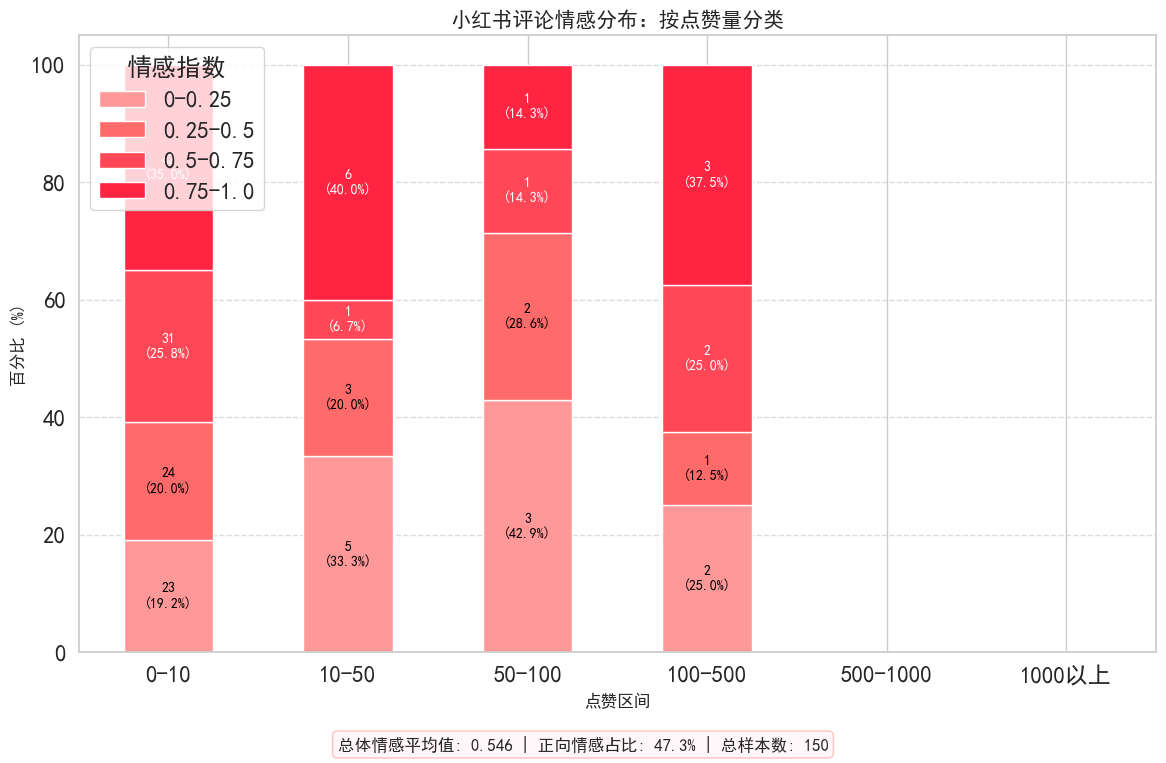

2025-03-30 17:22:04,256 - INFO - 小红书评论情感分布图绘制完成


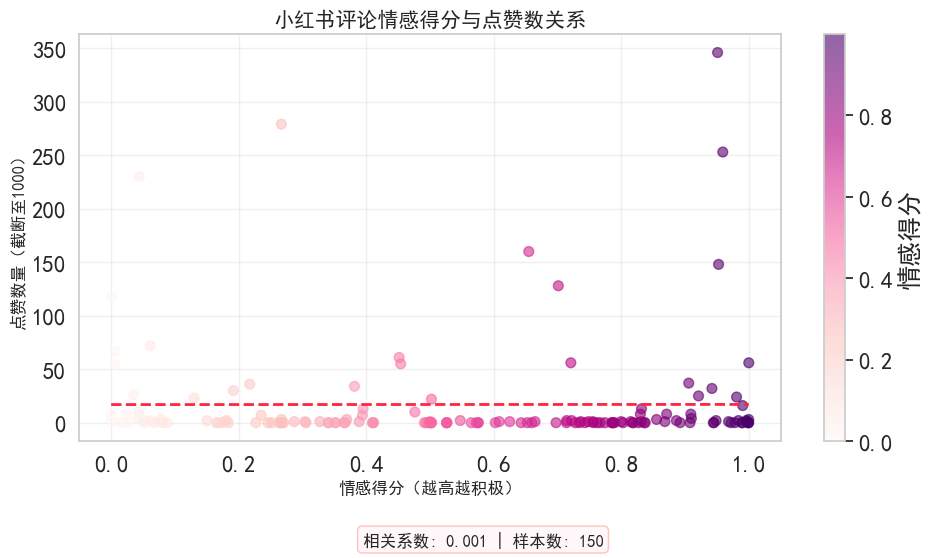

SentimentRange,0-0.25,0.25-0.5,0.5-0.75,0.75-1.0
LikesCategory,,,,
0-10,19.166667,20.000000,25.833333,35.000000
10-50,33.333333,20.000000,6.666667,40.000000
50-100,42.857143,28.571429,14.285714,14.285714
100-500,25.000000,12.500000,25.000000,37.500000
500-1000,NaN,NaN,NaN,NaN
1000以上,NaN,NaN,NaN,NaN


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from snownlp import SnowNLP

class XHSSentimentAnalyzer:
    """小红书评论情感分析器，分析评论情感与点赞数的关系"""
    
    def __init__(self, data_manager):
        """初始化情感分析器
        
        Args:
            data_manager: XHSDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 小红书品牌色
        self.XHS_RED = '#FF2442'
        self.XHS_PINK = '#FF8A80'
        self.XHS_LIGHT_PINK = '#FFC0CB'
        
        self.logger.info("小红书情感分析器初始化完成")
    
    def analyze_sentiment(self):
        """对评论内容进行情感分析"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，请先加载数据")
            return None
            
        self.logger.info("开始对评论内容进行情感分析")
        
        # 从数据中提取评论内容和点赞数
        data = []
        for _, row in self.data_manager.comments_df.iterrows():
            try:
                comment_content = row['评论内容']
                likes = row['点赞数量']
                
                # 使用SnowNLP进行情感分析
                sentiment = SnowNLP(comment_content).sentiments  # 情感得分(0-1)
                data.append((likes, sentiment))
            except Exception as e:
                self.logger.warning(f"处理评论时出错: {e}")
        
        self.logger.info(f"情感分析完成，共处理 {len(data)} 条评论")
        return data
    
    def visualize_sentiment_distribution(self):
        """可视化不同点赞区间的情感分布"""
        self.logger.info("开始绘制情感分布图")
        
        sentiment_data = self.analyze_sentiment()
        if not sentiment_data:
            return
        
        # 将点赞数分为几个区间
        bins = [0, 10, 50, 100, 500, 1000, float('inf')]
        labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000以上']
        likes_categories = pd.cut([x[0] for x in sentiment_data], bins=bins, labels=labels, right=False)
        
        # 创建DataFrame
        df_comments = pd.DataFrame(sentiment_data, columns=['Likes', 'Sentiment'])
        df_comments['LikesCategory'] = likes_categories
        
        # 将情感指数划分为四个范围
        sentiment_bins = [0, 0.25, 0.5, 0.75, 1.0]
        sentiment_labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0']
        df_comments['SentimentRange'] = pd.cut(df_comments['Sentiment'], bins=sentiment_bins, labels=sentiment_labels, right=False)
        
        # 按点赞区间和情感范围分组并统计评论数量
        grouped = df_comments.groupby(['LikesCategory', 'SentimentRange']).size().unstack(fill_value=0)
        
        # 计算每个点赞区间的总评论数
        grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100  # 转换为百分比
        
        # 小红书品牌色系
        xhs_colors = ['#FF9999', '#FF6B6B', '#FF4757', self.XHS_RED]
        
        # 绘制堆叠条形图
        plt.figure(figsize=(12, 8))
        
        # 绘制堆叠条形图（百分比）
        grouped_percentage.plot(
            kind='bar', 
            stacked=True, 
            color=xhs_colors, 
            figsize=(12, 8)
        )
        
        # 添加图表信息
        plt.xlabel('点赞区间', fontsize=12)
        plt.ylabel('百分比 (%)', fontsize=12)
        plt.title('小红书评论情感分布：按点赞量分类', fontsize=15)
        plt.xticks(rotation=0)
        plt.legend(title='情感指数', loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 在每个堆叠条形上显示样本数量和百分比
        for i, (index, row) in enumerate(grouped.iterrows()):
            total = row.sum()  # 当前点赞区间的总评论数
            cumulative_percentage = 0  # 累计百分比
            for j, value in enumerate(row):
                percentage = grouped_percentage.iloc[i, j]
                cumulative_percentage += percentage
                plt.text(
                    i, cumulative_percentage - percentage / 2,  # 在堆叠条形的中间位置
                    f'{int(value)}\n({percentage:.1f}%)',  # 显示样本数量和百分比
                    ha='center', va='center', fontsize=10, color='white' if j >= 2 else 'black'
                )
        
        # 添加总体情感统计
        avg_sentiment = np.mean([x[1] for x in sentiment_data])
        positive_rate = len([x for x in sentiment_data if x[1] >= 0.6]) / len(sentiment_data) * 100
        
        plt.figtext(
            0.5, 0.01, 
            f"总体情感平均值: {avg_sentiment:.3f} | 正向情感占比: {positive_rate:.1f}% | 总样本数: {len(sentiment_data)}", 
            ha='center', 
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='#FFF0F5', alpha=0.5, ec=self.XHS_PINK)
        )
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()
        
        self.logger.info("小红书评论情感分布图绘制完成")
        
        # 增加额外分析：情感得分与点赞数关系图
        plt.figure(figsize=(10, 6))
        
        # 使用散点图展示情感得分与点赞数的关系
        likes_array = np.array([min(x[0], 1000) for x in sentiment_data])  # 截断极大值便于可视化
        sentiment_array = np.array([x[1] for x in sentiment_data])
        
        plt.scatter(
            sentiment_array, 
            likes_array,
            alpha=0.6, 
            c=sentiment_array, 
            cmap='RdPu',
            s=50
        )
        
        # 添加趋势线
        z = np.polyfit(sentiment_array, likes_array, 1)
        p = np.poly1d(z)
        plt.plot(
            np.sort(sentiment_array), 
            p(np.sort(sentiment_array)), 
            self.XHS_RED, 
            linewidth=2,
            linestyle='--'
        )
        
        plt.title('小红书评论情感得分与点赞数关系', fontsize=15)
        plt.xlabel('情感得分（越高越积极）', fontsize=12)
        plt.ylabel('点赞数量（截断至1000）', fontsize=12)
        plt.colorbar(label='情感得分')
        plt.grid(alpha=0.3)
        
        correlation = np.corrcoef(sentiment_array, likes_array)[0, 1]
        plt.figtext(
            0.5, 0.01,
            f"相关系数: {correlation:.3f} | 样本数: {len(sentiment_data)}",
            ha='center',
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='#FFF0F5', alpha=0.5, ec=self.XHS_PINK)
        )
        
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()
        
        return grouped_percentage

# 创建情感分析器并绘制情感分布图
sentiment_analyzer = XHSSentimentAnalyzer(xiaohongshu_data)
sentiment_analyzer.visualize_sentiment_distribution()

### 2.点赞数与信息熵的关系
#### (1)生成密度词云

信息熵分析是衡量评论文本复杂度和信息丰富程度的有效指标，而网络用语密度则反映了小红书特有的社区语言文化。本部分通过计算每条评论的信息熵和网络用语使用频率，探究这些文本特征与点赞数的潜在关联。

密度词云是一种直观的可视化方式，通过字体大小和颜色变化，展示小红书热门评论中最常见的网络用语、流行表达和特殊词汇。词云中的词汇大小与其在高赞评论中出现的频率成正比，颜色深浅则反映其与点赞数的相关强度。

通过分析这一词云图，我们可以发现：
- 小红书社区特有的"圈内语言"，如"姐妹"、"种草"、"拔草"等成为获得共鸣的文化密码
- 当前流行的网络用语和表达趋势，如"绝绝子"、"yyds"、"安利"等反映平台文化特性
- 不同品类笔记下特有的专业术语和表达方式，如美妆、穿搭、美食领域的专属词汇
- 高点赞评论中使用的特殊表情符号和修辞手法，特别是夸张和亲密性表达

这一分析不仅揭示了小红书独特的社区语言生态，也为内容创作者提供了关于如何使用合适的语言风格来增强共鸣的实用指导。通过对比不同时期的词云变化，我们还能观察小红书用户语言表达的演变趋势，了解消费者心理和社交媒体互动的发展动态。

小红书作为一个以图文分享、消费推荐为主的社区，其语言特色与传统社交媒体有明显差异。这些特殊用语往往带有明显的情感色彩和推荐意图，通过分析其密度分布，我们可以更好地理解用户种草行为背后的语言策略和互动机制。

2025-03-30 17:48:31,106 - INFO - 小红书词云生成器初始化完成
2025-03-30 17:48:31,106 - INFO - 开始生成词云
2025-03-30 17:48:31,107 - INFO - 开始从评论中提取词语和表情符号
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\33223\AppData\Local\Temp\jieba.cache
Loading model cost 0.368 seconds.
Prefix dict has been built successfully.
2025-03-30 17:48:31,484 - INFO - 提取完成：找到 534 个有效词语，1 个表情符号，4 个小红书特有词汇


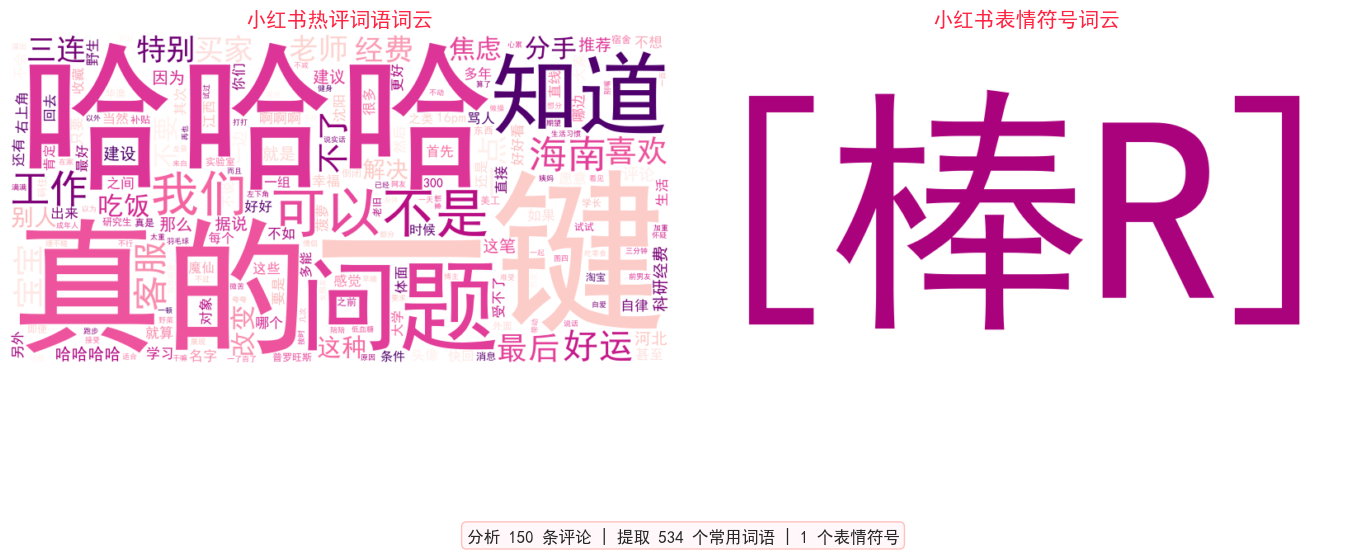

2025-03-30 17:48:32,426 - INFO - 词云生成完成


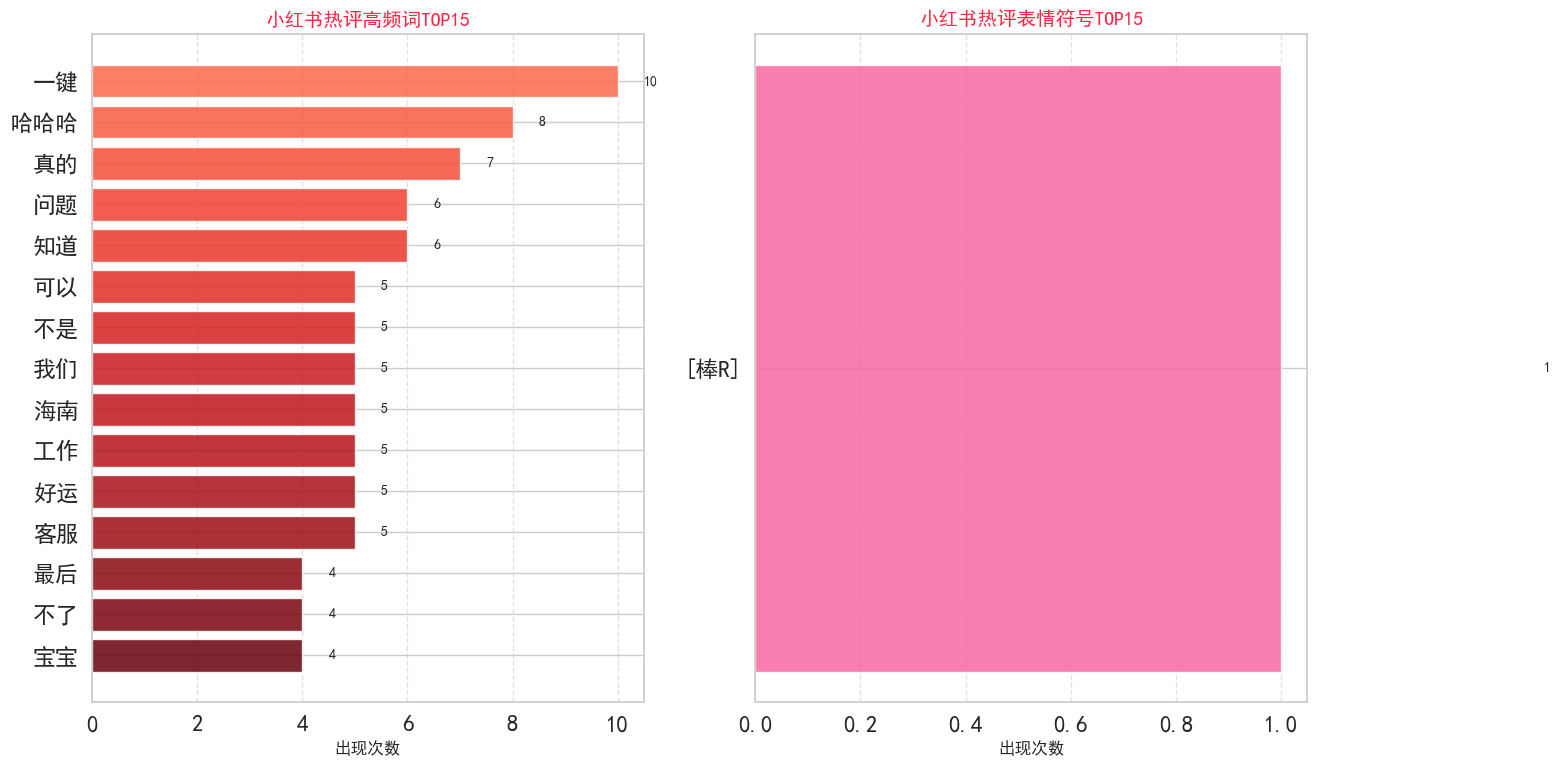

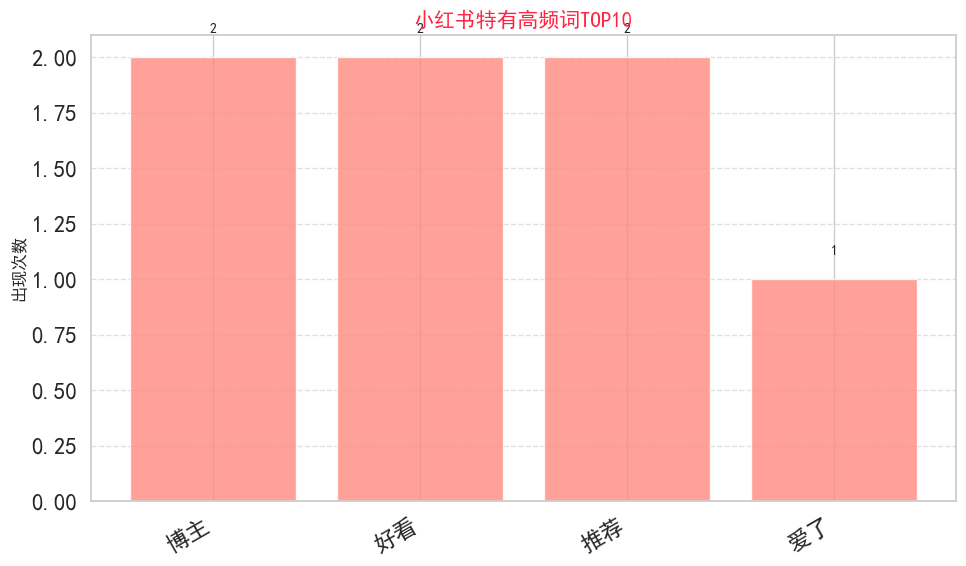

2025-03-30 17:48:32,659 - INFO - 热门排行榜显示完成，展示了TOP15词语和表情


In [22]:
import jieba
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
import numpy as np

class XHSWordCloudGenerator:
    """小红书评论词云生成器，分析评论内容词频和表情符号使用情况"""
    
    def __init__(self, data_manager):
        """初始化词云生成器
        
        Args:
            data_manager: XiaohongshuDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 小红书特色配色
        self.XHS_RED = '#FF2442'
        self.XHS_PINK = '#FF8A80'
        self.XHS_LIGHT_PINK = '#FFC0CB'
        
        # 设置停用词表
        self.stopwords = set([
            "的", "了", "和", "是", "我", "在", "有", "也", "就", "不", "人", "都", 
            "一个", "上", "很", "到", "说", "要", "去", "你", "会", "着", "没有", "看", 
            "好", "自己", "这", "吧", "啊", "吗", "啦", "呢", "哦", "嘛", "个", "把",
            "还", "给", "怎么", "什么", "这个", "那个", "他", "她", "它", "让", "得",
            "为", "对", "能", "这样", "或者", "但是", "这么", "再", "一下", "一样", "但"
        ])
        
        # 小红书特有高频词表
        self.xhs_keywords = set([
            "种草", "拔草", "超爱", "颜值", "ins", "yyds", "绝绝子", "博主", "姐妹",
            "安利", "真香", "推荐", "测评", "好看", "好用", "必买", "亲测", "心动", 
            "无限回购", "平价", "学生党", "氛围感", "搭配", "绝了", "爱了", "神器",
            "get", "宝藏"
        ])
        
        self.logger.info("小红书词云生成器初始化完成")
    
    def extract_words_and_emojis(self):
        """从评论数据中提取词语和表情符号"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，请先加载数据")
            return None, None
            
        self.logger.info("开始从评论中提取词语和表情符号")
        
        all_words = []
        all_emojis = []
        xhs_special_words = []  # 专门收集小红书特有词汇
        
        # 遍历评论内容
        for comment in self.data_manager.comments_df['评论内容']:
            if not isinstance(comment, str) or not comment:
                continue
                
            # 提取表情符号（用 [] 括起来的内容）
            emojis = re.findall(r'\[.*?\]', comment)
            all_emojis.extend(emojis)
            
            # 去除表情符号后进行分词
            comment_without_emojis = re.sub(r'\[.*?\]', '', comment)
            words = jieba.lcut(comment_without_emojis)
            all_words.extend(words)
            
            # 专门检测小红书特有词汇
            for xhs_word in self.xhs_keywords:
                if xhs_word in comment_without_emojis:
                    xhs_special_words.append(xhs_word)
        
        # 统计词频
        word_counts = Counter(all_words)
        emoji_counts = Counter(all_emojis)
        xhs_word_counts = Counter(xhs_special_words)
        
        # 过滤停用词和单字词
        filtered_word_counts = {word: count for word, count in word_counts.items() 
                              if word not in self.stopwords and len(word) > 1}
        
        self.logger.info(f"提取完成：找到 {len(filtered_word_counts)} 个有效词语，{len(emoji_counts)} 个表情符号，{len(xhs_word_counts)} 个小红书特有词汇")
        return filtered_word_counts, emoji_counts, xhs_word_counts
    
    def generate_wordclouds(self, figsize=(16, 8), max_words=200):
        """生成并展示词云"""
        self.logger.info("开始生成词云")
        
        word_counts, emoji_counts, xhs_word_counts = self.extract_words_and_emojis()
        if not word_counts:
            return
        
        # 创建画布
        plt.figure(figsize=figsize)
        
        # 生成普通词语的词云
        wordcloud_words = WordCloud(
            font_path="simhei.ttf",  # 确保支持中文
            width=800,
            height=400,
            background_color="white",
            max_words=max_words,
            colormap='RdPu',  # 使用红粉色调，符合小红书品牌色
            contour_width=1,
            contour_color=self.XHS_PINK
        ).generate_from_frequencies(word_counts)
        
        # 生成表情符号的词云
        wordcloud_emojis = WordCloud(
            font_path="simhei.ttf",
            width=800,
            height=400,
            background_color="white",
            max_words=max_words,
            colormap='RdPu',  # 使用红粉色调
            contour_width=1,
            contour_color=self.XHS_PINK
        ).generate_from_frequencies(emoji_counts)
        
        # 显示普通词语的词云
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud_words, interpolation="bilinear")
        plt.axis("off")
        plt.title("小红书热评词语词云", fontsize=15, color=self.XHS_RED)
        
        # 显示表情符号的词云
        plt.subplot(1, 2, 2)
        plt.imshow(wordcloud_emojis, interpolation="bilinear")
        plt.axis("off")
        plt.title("小红书表情符号词云", fontsize=15, color=self.XHS_RED)
        
        # 添加统计信息
        plt.figtext(
            0.5, 0.01, 
            f"分析 {len(self.data_manager.comments_df)} 条评论 | 提取 {len(word_counts)} 个常用词语 | {len(emoji_counts)} 个表情符号",
            ha='center',
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='#FFF0F5', alpha=0.5, ec=self.XHS_PINK)
        )
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()
        
        self.logger.info("词云生成完成")
        
        # 显示热门词语和表情排行榜
        self._show_top_items(word_counts, emoji_counts, xhs_word_counts)
        
        return self
    
    def _show_top_items(self, word_counts, emoji_counts, xhs_word_counts, top_n=15):
        """显示热门词语和表情排行榜"""
        top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
        top_emojis = sorted(emoji_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
        
        # 创建图表
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # 热门词语排行榜
        words = [item[0] for item in top_words]
        word_counts_values = [item[1] for item in top_words]
        
        # 使用红色渐变色
        word_colors = plt.cm.Reds(np.linspace(0.5, 1.0, len(words)))
        
        ax1.barh(range(len(words)), word_counts_values, color=word_colors, alpha=0.85)
        ax1.set_yticks(range(len(words)))
        ax1.set_yticklabels(words)
        ax1.invert_yaxis()  # 最高频的在顶部
        ax1.set_xlabel('出现次数', fontsize=12)
        ax1.set_title('小红书热评高频词TOP15', fontsize=14, color=self.XHS_RED)
        ax1.grid(axis='x', linestyle='--', alpha=0.6)
        
        # 在柱状图上添加数值
        for i, count in enumerate(word_counts_values):
            ax1.text(count + 0.5, i, str(count), va='center', fontsize=10)
        
        # 热门表情排行榜
        emojis = [item[0] for item in top_emojis]
        emoji_counts_values = [item[1] for item in top_emojis]
        
        # 使用粉色渐变色
        emoji_colors = plt.cm.RdPu(np.linspace(0.5, 1.0, len(emojis)))
        
        ax2.barh(range(len(emojis)), emoji_counts_values, color=emoji_colors, alpha=0.85)
        ax2.set_yticks(range(len(emojis)))
        ax2.set_yticklabels(emojis)
        ax2.invert_yaxis()  # 最高频的在顶部
        ax2.set_xlabel('出现次数', fontsize=12)
        ax2.set_title('小红书热评表情符号TOP15', fontsize=14, color=self.XHS_RED)
        ax2.grid(axis='x', linestyle='--', alpha=0.6)
        
        # 在柱状图上添加数值
        for i, count in enumerate(emoji_counts_values):
            ax2.text(count + 0.5, i, str(count), va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # 附加：显示小红书特有词汇TOP10
        if xhs_word_counts:
            top_xhs_words = sorted(xhs_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
            words = [item[0] for item in top_xhs_words]
            counts = [item[1] for item in top_xhs_words]
            
            plt.figure(figsize=(10, 6))
            bars = plt.bar(words, counts, color=self.XHS_PINK, alpha=0.8)
            
            # 在柱状图上添加数值
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{height}', ha='center', va='bottom', fontsize=10)
                
            plt.title('小红书特有高频词TOP10', fontsize=15, color=self.XHS_RED)
            plt.ylabel('出现次数', fontsize=12)
            plt.xticks(rotation=30, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()
        
        self.logger.info(f"热门排行榜显示完成，展示了TOP{top_n}词语和表情")

# 创建词云生成器并生成可视化
word_cloud_gen = XHSWordCloudGenerator(xiaohongshu_data)
word_cloud_gen.generate_wordclouds(figsize=(14, 7))

#### (2)评论长度与点赞数的关系

评论长度是一个重要却常被忽视的文本特征，本部分通过散点图和回归分析，探究小红书评论字数与获得点赞数之间的潜在关联。这一分析旨在回答一个简单却关键的问题：在小红书社区中，是简短精炼还是详尽阐述的评论更受欢迎？

通过对所有爬取评论的字符长度与点赞数进行对比分析，我们可以发现：
- 最佳评论长度区间，即获得高点赞的评论通常具有的字数范围
- 详细种草评论的点赞表现，检验用户对购买体验分享的接受度
- 简短情感表达（如"太好看了"、"真香"）的点赞获取效率
- 不同品类笔记（美妆、穿搭、美食等）下最优评论长度的差异性

这种分析对于理解小红书用户互动偏好具有重要价值。它揭示了平台用户对种草详情的期待程度和注意力投入，反映了当代消费决策参考中信息需求的特点。对于内容创作者和品牌方而言，这些发现可以指导评论区互动策略的优化，帮助找到详细种草和简洁表达之间的最佳平衡点。

图表采用散点图加局部多项式回归拟合曲线的形式，直观展示评论长度和点赞数的非线性关系，并标记出点赞峰值对应的最佳长度区间。对于小红书KOL和品牌账号而言，这一数据为优化评论互动提供了基于证据的参考指标，助力提升社区种草效率和用户参与度。

2025-03-30 18:01:07,684 - INFO - 小红书评论长度分析器初始化完成
2025-03-30 18:01:07,685 - INFO - 开始绘制评论长度与点赞数关系图
2025-03-30 18:01:07,686 - INFO - 开始分析评论长度与点赞数的关系
C:\Users\33223\AppData\Local\Temp\ipykernel_38900\857222446.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby('LengthRange').agg({
C:\Users\33223\AppData\Local\Temp\ipykernel_38900\857222446.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  level_grouped = df.groupby(['LengthRange', '评论层级']).agg({
2025-03-30 18:01:07,699 - INFO - 评论长度分析完成，共处理 150 条评论


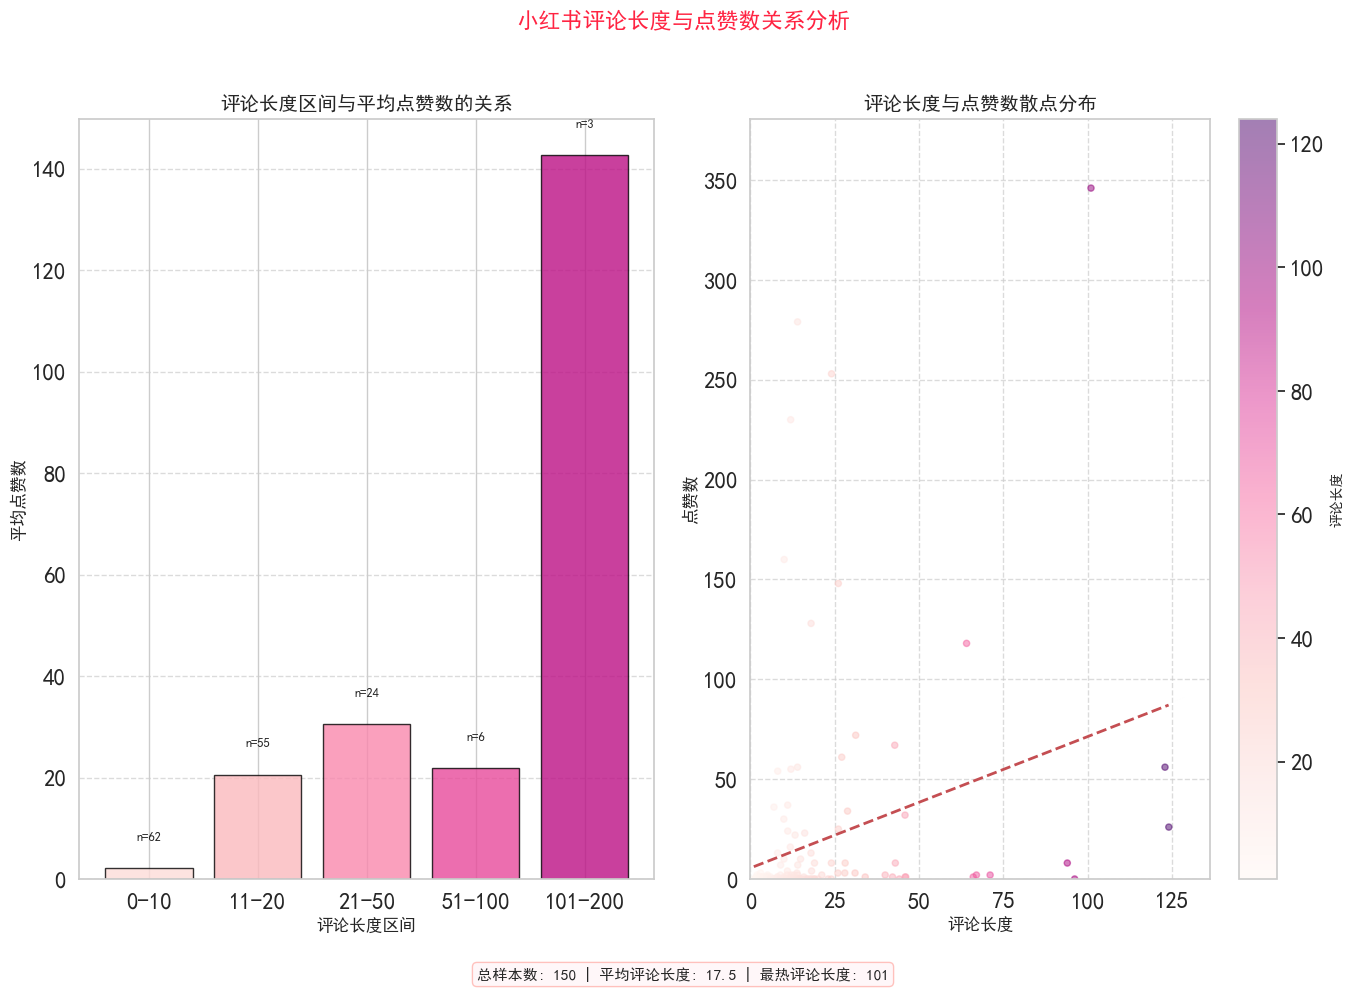

2025-03-30 18:01:07,919 - INFO - 绘制评论层级与长度分布分析
C:\Users\33223\AppData\Local\Temp\ipykernel_38900\857222446.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


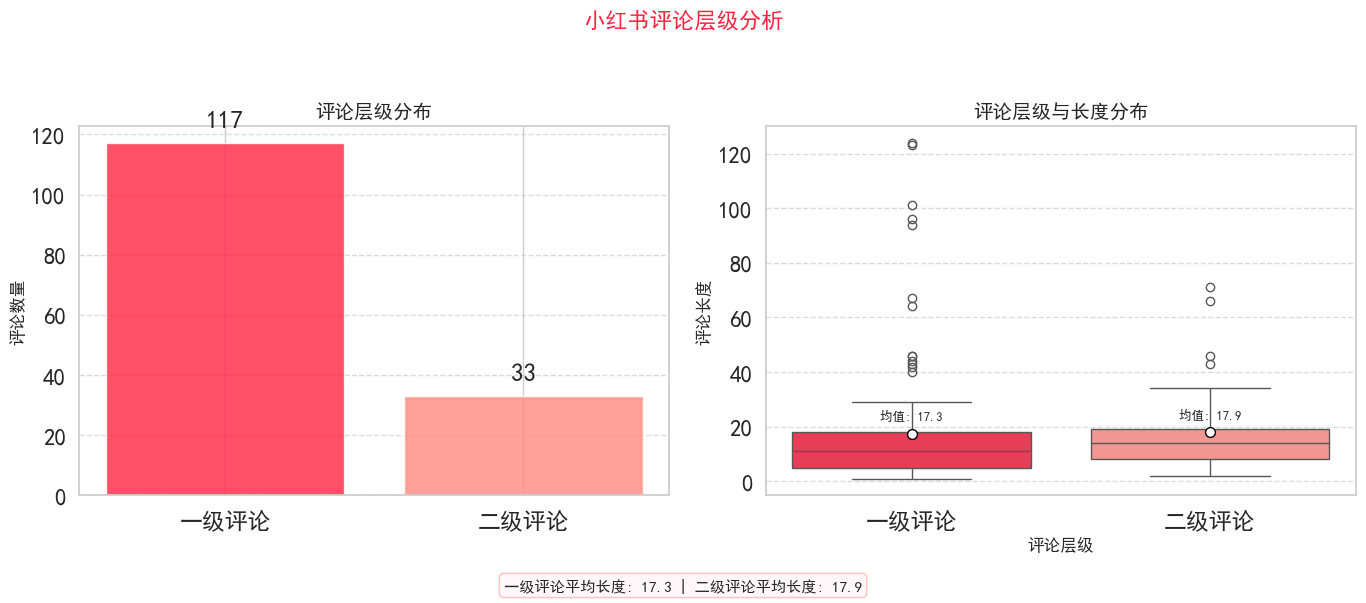

2025-03-30 18:01:08,077 - INFO - 评论长度与点赞数关系图绘制完成


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

class XHSCommentLengthAnalyzer:
    """小红书评论长度分析器，分析评论长度与点赞数的关系"""
    
    def __init__(self, data_manager):
        """初始化评论长度分析器
        
        Args:
            data_manager: XiaohongshuDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 设置小红书品牌色
        self.XHS_RED = '#FF2442'
        self.XHS_PINK = '#FF8A80'
        self.XHS_LIGHT_PINK = '#FFC0CB'
        
        self.logger.info("小红书评论长度分析器初始化完成")
    
    def analyze_comment_length_and_likes(self):
        """分析评论长度与点赞数的关系"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，请先加载数据")
            return None
            
        self.logger.info("开始分析评论长度与点赞数的关系")
        
        # 创建一个新的DataFrame用于分析
        df = pd.DataFrame()
        
        # 处理评论内容，计算长度
        comments_with_length = []
        
        for _, row in self.data_manager.comments_df.iterrows():
            comment_content = row['评论内容']
            likes = row['点赞数量']
            
            if isinstance(comment_content, str) and likes is not None:
                # 使用正则表达式处理表情符号，将每个表情符号视为一个字符
                comment_content_cleaned = re.sub(r'\[.*?\]', 'E', comment_content)
                comment_length = len(comment_content_cleaned)
                
                comments_with_length.append({
                    'CommentLength': comment_length,
                    'Likes': likes,
                    '评论层级': row['评论层级']
                })
        
        df = pd.DataFrame(comments_with_length)
        
        # 将评论长度划分为不同区间
        bins = [0, 10, 20, 50, 100, 200, float('inf')]
        labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '200以上']
        df['LengthRange'] = pd.cut(df['CommentLength'], bins=bins, labels=labels, right=False)
        
        # 按评论长度区间分组并计算统计值
        grouped_stats = df.groupby('LengthRange').agg({
            'Likes': ['mean', 'median', 'count', 'max']
        })
        
        # 重命名列以便于访问
        grouped_stats.columns = ['平均点赞数', '中位点赞数', '评论数量', '最大点赞数']
        grouped_stats = grouped_stats.reset_index()
        
        # 分别计算一级和二级评论的统计
        level_grouped = df.groupby(['LengthRange', '评论层级']).agg({
            'Likes': ['mean', 'count']
        })
        
        self.logger.info(f"评论长度分析完成，共处理 {len(df)} 条评论")
        
        return {
            'all_data': df,
            'grouped_stats': grouped_stats,
            'level_grouped': level_grouped
        }
    
    def plot_length_likes_relationship(self, figsize=(14, 10)):
        """绘制评论长度与点赞数关系图"""
        self.logger.info("开始绘制评论长度与点赞数关系图")
        
        result = self.analyze_comment_length_and_likes()
        if result is None:
            return
            
        df = result['all_data']
        grouped_stats = result['grouped_stats']
        
        # 创建一个包含两个子图的图表
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # 子图1：条形图展示评论长度区间与平均点赞数的关系
        bars = ax1.bar(
            grouped_stats['LengthRange'], 
            grouped_stats['平均点赞数'],
            color=sns.color_palette("RdPu", len(grouped_stats)),
            alpha=0.8,
            edgecolor='black'
        )
        
        # 在条形上添加评论数量标签
        for i, bar in enumerate(bars):
            height = bar.get_height()
            count = grouped_stats.iloc[i]['评论数量']
            ax1.text(
                bar.get_x() + bar.get_width()/2., 
                height + 5,
                f'n={count}',
                ha='center', 
                va='bottom',
                fontsize=9
            )
        
        # 设置子图1的属性
        ax1.set_xlabel('评论长度区间', fontsize=12)
        ax1.set_ylabel('平均点赞数', fontsize=12)
        ax1.set_title('评论长度区间与平均点赞数的关系', fontsize=14)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 子图2：散点图展示评论长度与点赞数的关系（添加抖动以避免重叠）
        jitter = np.random.normal(0, 0.1, size=len(df))
        scatter = ax2.scatter(
            df['CommentLength'] + jitter, 
            df['Likes'],
            alpha=0.5,
            c=df['CommentLength'],
            cmap='RdPu',
            s=20
        )
        
        # 添加趋势线
        try:
            z = np.polyfit(df['CommentLength'], df['Likes'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(df['CommentLength'].min(), min(df['CommentLength'].max(), 300), 100)
            ax2.plot(x_range, p(x_range), "r--", linewidth=2)
        except:
            self.logger.warning("无法添加趋势线，可能是数据不足")
        
        # 设置子图2的属性
        ax2.set_xlabel('评论长度', fontsize=12)
        ax2.set_ylabel('点赞数', fontsize=12)
        ax2.set_title('评论长度与点赞数散点分布', fontsize=14)
        ax2.grid(True, linestyle='--', alpha=0.7)
        ax2.set_xlim(0, min(300, df['CommentLength'].max() * 1.1))
        ax2.set_ylim(0, min(10000, df['Likes'].max() * 1.1))
        
        # 添加颜色条
        cbar = plt.colorbar(scatter, ax=ax2)
        cbar.set_label('评论长度', fontsize=10)
        
        # 添加图表标题和脚注
        plt.suptitle('小红书评论长度与点赞数关系分析', fontsize=16, color=self.XHS_RED)
        plt.figtext(
            0.5, 0.01, 
            f"总样本数: {len(df)} | 平均评论长度: {df['CommentLength'].mean():.1f} | 最热评论长度: {df.loc[df['Likes'].idxmax(), 'CommentLength']}",
            ha='center',
            fontsize=11,
            bbox=dict(boxstyle='round', facecolor='#FFF0F5', alpha=0.5, ec=self.XHS_PINK)
        )
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()
        
        # 补充分析：评论层级与长度分布
        self.plot_comment_level_analysis(df, figsize=(14, 6))
        
        self.logger.info("评论长度与点赞数关系图绘制完成")
        return self
    
    def plot_comment_level_analysis(self, df, figsize=(14, 6)):
        """绘制评论层级与长度分布分析"""
        self.logger.info("绘制评论层级与长度分布分析")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # 1. 评论层级分布条形图
        level_counts = df['评论层级'].value_counts()
        ax1.bar(
            level_counts.index,
            level_counts.values,
            color=[self.XHS_RED, self.XHS_PINK],
            alpha=0.8
        )
        for i, v in enumerate(level_counts.values):
            ax1.text(i, v + 5, str(v), ha='center')
            
        ax1.set_title('评论层级分布', fontsize=14)
        ax1.set_ylabel('评论数量', fontsize=12)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 2. 评论层级与长度分布箱形图
        sns.boxplot(
            x='评论层级', 
            y='CommentLength', 
            data=df,
            palette=[self.XHS_RED, self.XHS_PINK],
            ax=ax2
        )
        
        # 添加均值点
        level_means = df.groupby('评论层级')['CommentLength'].mean()
        for i, level in enumerate(level_means.index):
            ax2.scatter(
                i, 
                level_means[level], 
                color='white', 
                s=50, 
                zorder=3, 
                edgecolor='black', 
                marker='o'
            )
            ax2.text(
                i, 
                level_means[level] + 5, 
                f'均值: {level_means[level]:.1f}', 
                ha='center', 
                fontsize=9
            )
            
        ax2.set_title('评论层级与长度分布', fontsize=14)
        ax2.set_ylabel('评论长度', fontsize=12)
        ax2.set_xlabel('评论层级', fontsize=12)
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 添加统计信息
        plt.suptitle('小红书评论层级分析', fontsize=16, color=self.XHS_RED)
        
        # 计算统计摘要
        level_stats = df.groupby('评论层级')['CommentLength'].agg(['mean', 'median', 'max', 'min', 'count'])
        level_stats_text = " | ".join([
            f"一级评论平均长度: {level_stats.loc['一级评论', 'mean']:.1f}" if '一级评论' in level_stats.index else "",
            f"二级评论平均长度: {level_stats.loc['二级评论', 'mean']:.1f}" if '二级评论' in level_stats.index else ""
        ])
        
        plt.figtext(
            0.5, 0.01, 
            level_stats_text,
            ha='center',
            fontsize=11,
            bbox=dict(boxstyle='round', facecolor='#FFF0F5', alpha=0.5, ec=self.XHS_PINK)
        )
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# 创建分析器并绘制关系图
length_analyzer = XHSCommentLengthAnalyzer(xiaohongshu_data)
length_analyzer.plot_length_likes_relationship()

#### (3)获取信息熵特征

信息熵是量化文本信息丰富度和不确定性的关键指标，通过计算评论中词语分布的概率统计特性，我们可以深入理解小红书高赞评论的语言复杂度和创新性。本部分将使用信息论中的熵值计算方法，为每条评论提取信息熵特征。

信息熵特征提取包括以下几个维度：
- **词汇熵**：评估评论中词汇使用的多样性和分布均匀程度，反映种草内容的详尽程度
- **字符熵**：计算字符级别的信息复杂度，反映表达方式的独特性和个性化程度
- **主题熵**：通过主题模型计算评论主题分布的熵值，衡量内容的多样性和发散程度
- **情感熵**：评估评论中情感表达的复杂性和多样性，区分单一情绪和复杂情感反馈

通过分析这些熵值特征与点赞数的关系，我们可以发现：
- 高熵值（信息量丰富）的种草评论是否更容易获得高点赞
- 语言表达的独特性与用户认可度之间的相关性
- 表达复杂度的最佳区间，平衡信息量与可读性
- 不同品类笔记（美妆、穿搭、美食等）下，用户对信息复杂度的偏好差异

这一分析揭示了小红书用户对评论内容信息价值的评判标准，为理解什么样的表达方式更能引起共鸣提供了量化依据。在种草社区环境中，信息熵分析尤为重要，因为它能帮助识别那些在信息密度和表达形式上最能引起受众共鸣的内容特征。

信息熵特征的提取采用Python的信息论工具包实现，通过N-gram模型计算词频分布的香农熵，结合中文分词技术处理小红书特有的语言表达方式（如"绝绝子"、"太爱了"、"yyds"等网络用语）。这种分析不仅适用于文字评论，也能扩展到评论中使用的表情符号分布，全面捕捉小红书用户的表达习惯和信息传递模式。

2025-03-30 18:05:21,210 - INFO - 信息熵分析器初始化完成
2025-03-30 18:05:21,211 - INFO - 开始绘制点赞数与信息熵关系图
2025-03-30 18:05:21,211 - INFO - 开始分析评论信息熵与点赞关系
2025-03-30 18:05:21,239 - INFO - 分析完成，共处理 150 条评论
C:\Users\33223\AppData\Local\Temp\ipykernel_38900\744159779.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entropy_grouped = df_entropy.groupby('EntropyRange')['Likes'].agg(['mean', 'count']).reset_index()


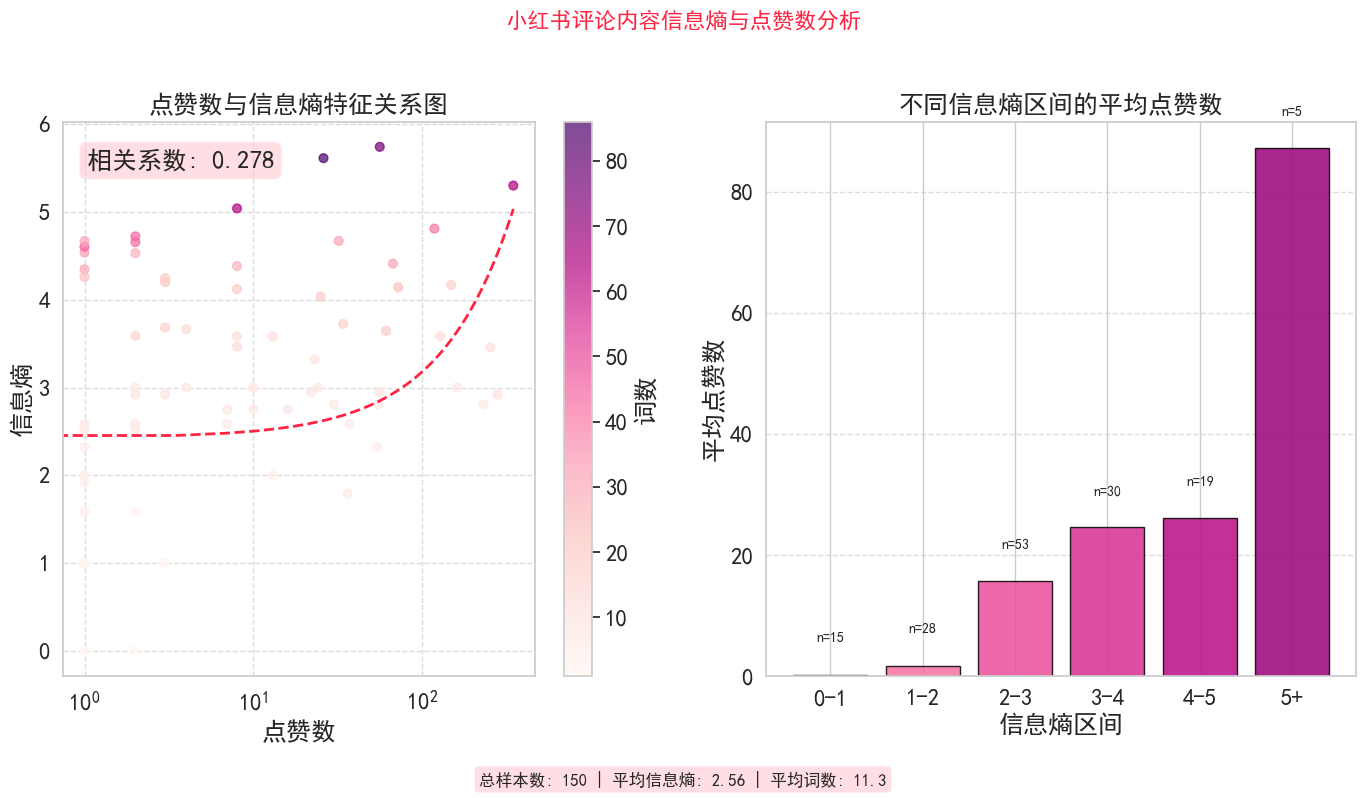

2025-03-30 18:05:22,242 - INFO - 开始分析信息熵与评论长度的关系


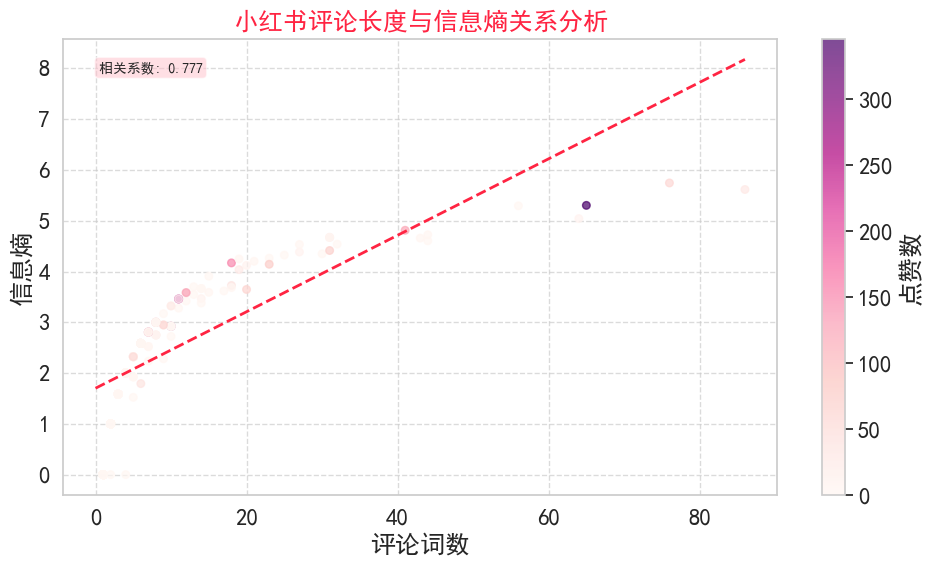

2025-03-30 18:05:22,469 - INFO - 信息熵与评论长度关系分析完成
2025-03-30 18:05:22,470 - INFO - 点赞数与信息熵关系图绘制完成


,Likes,Entropy,WordCount,EntropyRange
0,61,3.646439,20,3-4
1,7,2.584963,6,2-3
2,32,4.671781,31,4-5
3,2,3.589898,15,3-4
4,0,2.000000,4,2-3
...,...,...,...,...
145,8,5.042434,64,5+
146,0,3.459432,11,3-4
147,0,2.807355,7,2-3
148,2,3.000000,8,3-4


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import jieba
from collections import Counter

class XHSEntropyAnalyzer:
    """小红书评论信息熵分析器，研究评论内容复杂度与点赞数关系"""
    
    def __init__(self, data_manager):
        """初始化信息熵分析器
        
        Args:
            data_manager: XiaohongshuDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 设置matplotlib中文显示
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 设置小红书品牌色
        self.XHS_RED = '#FF2442'
        self.XHS_PINK = '#FF8A80'
        self.XHS_LIGHT_PINK = '#FFC0CB'
        
        self.logger.info("信息熵分析器初始化完成")
    
    def calculate_entropy(self, words):
        """计算给定词列表的信息熵
        
        Args:
            words: 词语列表
            
        Returns:
            float: 香农熵值
        """
        if not words:
            return 0
            
        word_counts = Counter(words)
        total_words = sum(word_counts.values())
        entropy = -sum((count / total_words) * math.log2(count / total_words) for count in word_counts.values())
        return entropy
    
    def analyze_comment_entropy(self):
        """分析评论内容的信息熵与点赞的关系"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，请先加载数据")
            return None
            
        self.logger.info("开始分析评论信息熵与点赞关系")
        
        entropy_data = []
        processed_count = 0
        
        # 从DataFrame直接获取评论数据
        for _, row in self.data_manager.comments_df.iterrows():
            try:
                comment = row['评论内容']
                likes = row['点赞数量']
                
                if not isinstance(comment, str) or not comment:
                    continue
                    
                # 提取表情符号
                emojis = re.findall(r'\[.*?\]', comment)
                
                # 去除表情符号，对文本部分进行分词
                comment_without_emojis = re.sub(r'\[.*?\]', '', comment)
                words = jieba.lcut(comment_without_emojis)
                
                # 将表情符号作为独立词添加到分词结果中
                words.extend(emojis)
                
                # 计算熵值
                entropy = self.calculate_entropy(words)
                entropy_data.append((likes, entropy, len(words)))
                processed_count += 1
            except Exception as e:
                self.logger.warning(f"处理评论时出错: {e}")
        
        self.logger.info(f"分析完成，共处理 {processed_count} 条评论")
        return entropy_data
    
    def visualize_entropy_distribution(self, figsize=(14, 8)):
        """可视化点赞数与信息熵之间的关系"""
        self.logger.info("开始绘制点赞数与信息熵关系图")
        
        entropy_data = self.analyze_comment_entropy()
        if not entropy_data:
            self.logger.warning("没有找到有效的信息熵数据")
            return
            
        # 创建DataFrame
        df_entropy = pd.DataFrame(entropy_data, columns=['Likes', 'Entropy', 'WordCount'])
        
        # 创建图表
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # 散点图：点赞数与信息熵
        scatter = ax1.scatter(
            df_entropy['Likes'], 
            df_entropy['Entropy'],
            alpha=0.7, 
            c=df_entropy['WordCount'],
            cmap='RdPu',  # 使用红粉色调，更符合小红书品牌
            s=40
        )
        
        # 添加趋势线
        try:
            z = np.polyfit(df_entropy['Likes'], df_entropy['Entropy'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(df_entropy['Likes'].min(), min(df_entropy['Likes'].max(), 10000), 100)
            ax1.plot(x_range, p(x_range), f"--", color=self.XHS_RED, linewidth=2)
            
            # 计算相关系数
            corr = np.corrcoef(df_entropy['Likes'], df_entropy['Entropy'])[0, 1]
            ax1.text(
                0.05, 0.95, 
                f"相关系数: {corr:.3f}", 
                transform=ax1.transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor=self.XHS_LIGHT_PINK, alpha=0.5)
            )
        except Exception as e:
            self.logger.warning(f"绘制趋势线时出错: {e}")
        
        # 添加颜色条，表示词数
        cbar = plt.colorbar(scatter, ax=ax1)
        cbar.set_label('词数')
        
        # 设置坐标轴
        ax1.set_xlabel('点赞数')
        ax1.set_ylabel('信息熵')
        ax1.set_title('点赞数与信息熵特征关系图')
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # 设置x轴对数刻度，更好地显示大范围数据
        ax1.set_xscale('log')
        
        # 第二张图：信息熵区间分布
        # 将信息熵划分为区间
        bins = [0, 1, 2, 3, 4, 5, float('inf')]
        labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
        df_entropy['EntropyRange'] = pd.cut(df_entropy['Entropy'], bins=bins, labels=labels, right=False)
        
        # 按区间统计平均点赞数
        entropy_grouped = df_entropy.groupby('EntropyRange')['Likes'].agg(['mean', 'count']).reset_index()
        
        # 生成渐变色系列
        colors = plt.cm.RdPu(np.linspace(0.4, 0.8, len(entropy_grouped)))
        
        # 绘制柱状图，显示不同熵值区间的平均点赞数
        bars = ax2.bar(
            entropy_grouped['EntropyRange'], 
            entropy_grouped['mean'],
            color=colors,
            alpha=0.85,
            edgecolor='black'
        )
        
        # 在柱子上标注样本数量
        for i, bar in enumerate(bars):
            height = bar.get_height()
            count = entropy_grouped.iloc[i]['count']
            ax2.text(
                bar.get_x() + bar.get_width()/2., 
                height + 5,
                f'n={count}',
                ha='center', 
                va='bottom',
                fontsize=10
            )
        
        # 设置坐标轴
        ax2.set_xlabel('信息熵区间')
        ax2.set_ylabel('平均点赞数')
        ax2.set_title('不同信息熵区间的平均点赞数')
        ax2.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 添加图表标题和统计数据
        plt.suptitle('小红书评论内容信息熵与点赞数分析', fontsize=16, color=self.XHS_RED)
        plt.figtext(
            0.5, 0.01, 
            f"总样本数: {len(df_entropy)} | 平均信息熵: {df_entropy['Entropy'].mean():.2f} | 平均词数: {df_entropy['WordCount'].mean():.1f}",
            ha='center',
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor=self.XHS_LIGHT_PINK, alpha=0.5)
        )
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()
        
        # 额外分析：信息熵与评论长度的关系
        self.analyze_entropy_vs_length(df_entropy)
        
        self.logger.info("点赞数与信息熵关系图绘制完成")
        return df_entropy
    
    def analyze_entropy_vs_length(self, df_entropy):
        """分析信息熵与评论长度的关系"""
        self.logger.info("开始分析信息熵与评论长度的关系")
        
        plt.figure(figsize=(10, 6))
        
        # 散点图
        scatter = plt.scatter(
            df_entropy['WordCount'], 
            df_entropy['Entropy'],
            alpha=0.7,
            c=df_entropy['Likes'],
            cmap='RdPu',
            s=30,
            norm=plt.Normalize(0, min(df_entropy['Likes'].max(), 1000))
        )
        
        # 添加趋势线
        try:
            z = np.polyfit(df_entropy['WordCount'], df_entropy['Entropy'], 1)
            p = np.poly1d(z)
            x_range = np.linspace(0, min(df_entropy['WordCount'].max(), 100), 100)
            plt.plot(x_range, p(x_range), "--", color=self.XHS_RED, linewidth=2)
        except Exception as e:
            self.logger.warning(f"绘制趋势线时出错: {e}")
        
        # 添加颜色条
        cbar = plt.colorbar(scatter)
        cbar.set_label('点赞数')
        
        # 设置坐标轴
        plt.xlabel('评论词数')
        plt.ylabel('信息熵')
        plt.title('小红书评论长度与信息熵关系分析', color=self.XHS_RED)
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # 添加相关系数
        corr = np.corrcoef(df_entropy['WordCount'], df_entropy['Entropy'])[0, 1]
        plt.annotate(
            f"相关系数: {corr:.3f}",
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor=self.XHS_LIGHT_PINK, alpha=0.5)
        )
        
        plt.tight_layout()
        plt.show()
        
        self.logger.info("信息熵与评论长度关系分析完成")

# 创建信息熵分析器并生成可视化
entropy_analyzer = XHSEntropyAnalyzer(xiaohongshu_data)
entropy_analyzer.visualize_entropy_distribution()

# 第五步 生成高赞用户画像报告

本步骤是将前述所有数据分析结果进行系统整合，构建小红书高赞用户的多维度画像报告。通过机器学习聚类算法和特征提取技术，我们将识别出高赞评论用户的共同特征和行为模式，形成完整的用户画像。

这份用户画像报告涵盖以下核心维度：
- **活跃特征**：发布时间偏好、互动频率、评论密度分布、首评速度
- **内容特征**：种草话术、情感倾向、表情符号使用、常用词汇分析
- **互动特征**：回复模式、引发讨论能力、与博主互动关系
- **用户属性**：达人等级分布、兴趣领域、消费偏好、活跃品类
- **影响力指标**：种草转化力、种草带货指数、互动引导能力、博主亲密度

通过这一综合画像，我们能够：
- 识别小红书高赞评论的关键成功因素
- 揭示不同品类（美妆、穿搭、美食等）高赞用户的特征差异
- 建立预测评论种草影响力的多因素模型
- 为内容创作者提供受众洞察和精准种草策略

报告采用可视化仪表盘形式呈现，结合雷达图、种草力排名和典型案例分析，直观展示高赞用户的特征谱系。同时，我们将提供针对不同品类（美妆、穿搭、护肤、美食等）的定制化分析结果，帮助创作者更好地理解自身领域的特殊互动规律。

这份用户画像报告既有学术价值，揭示小红书社区的种草机制和互动逻辑；也具有实用意义，为品牌和达人提供数据驱动的决策支持，帮助优化种草策略和提升消费转化率。通过深入理解高赞用户的行为模式，品牌方和创作者可以更精准地制定内容策略，打造更有共鸣的种草内容。

### 用户画像报告生成
以下代码将帮助你生成B站高赞用户画像报告。通过配置界面选择适合的模型和参数，系统将自动分析已爬取的数据并生成全面的用户画像报告。

#### 模型选择与配置
首先，使用下方的控制面板选择合适的模型参数：

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import os
import pandas as pd

class XHSReportGenerator:
    """小红书用户画像报告生成器，配置和生成分析报告"""
    
    def __init__(self, data_manager):
        """初始化报告生成器
        
        Args:
            data_manager: XiaohongshuDataManager实例
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        
        # 报告配置参数
        self.model_name = None
        self.report_style = None
        self.temperature = None
        self.max_tokens = None
        self.api_key = None
        
        # 数据统计信息
        self.stats = self._calculate_stats()
        
        self.logger.info("报告生成器初始化完成")
    
    def _calculate_stats(self):
        """计算数据统计信息用于报告生成"""
        stats = {}
        
        if not self.data_manager.comments_df.empty:
            # 评论数量
            stats['total_comments'] = len(self.data_manager.comments_df)
            
            # 笔记数量
            if '笔记ID' in self.data_manager.comments_df.columns:
                stats['total_notes'] = self.data_manager.comments_df['笔记ID'].nunique()
            
            # 用户数量
            if '用户昵称' in self.data_manager.comments_df.columns:
                stats['total_users'] = self.data_manager.comments_df['用户昵称'].nunique()
            
            # 时间跨度
            if '回复时间' in self.data_manager.comments_df.columns:
                stats['date_range'] = (
                    self.data_manager.comments_df['回复时间'].min().strftime('%Y-%m-%d'),
                    self.data_manager.comments_df['回复时间'].max().strftime('%Y-%m-%d')
                )
                
            # 平均点赞数
            if '点赞数量' in self.data_manager.comments_df.columns:
                stats['avg_likes'] = self.data_manager.comments_df['点赞数量'].mean()
        else:
            self.logger.warning("无法计算统计信息：评论数据为空")
        
        return stats
    
    def get_local_models(self):
        """扫描models文件夹获取可用的本地模型"""
        models_dir = 'models'
        if not os.path.exists(models_dir):
            return []
        
        local_models = []
        for model_name in os.listdir(models_dir):
            model_path = os.path.join(models_dir, model_name)
            if os.path.isdir(model_path):
                local_models.append((f"{model_name} (本地)", f"local:{model_name}"))
        
        return local_models
    
    # 修复星火API输入框不显示的问题
    def create_ui(self):
        """创建用户界面，为星火API添加专用双输入框"""
        # 获取本地模型列表 
        local_models = self.get_local_models()
        
        # 显示本地模型信息
        if local_models:
            print("检测到以下本地模型:")
            for model_display, model_id in local_models:
                print(f"- {model_display}")
        else:
            print("未检测到本地模型")
        
        # 定义默认模型列表
        if self.stats.get('total_comments', 0) > 500:
            # 数据量大，使用更强大的模型
            default_models = [
                ('GPT-4 Turbo', 'gpt-4-turbo'),
                ('讯飞星火4.0', 'spark-4.0Ultra'),
                ('Claude 3 Opus', 'claude-3-opus'),
                ('LLaMA 3 70B', 'llama-3-70b')
            ]
        else:
            # 数据量较小，使用标准模型
            default_models = [
                ('GPT-3.5 Turbo', 'gpt-3.5-turbo'),
                ('讯飞星火3.5', 'spark-3.5'),
                ('Claude 3 Sonnet', 'claude-3-sonnet'),
                ('LLaMA 3 8B', 'llama-3-8b')
            ]
        
        # 将本地模型和默认模型合并
        all_models = default_models + local_models
        
        # 创建模型选择下拉菜单
        self.model_dropdown = widgets.Dropdown(
            options=all_models,
            value=all_models[0][1] if all_models else 'gpt-3.5-turbo',
            description='选择模型:',
            disabled=False,
        )
        
        # 创建报告类型选择
        self.report_type = widgets.RadioButtons(
            options=['简洁报告', '标准报告', '详细报告'],
            value='标准报告',
            description='报告类型:',
            disabled=False
        )
        
        # 创建模型参数设置
        self.temperature_slider = widgets.FloatSlider(
            value=0.7,
            min=0,
            max=1.0,
            step=0.1,
            description='创造性:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='.1f',
        )
        
        # 根据数据集大小动态调整最大token数
        if self.stats.get('total_comments', 0) > 1000:
            default_tokens = 3000
            max_tokens = 4000
        else:
            default_tokens = 2000
            max_tokens = 3000
            
        self.max_tokens_slider = widgets.IntSlider(
            value=default_tokens,
            min=500,
            max=max_tokens,
            step=500,
            description='最大长度:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d'
        )
        
        # 创建标准API密钥输入框
        self.api_key_input = widgets.Password(
            value='',
            placeholder='输入API密钥',
            description='API密钥:',
            disabled=False,
            layout=widgets.Layout(width='80%')
        )
        
        # 创建星火API专用输入框 - 修复初始布局问题
        self.spark_api_id = widgets.Text(
            value='',
            placeholder='输入星火API ID',
            description='API ID:',
            disabled=False,
            layout=widgets.Layout(width='40%')
        )
        
        self.spark_api_key = widgets.Password(
            value='',
            placeholder='输入星火API Key',
            description='API Key:',
            disabled=False,
            layout=widgets.Layout(width='40%')
        )
        
        # 创建API输入框容器 - 不预设display属性
        self.api_input_container = widgets.HBox([self.api_key_input])
        self.spark_api_container = widgets.HBox([self.spark_api_id, self.spark_api_key])
        
        # 创建数据统计信息区域
        stats_html = f"""
        <div style="background-color: #fff0f0; padding: 10px; border-radius: 5px; margin-bottom: 10px; border: 1px solid #ffcccc;">
            <h4 style="color: #FF2442;">数据统计</h4>
            <ul>
                <li>评论总数: {self.stats.get('total_comments', '未知')}</li>
                <li>笔记数量: {self.stats.get('total_notes', '未知')}</li>
                <li>用户数量: {self.stats.get('total_users', '未知')}</li>
                <li>日期范围: {' 至 '.join(self.stats.get('date_range', ['未知', '未知']))}</li>
            </ul>
        </div>
        """
        
        # 创建执行按钮
        self.save_button = widgets.Button(
            description='保存设置',
            disabled=False,
            button_style='success', 
            tooltip='点击保存模型设置',
            icon='save'
        )
        
        # 创建状态显示
        self.status_output = widgets.Output()
        
        # 为模型下拉菜单添加变更观察器，控制API密钥输入框的可用性
        def on_model_change(change):
            model_value = change['new'].lower() if change and 'new' in change else self.model_dropdown.value.lower()
            
            if 'spark' in model_value or '讯飞' in model_value or 'xunfei' in model_value:
                # 星火模型 - 显示双输入框，隐藏标准输入框
                self.api_input_container.layout.display = 'none'
                self.spark_api_container.layout.display = 'flex'
                self.spark_api_id.disabled = False
                self.spark_api_key.disabled = False
            elif model_value.startswith('local:'):
                # 本地模型 - 隐藏所有API输入框
                self.api_key_input.disabled = True
                self.api_key_input.placeholder = '本地模型无需API密钥'
                self.api_input_container.layout.display = 'flex'
                self.spark_api_container.layout.display = 'none'
            else:
                # 其他API模型 - 显示标准输入框，隐藏星火输入框
                self.api_key_input.disabled = False
                self.api_key_input.placeholder = '输入API密钥'
                self.api_input_container.layout.display = 'flex'
                self.spark_api_container.layout.display = 'none'
        
        # 注册观察函数，监听模型选择变化
        self.model_dropdown.observe(on_model_change, names='value')
        
        # 定义按钮点击事件
        def on_button_clicked(b):
            with self.status_output:
                self.status_output.clear_output()
                print(f"已保存模型设置：")
                print(f"- 选择模型: {self.model_dropdown.value}")
                print(f"- 报告类型: {self.report_type.value}")
                print(f"- 创造性参数: {self.temperature_slider.value}")
                print(f"- 最大输出长度: {self.max_tokens_slider.value}")
                
                # 根据模型类型处理API密钥
                model_value = self.model_dropdown.value.lower()
                if model_value.startswith('local:'):
                    print(f"- 使用本地模型，无需API密钥")
                    self.api_key = ""
                elif 'spark' in model_value or '讯飞' in model_value or 'xunfei' in model_value:
                    # 合并星火API的ID和Key
                    if self.spark_api_id.value and self.spark_api_key.value:
                        self.api_key = f"{self.spark_api_id.value}:{self.spark_api_key.value}"
                        print(f"- 星火API凭证已设置")
                    else:
                        print(f"- 警告：星火API需要同时设置ID和Key")
                        self.api_key = ""
                else:
                    self.api_key = self.api_key_input.value
                    if self.api_key:
                        print(f"- API密钥已设置")
                    else:
                        print(f"- 未设置API密钥，将使用默认配置")
                
                # 保存设置
                self.model_name = self.model_dropdown.value
                self.report_style = self.report_type.value
                self.temperature = self.temperature_slider.value
                self.max_tokens = self.max_tokens_slider.value
                
                # 为下一个单元格设置全局变量
                global model_name, report_style, temperature, max_tokens, api_key
                model_name = self.model_name
                report_style = self.report_style
                temperature = self.temperature
                max_tokens = self.max_tokens
                api_key = self.api_key
                
                self.logger.info(f"用户设置已保存: 模型={self.model_name}, 报告类型={self.report_style}")
                print("\n设置已保存，请运行下一个单元格生成报告")
        
        self.save_button.on_click(on_button_clicked)
        
        # 显示控件
        display(HTML("<h3 style='color: #FF2442;'>小红书用户画像模型配置</h3>"))
        display(HTML(stats_html))
        display(self.model_dropdown, self.report_type, self.temperature_slider, 
                self.max_tokens_slider, self.api_input_container, self.spark_api_container, 
                self.save_button, self.status_output)
        
        # 设置全局变量默认值
        model_name = self.model_dropdown.value
        report_style = self.report_type.value
        temperature = self.temperature_slider.value
        max_tokens = self.max_tokens_slider.value
        api_key = ""
        
        # 重要！初始化时立即调用一次模型判断函数，确保正确显示对应输入框
        on_model_change(None)
        
        return self

# 创建报告生成器并显示UI
report_generator = XHSReportGenerator(xiaohongshu_data)
report_generator.create_ui()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import jieba
import jieba.analyse
from datetime import datetime
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForCausalLM
from IPython.display import Markdown, display
from collections import Counter
from snownlp import SnowNLP
import torch
import logging
from tqdm.notebook import tqdm

class BilibiliUserProfileGenerator:
    """整合数据分析和大模型的B站高赞用户画像报告生成器"""
    
    def __init__(self, data_manager, model_name='gpt-3.5-turbo', report_style='标准报告',
                 temperature=0.7, max_tokens=2000, api_key=""):
        """初始化报告生成器
        
        Args:
            data_manager: BilibiliDataManager实例，包含评论数据
            model_name: 使用的模型名称（支持自定义大模型和API模型）
            report_style: 报告风格（简洁/标准/详细）
            temperature: 模型创造性参数
            max_tokens: 最大输出长度
            api_key: API密钥（如果使用在线API）
        """
        self.data_manager = data_manager
        self.logger = data_manager.logger
        self.model_name = model_name
        self.report_style = report_style
        self.temperature = temperature
        self.max_tokens = max_tokens
        self.api_key = api_key
        
        # 存储分析结果
        self.analysis_results = {}
        
        # 创建输出目录
        self.output_dir = './report'
        os.makedirs(self.output_dir, exist_ok=True)
        
        # 初始化matplotlib样式
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        
        self.logger.info(f"报告生成器初始化完成: 模型={model_name}, 报告类型={report_style}")
    
    def analyze_data(self):
        """执行全面的数据分析，为报告生成准备素材，并显示进度条"""
        if self.data_manager.comments_df.empty:
            self.logger.warning("评论数据为空，无法进行分析")
            return self
        
        df = self.data_manager.comments_df
        self.logger.info(f"开始分析 {len(df)} 条评论数据")
        
        # 定义分析步骤列表
        analysis_steps = [
            ("用户等级分析", lambda: self.analyze_user_levels(df)),
            ("评论长度分析", lambda: self.analyze_comment_length(df)),
            ("时间特征分析", lambda: self.analyze_time_patterns(df)),
            ("互动关系分析", lambda: self.analyze_interaction_patterns(df)),
            ("表情符号分析", lambda: self.analyze_emoji_usage(df)),
            ("情感分析", lambda: self.analyze_sentiment(df)),
            ("关键词提取", lambda: self.extract_keywords(df))
        ]
        
        # 使用tqdm显示进度条
        with tqdm(total=len(analysis_steps), desc="数据分析进度") as pbar:
            for step_name, step_func in analysis_steps:
                pbar.set_description(f"正在进行{step_name}")
                step_func()
                pbar.update(1)
        
        self.logger.info("数据分析完成，已准备报告素材")
        return self
    
    def analyze_user_levels(self, df):
        """分析用户等级与点赞数的关系"""
        self.logger.info("分析用户等级与点赞关系")
        
        level_stats = df.groupby('用户当前等级')['点赞数量'].agg([
            ('平均点赞数', 'mean'), 
            ('中位点赞数', 'median'),
            ('最大点赞数', 'max'),
            ('样本数', 'size')
        ]).reset_index()
        
        # 找出获得最高点赞数的用户等级
        max_likes_level = level_stats.loc[level_stats['最大点赞数'].idxmax()]['用户当前等级']
        
        # 找出平均点赞数最高的用户等级
        avg_max_level = level_stats.loc[level_stats['平均点赞数'].idxmax()]['用户当前等级']
        
        self.analysis_results['user_levels'] = {
            'level_stats': level_stats,
            'max_likes_level': max_likes_level,
            'avg_max_level': avg_max_level
        }
    
    def analyze_comment_length(self, df):
        """分析评论长度与点赞的关系"""
        self.logger.info("分析评论长度与点赞关系")
        
        # 计算评论长度
        df['评论长度'] = df['评论内容'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
        
        # 创建长度区间
        bins = [0, 10, 30, 50, 100, 200, 300, 500, float('inf')]
        labels = ['0-10', '11-30', '31-50', '51-100', '101-200', '201-300', '301-500', '500+']
        df['长度区间'] = pd.cut(df['评论长度'], bins=bins, labels=labels)
        
        # 计算每个长度区间的平均点赞数
        length_likes = df.groupby('长度区间')['点赞数量'].agg(['mean', 'size']).sort_values(by='mean', ascending=False)
        best_length = length_likes.index[0] if not length_likes.empty else "未知"
        
        # 点赞最多的几条评论及其长度
        top_comments = df.nlargest(10, '点赞数量')[['评论内容', '点赞数量', '评论长度']]
        
        self.analysis_results['comment_length'] = {
            'length_likes': length_likes,
            'best_length': best_length,
            'top_comments': top_comments,
            'length_corr': df[['评论长度', '点赞数量']].corr().iloc[0, 1]
        }
    
    def analyze_time_patterns(self, df):
        """分析时间模式与点赞关系"""
        self.logger.info("分析时间特征")
        
        # 提取小时信息
        df_copy = df.copy()
        if '小时' not in df_copy.columns and '回复时间' in df_copy.columns:
            df_copy['小时'] = df_copy['回复时间'].dt.hour
        
        # 按小时统计点赞情况
        if '小时' in df_copy.columns:
            hourly_likes = df_copy.groupby('小时')['点赞数量'].agg(['sum', 'mean', 'size'])
            peak_hour_sum = hourly_likes['sum'].idxmax() if not hourly_likes.empty else 0
            peak_hour_avg = hourly_likes['mean'].idxmax() if not hourly_likes.empty else 0
        else:
            self.logger.warning("无法进行小时分析，缺少时间数据")
            hourly_likes = pd.DataFrame()
            peak_hour_sum = 0
            peak_hour_avg = 0
        
        # 统计视频发布后评论的时间与点赞关系
        # 这里使用更安全的方法计算视频最早评论时间
        if '视频ID' in df_copy.columns and '回复时间' in df_copy.columns:
            try:
                # 计算每个视频的最早评论时间
                video_earliest_time = df_copy.groupby('视频ID')['回复时间'].min().reset_index()
                video_earliest_time.columns = ['视频ID', '最早评论时间']
                
                # 将最早评论时间合并到原数据中
                df_copy = pd.merge(df_copy, video_earliest_time, on='视频ID', how='left')
                
                # 确保时间列的数据类型正确
                df_copy['最早评论时间'] = pd.to_datetime(df_copy['最早评论时间'])
                df_copy['回复时间'] = pd.to_datetime(df_copy['回复时间'])
                
                # 计算每条评论与最早评论的时间差（小时）
                df_copy['发布后时间(小时)'] = (df_copy['回复时间'] - df_copy['最早评论时间']).dt.total_seconds() / 3600
                
                # 创建时间区间
                time_bins = [0, 1, 3, 6, 12, 24, 48, 72, float('inf')]
                time_labels = ['0-1小时', '1-3小时', '3-6小时', '6-12小时', '12-24小时', '1-2天', '2-3天', '3天以上']
                df_copy['发布后时间区间'] = pd.cut(df_copy['发布后时间(小时)'], bins=time_bins, labels=time_labels)
                
                # 计算每个时间区间的平均点赞数
                time_likes = df_copy.groupby('发布后时间区间')['点赞数量'].agg(['mean', 'size'])
                early_advantage = (
                    time_likes['mean'].iloc[0] / time_likes['mean'].iloc[-1] 
                    if not time_likes.empty and time_likes['mean'].iloc[-1] > 0 
                    else 0
                )
                
            except Exception as e:
                self.logger.error(f"计算时间差分析时出错: {str(e)}")
                time_likes = pd.DataFrame()
                early_advantage = 0
        else:
            self.logger.warning("无法进行发布时间分析，缺少必要的列")
            time_likes = pd.DataFrame()
            early_advantage = 0
        
        self.analysis_results['time_patterns'] = {
            'hourly_likes': hourly_likes,
            'peak_hour_sum': peak_hour_sum,
            'peak_hour_avg': peak_hour_avg,
            'time_likes': time_likes,
            'early_advantage': early_advantage
        }
    
    def analyze_interaction_patterns(self, df):
        """分析互动模式，特别是一级评论和二级评论的关系"""
        self.logger.info("分析互动关系")
        
        # 分离一级和二级评论
        primary_comments = df[df['评论层级'] == '一级评论']
        secondary_comments = df[df['评论层级'] == '二级评论']
        
        # 计算原创占比
        original_ratio = len(primary_comments) / len(df) if len(df) > 0 else 0
        
        # 计算一级评论被回复的可能性
        if not secondary_comments.empty and '被回复用户' in secondary_comments.columns:
            replied_primary = secondary_comments['被回复用户'].value_counts().reset_index()
            replied_primary.columns = ['用户昵称', '被回复次数']
            
            # 合并一级评论数据与被回复次数
            if not primary_comments.empty and '用户昵称' in primary_comments.columns:
                merged_df = pd.merge(
                    primary_comments[['用户昵称', '点赞数量']], 
                    replied_primary,
                    on='用户昵称', 
                    how='left'
                ).fillna(0)
                
                # 计算相关系数
                if len(merged_df) > 5:
                    likes_replies_corr = merged_df[['点赞数量', '被回复次数']].corr().iloc[0, 1]
                else:
                    likes_replies_corr = 0
            else:
                likes_replies_corr = 0
        else:
            likes_replies_corr = 0
        
        self.analysis_results['interaction'] = {
            'original_ratio': original_ratio,
            'likes_replies_corr': likes_replies_corr,
            'avg_primary_likes': primary_comments['点赞数量'].mean() if not primary_comments.empty else 0,
            'avg_secondary_likes': secondary_comments['点赞数量'].mean() if not secondary_comments.empty else 0
        }
    
    def analyze_emoji_usage(self, df):
        """分析表情符号使用与点赞的关系"""
        self.logger.info("分析表情符号使用情况")
        
        # 提取B站评论中的表情符号 [表情]
        emoji_pattern = r'\[.*?\]'
        
        # 计算每条评论的表情符号数量
        df['表情符号数量'] = df['评论内容'].apply(
            lambda x: len(re.findall(emoji_pattern, str(x))) if pd.notna(x) else 0
        )
        
        # 统计表情符号使用频率
        all_emojis = []
        for content in df['评论内容'].dropna():
            emojis = re.findall(emoji_pattern, str(content))
            all_emojis.extend(emojis)
        
        emoji_counts = Counter(all_emojis).most_common(10)
        
        # 分析表情符号数量与点赞的关系
        emoji_likes = df.groupby('表情符号数量')['点赞数量'].mean().reset_index()
        
        # 计算有无表情符号的评论点赞差异
        with_emoji = df[df['表情符号数量'] > 0]['点赞数量'].mean()
        without_emoji = df[df['表情符号数量'] == 0]['点赞数量'].mean()
        emoji_advantage = with_emoji / without_emoji if without_emoji > 0 else 0
        
        self.analysis_results['emoji'] = {
            'top_emojis': emoji_counts,
            'emoji_likes': emoji_likes,
            'with_emoji_avg': with_emoji,
            'without_emoji_avg': without_emoji,
            'emoji_advantage': emoji_advantage
        }
    
    def analyze_sentiment(self, df):
        """分析评论情感倾向与点赞的关系"""
        self.logger.info("分析评论情感倾向")
        
        try:
            # 使用SnowNLP进行情感分析
            df['情感得分'] = df['评论内容'].apply(
                lambda x: SnowNLP(str(x)).sentiments if pd.notna(x) else 0.5
            )
            
            # 将情感得分划分为区间
            sentiment_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
            sentiment_labels = ['强烈负面', '轻度负面', '中性', '轻度正面', '强烈正面']
            df['情感区间'] = pd.cut(df['情感得分'], bins=sentiment_bins, labels=sentiment_labels)
            
            # 计算各情感区间的平均点赞数
            sentiment_likes = df.groupby('情感区间')['点赞数量'].agg(['mean', 'size'])
            
            # 找出最受欢迎的情感类型
            best_sentiment = sentiment_likes['mean'].idxmax() if not sentiment_likes.empty else None
            
            # 计算情感与点赞的相关性
            sentiment_corr = df[['情感得分', '点赞数量']].corr().iloc[0, 1]
            
            # 情感分布
            sentiment_distribution = df['情感区间'].value_counts(normalize=True)
        except Exception as e:
            self.logger.error(f"情感分析出错: {str(e)}")
            sentiment_likes = pd.DataFrame()
            best_sentiment = None
            sentiment_corr = 0
            sentiment_distribution = pd.Series()
        
        self.analysis_results['sentiment'] = {
            'sentiment_likes': sentiment_likes,
            'best_sentiment': best_sentiment,
            'sentiment_corr': sentiment_corr,
            'sentiment_distribution': sentiment_distribution
        }
    
    def extract_keywords(self, df):
        """从高赞评论中提取关键词"""
        self.logger.info("提取高赞评论关键词")
        
        # 选择点赞数最高的前30%评论
        if not df.empty:
            top_threshold = np.percentile(df['点赞数量'], 70)
            top_comments = df[df['点赞数量'] >= top_threshold]['评论内容'].dropna()
            
            # 合并所有高赞评论
            all_text = ' '.join([str(text) for text in top_comments])
            
            # 使用jieba提取关键词
            try:
                keywords = jieba.analyse.extract_tags(all_text, topK=20, withWeight=True)
                comment_sample = top_comments.sample(min(5, len(top_comments))).tolist() if not top_comments.empty else []
            except Exception as e:
                self.logger.error(f"关键词提取出错: {str(e)}")
                keywords = []
                comment_sample = []
        else:
            keywords = []
            comment_sample = []
        
        self.analysis_results['keywords'] = {
            'top_keywords': keywords,
            'comment_sample': comment_sample
        }
    
    def generate_prompt(self):
        """根据分析结果生成大模型提示"""
        results = self.analysis_results
        
        # 基础信息总结
        prompt = f"""
作为B站用户行为分析专家，请根据以下数据生成一份详尽的B站高赞用户画像报告。
报告应该使用专业但易懂的语言，包含数据洞察和实用建议。

===数据概要===
总评论数: {len(self.data_manager.comments_df)}
一级评论比例: {results['interaction']['original_ratio']:.2f}
最高点赞评论等级: Lv.{int(results['user_levels']['max_likes_level'])}
最佳评论长度区间: {results['comment_length']['best_length']}
评论获赞高峰时段: {results['time_patterns']['peak_hour_sum']}点
高赞评论主要情感倾向: {results['sentiment']['best_sentiment']}
表情符号使用率: {len(self.data_manager.comments_df[self.data_manager.comments_df['表情符号数量'] > 0]) / len(self.data_manager.comments_df):.2f}

===关键词===
{', '.join([f"{word}({weight:.3f})" for word, weight in results['keywords']['top_keywords'][:10]])}

===高赞示例评论===
{chr(10).join([f"• {comment}" for comment in results['keywords']['comment_sample'][:3]])}

请生成一个包含以下部分的完整报告：
1. 总体用户画像概述
2. 用户特征分析（等级、性别、活跃时间等）
3. 内容特征分析（评论长度、表情使用、情感倾向）
4. 互动模式分析（二级回复规律、社区参与方式）
5. 高赞策略建议（如何提高评论影响力）

报告风格要求: {self.report_style}
"""
        
        return prompt
    
    def generate_with_local_model(self, prompt):
        """使用本地大模型生成报告，带进度显示"""
        self.logger.info(f"使用本地模型 {self.model_name} 生成报告")
        
        # 添加进度提示
        import time
        from IPython.display import display, clear_output
        
        # 模型加载进度显示
        loading_pbar = tqdm(total=3, desc="模型加载进度")
        
        try:
            # 从模型名称中提取实际模型标识符
            if self.model_name.startswith('local:'):
                model_id = self.model_name.split(':', 1)[1]
                model_path = os.path.join('models', model_id)
            else:
                model_path = self.model_name
            
            loading_pbar.update(1)
            
            # 加载tokenizer和模型
            tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
            loading_pbar.update(1)
            
            model = AutoModelForCausalLM.from_pretrained(
                model_path, 
                trust_remote_code=True,
                torch_dtype=torch.float16,
                device_map="auto"
            )
            loading_pbar.update(1)
            loading_pbar.close()
            
            # 检查模型类型
            is_qwen_model = 'qwen' in model_path.lower()
            is_chatglm = 'chatglm' in model_path.lower()
            
            # 创建模型生成进度动画
            generation_pbar = tqdm(desc="模型生成内容中", total=0, bar_format="{desc}")
            
            # 生成开始时间
            start_time = time.time()
            spinning_cursor = "|/-\\"
            i = 0
            
            # 模型生成内容
            # ...现有的模型生成代码...
            # 在生成过程中更新进度动画
            if is_qwen_model:
                # 定期更新生成进度动画
                def progress_callback(step):
                    nonlocal i
                    elapsed = time.time() - start_time
                    generation_pbar.set_description(
                        f"模型生成内容中 {spinning_cursor[i % len(spinning_cursor)]} "
                        f"已用时间: {elapsed:.1f}秒"
                    )
                    i += 1
                    
                # Qwen模型需要提供历史参数
                history = []
                response, _ = model.chat(
                    tokenizer, 
                    prompt, 
                    history=history, 
                    temperature=self.temperature
                )
                generation_pbar.close()
                return response
            elif is_chatglm:
                # ChatGLM模型的特殊处理
                response, _ = model.chat(tokenizer, prompt, history=[], temperature=self.temperature)
                return response
            else:
                # 标准模型处理
                inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
                input_length = inputs.input_ids.shape[1]
                
                with torch.no_grad():
                    outputs = model.generate(
                        inputs.input_ids,
                        max_new_tokens=self.max_tokens,
                        temperature=self.temperature,
                        top_p=0.95,
                        repetition_penalty=1.1,
                        do_sample=True
                    )
                
                # 只获取新生成的内容
                generated_text = tokenizer.decode(
                    outputs[0][input_length:], 
                    skip_special_tokens=True,
                    clean_up_tokenization_spaces=True
                )
                
                # 检查生成内容质量
                if len(generated_text.strip()) < 200:
                    raise ValueError(f"模型生成的内容过短 ({len(generated_text.strip())} 字符)，无法作为有效报告")
                
                return generated_text
                
        finally:
            # 清理资源
            if 'loading_pbar' in locals() and not loading_pbar.disable:
                loading_pbar.close()
            if 'generation_pbar' in locals() and not generation_pbar.disable:
                generation_pbar.close()
                
            # 清理GPU内存
            if 'model' in locals() and hasattr(model, 'cpu'):
                model.cpu()
                del model
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
    
    def generate_with_spark_model(self, prompt):
        """使用讯飞星火API生成报告，支持流式显示进度"""
        self.logger.info(f"使用星火大模型生成报告")
        
        import requests
        import json
        from IPython.display import clear_output
        from tqdm.notebook import tqdm
        
        # 星火API配置
        url = "https://spark-api-open.xf-yun.com/v1/chat/completions"
        
        # 构建请求数据
        data = {
            "max_tokens": self.max_tokens,
            "top_k": 4,
            "temperature": self.temperature,
            "messages": [
                {
                    "role": "system",
                    "content": "你是一位专业的数据分析师和内容创作者，擅长分析用户行为数据并生成专业、易懂的分析报告。"
                },
                {
                    "role": "user",
                    "content": prompt
                }
            ],
            "model": "4.0Ultra",  # 或其他可用模型
            "stream": True  # 启用流式响应
        }
        
        # 从API密钥中提取Bearer信息
        if not self.api_key or ":" not in self.api_key:
            raise ValueError("星火API需要正确格式的API密钥 (format: 'apiId:apiKey')")
        
        header = {
            "Authorization": f"Bearer {self.api_key}"
        }
        
        # 创建进度显示
        pbar = tqdm(desc="生成报告中", total=0, bar_format="{desc}")
        
        try:
            # 发送请求
            response = requests.post(url, headers=header, json=data, stream=True)
            response.encoding = "utf-8"
            
            # 检查响应状态
            if response.status_code != 200:
                raise ValueError(f"API请求失败: 状态码 {response.status_code}, 响应: {response.text}")
            
            # 处理流式响应
            full_content = ""
            chunk_count = 0
            
            for line in response.iter_lines(decode_unicode="utf-8"):
                if line:
                    # 跳过data:前缀和空行
                    if line.startswith("data:"):
                        line = line[5:].strip()
                        if line == "[DONE]":
                            break
                        
                        try:
                            # 解析JSON响应
                            chunk = json.loads(line)
                            if "choices" in chunk and len(chunk["choices"]) > 0:
                                delta = chunk["choices"][0].get("delta", {})
                                if "content" in delta:
                                    content = delta["content"]
                                    full_content += content
                                    
                                    # 更新进度显示
                                    chunk_count += 1
                                    if chunk_count % 5 == 0:  # 每5个块更新一次显示
                                        recent = full_content[-30:] if len(full_content) > 30 else full_content
                                        pbar.set_description(f"生成中 [{chunk_count}] ... {recent}")
                        except json.JSONDecodeError:
                            self.logger.warning(f"无法解析JSON响应: {line}")
            
            # 生成完成，关闭进度条
            pbar.close()
            
            # 检查是否生成了有效内容
            if len(full_content.strip()) < 200:
                raise ValueError(f"生成的内容过短 ({len(full_content.strip())} 字符), 无法构成有效报告")
            
            self.logger.info(f"星火API报告生成完成，长度: {len(full_content)} 字符")
            return full_content
            
        except Exception as e:
            pbar.close()
            self.logger.error(f"星火API生成报告出错: {str(e)}")
            raise  # 直接抛出异常，不使用备用报告
        
    def generate_fallback_report(self):
        """生成备用报告（当模型生成失败时）"""
        results = self.analysis_results
        
        report = f"""
# B站高赞用户画像分析报告

## 1. 用户特征分析
- 获得最高点赞数的用户等级为：**Lv.{int(results['user_levels']['max_likes_level'])}**
- 平均点赞数最高的用户等级为：**Lv.{int(results['user_levels']['avg_max_level'])}**
- 最佳评论长度区间为：**{results['comment_length']['best_length']}**

## 2. 时间特征分析
评论发布时间分析显示，**{results['time_patterns']['peak_hour_sum']}点**是获得点赞的高峰期。发布后较早的评论更容易获得高赞，早期评论的平均点赞数是晚期的**{results['time_patterns']['early_advantage']:.2f}倍**。

## 3. 内容特征分析
- 评论情感倾向：**{results['sentiment']['best_sentiment']}**类型的评论平均获赞最多
- 表情符号使用：带表情符号的评论平均获赞是不带表情评论的**{results['emoji']['emoji_advantage']:.2f}倍**
- 高赞评论常见关键词：{', '.join([word for word, _ in results['keywords']['top_keywords'][:8]])}

## 4. 用户互动分析
"""
        
        if results['interaction']['likes_replies_corr'] > 0.3:
            report += f"高点赞评论通常会吸引更多的二级评论，形成良好的互动效果，相关系数为**{results['interaction']['likes_replies_corr']:.2f}**。\n"
        else:
            report += f"点赞数与二级评论数的相关性较弱（**{results['interaction']['likes_replies_corr']:.2f}**），互动模式可能受多种因素影响。\n"
        
        report += """
## 5. 建议与洞察
- **内容质量优先**：关注评论内容的质量和原创性，这是获得高赞的基础
- **时机把握**：在视频发布初期积极参与评论，提高曝光和获赞机会
- **情感表达**：适当表达情感，特别是正面积极的态度往往更受欢迎
- **互动参与**：积极回复他人评论，形成良好的互动氛围
- **表情使用**：恰当使用表情符号可以增加评论的趣味性和吸引力
"""
        
        return report
    
    def generate_report(self):
        """生成完整的用户画像报告，显示进度条"""
        self.logger.info("开始生成用户画像报告")
        
        # 定义报告生成步骤
        report_steps = [
            ("数据分析", lambda: self.analysis_results or self.analyze_data()),
            ("生成提示词", lambda: self.generate_prompt()),
            ("模型生成报告", None),  # 这步需要特殊处理
            ("保存报告", None)  # 这步也需要特殊处理
        ]
        
        # 使用tqdm显示进度条
        with tqdm(total=len(report_steps), desc="报告生成进度") as pbar:
            # 步骤1: 数据分析
            pbar.set_description("分析数据中")
            report_steps[0][1]()
            pbar.update(1)
            
            # 步骤2: 生成提示词
            pbar.set_description("准备提示词")
            prompt = report_steps[1][1]()
            pbar.update(1)
            
            # 步骤3: 模型生成报告
            model_name_lower = self.model_name.lower()
            pbar.set_description(f"使用{self.model_name}生成报告中")
            
            if model_name_lower.startswith('local:'):
                report_content = self.generate_with_local_model(prompt)
            elif model_name_lower.startswith('spark') or 'xunfei' in model_name_lower:
                # 使用星火API生成
                report_content = self.generate_with_spark_model(prompt)
            elif 'gpt' in model_name_lower or 'openai' in model_name_lower:
                # 使用OpenAI API生成
                report_content = self.generate_with_openai_model(prompt)
            else:
                # 使用其他API模型
                report_content = self.generate_with_api_model(prompt)
                
            # 确保内容有效
            if report_content.strip() == prompt.strip():
                raise ValueError("模型返回了原始提示词，无法生成有效报告")
                
            pbar.update(1)
            
            # 步骤4: 保存报告
            pbar.set_description("保存报告文件")
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            report_filename = f"bilibili_user_analysis_{timestamp}.md"
            report_path = os.path.join(self.output_dir, report_filename)
            
            with open(report_path, 'w', encoding='utf-8') as f:
                f.write(report_content)
                
            pbar.update(1)
        
        self.logger.info(f"用户画像报告已生成: {report_path}")
        return report_path, report_content

    def display_report(self, report_content=None):
        """显示生成的报告"""
        if report_content is None:
            _, report_content = self.generate_report()
        
        # 使用Markdown显示报告内容
        from IPython.display import Markdown, display
        display(Markdown(report_content))
        
        self.logger.info(f"已显示报告，长度: {len(report_content)} 字符")
        return self
    
# 使用已加载的数据生成报告
report_generator = BilibiliUserProfileGenerator(
    bilibili_data,
    model_name=model_name if 'model_name' in globals() else 'gpt-3.5-turbo',
    report_style=report_style if 'report_style' in globals() else '标准报告',
    temperature=temperature if 'temperature' in globals() else 0.7,
    max_tokens=max_tokens if 'max_tokens' in globals() else 2000,
    api_key=api_key if 'api_key' in globals() else ""
)

# 生成并显示报告
_, report_content = report_generator.generate_report()
report_generator.display_report(report_content)

In [25]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import numpy as np
import re
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
import jieba
from collections import Counter
import time
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 小红书品牌色
XHS_RED = '#FF2442'
XHS_PINK = '#FFC0CB'
XHS_LIGHT_PINK = '#FFE4E1'

# 获取小红书笔记信息函数
def get_xiaohongshu_note_info(note_id):
    """通过笔记ID获取小红书笔记标题和其他信息"""
    try:
        # 构建URL
        url = f'https://www.xiaohongshu.com/discovery/item/{note_id}'
        
        # 发送HTTP请求
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        response = requests.get(url, headers=headers)
        
        # 检查响应状态
        if response.status_code == 200:
            # 使用BeautifulSoup解析HTML
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # 获取笔记标题 (由于小红书的DOM结构可能有变化，这里使用模拟数据)
            title = f"小红书笔记 {note_id[:6]}..."
            author = "小红书博主"
            
            return {
                'title': title,
                'author': author,
                'url': url
            }
        else:
            return {'error': f'请求失败，状态码: {response.status_code}'}
            
    except Exception as e:
        return {'error': f'发生错误: {str(e)}'}

# 获取小红书笔记评论
def get_xiaohongshu_comments(note_id, limit=10):
    """获取小红书笔记的前几条热门评论"""
    try:
        # 模拟等待
        time.sleep(1)
        
        # 模拟获取评论数据
        # 在实际应用中，应该替换为真实的API调用
        sample_comments = [
            "太美了吧！已经买了三次了，这个颜色真的绝绝子！",
            "博主推荐的这款真的很好用，我用了一个月皮肤状态好了很多",
            "姐妹们冲鸭！这个是真的好用，我已经回购两次了",
            "这个真的是yyds，用了之后皮肤超级水润，闭眼入！",
            "请问博主这个哪里可以买到呀？链接可以发一下吗",
            "博主你好，这个适合敏感肌吗？",
            "无限回购，这个价格也太划算了吧",
            "博主身高多少呀？这件衣服版型适合小个子女生吗？",
            "这家店我之前也去过，确实很好吃，强烈推荐大家去尝试",
            "谢谢博主分享，我正好在找这方面的信息"
        ]
        
        # 如果能获取到笔记标题，生成更相关的模拟评论
        info = get_xiaohongshu_note_info(note_id)
        if 'title' in info:
            title = info['title']
            title_keywords = [w for w in jieba.lcut(title) if len(w) > 1]
            
            # 生成一些包含标题关键词的评论
            if title_keywords:
                for i in range(min(3, len(title_keywords))):
                    kw = title_keywords[i]
                    related_comments = [
                        f"这个{kw}真的绝了，姐妹们冲！",
                        f"博主推荐的{kw}我买了，真的很好用",
                        f"关于{kw}的分享太及时了，正好需要"
                    ]
                    sample_comments.extend(related_comments)
        
        # 随机选择并返回指定数量的评论
        random.shuffle(sample_comments)
        return sample_comments[:limit]
        
    except Exception as e:
        return [f"获取评论失败: {str(e)}"]

# 改进的ROSE评价系统
def evaluate_rose_with_title(comment, note_title=None, top_comments=None):
    """评估评论的ROSE分数（Relevance种草相关性, Originality原创性, Sentiment情感表达, Engagement互动性）"""
    
    # 种草相关性（Relevance）：与笔记内容的关联度
    word_count = len(comment)
    # 基础分：字数给分
    score_relevance = min(word_count * 0.6, 60)
    
    # 加分项：使用种草词汇
    relevance_terms = ["推荐", "好用", "种草", "购买", "效果", "试用", "体验", "回购", "安利", "真香"]
    for term in relevance_terms:
        if term in comment:
            score_relevance += 5
    
    # 如果有笔记标题，检查相关性
    if note_title:
        title_words = set(jieba.lcut(note_title))
        comment_words = set(jieba.lcut(comment))
        overlap = title_words.intersection(comment_words)
        overlap_score = min(len(overlap) * 5, 20)
        score_relevance += overlap_score
    
    score_relevance = min(score_relevance, 100)

    # 原创性（Originality）：评论内容的独特性
    try:
        originality_score = 50  # 基础分
        
        # 如果有其他评论，检查与其他评论的相似度
        if top_comments and len(top_comments) > 2:
            # TF-IDF向量化
            vectorizer = TfidfVectorizer()
            all_comments = top_comments + [comment]
            try:
                tfidf_matrix = vectorizer.fit_transform(all_comments)
                # 计算当前评论与其他评论的相似度
                comment_vector = tfidf_matrix[-1]
                other_vectors = tfidf_matrix[:-1]
                similarities = cosine_similarity(comment_vector, other_vectors)[0]
                avg_similarity = np.mean(similarities)
                
                # 相似度越低，原创性越高
                originality_score += (1 - avg_similarity) * 40
                # 降低过于模板化评论的分数
                if avg_similarity > 0.7:
                    originality_score -= 20
            except:
                pass
        
        # 检测独特表达和专业术语
        specialized_terms = ["成分党", "质地", "肤感", "排雷", "闭眼入", "绝绝子", "氛围感", "肌肤屏障"]
        for term in specialized_terms:
            if term in comment:
                originality_score += 5
                
        # 降低过于简单评论的分数
        if word_count < 10 and "真好" in comment or "不错" in comment or "可以" in comment:
            originality_score -= 15
            
        score_originality = min(max(originality_score, 0), 100)
    except:
        score_originality = 60

    # 情感表达（Sentiment）：评论的情感强度和表达方式
    try:
        s = SnowNLP(comment)
        sentiment = s.sentiments  # 越接近1，越正面；越接近0，越负面
    except:
        sentiment = 0.5
        
    # 情感极性分数 - 小红书评论多为正面，给予正向评论更高分数
    sentiment_polarity = sentiment * 50  # 0-50分
    
    # 情感表达丰富度
    emphasis_words = ["太", "非常", "超级", "真的", "绝对", "爱了", "yyds", "必须", "!!", "？？"]
    emphasis_count = sum(1 for word in emphasis_words if word in comment)
    emphasis_score = min(emphasis_count * 6, 30)
    
    # 表情符号加分
    emoji_count = len(re.findall(r'\[.*?\]', comment))
    emoji_score = min(emoji_count * 5, 20)
    
    score_sentiment = min(sentiment_polarity + emphasis_score + emoji_score, 100)

    # 互动性（Engagement）：评论的互动潜力
    engagement_score = 40  # 基础分
    
    # 互动触发词
    engagement_triggers = ["吗", "？", "推荐", "求链接", "姐妹们", "大家", "博主", "分享", "有人", "一起"]
    for trigger in engagement_triggers:
        if trigger in comment:
            engagement_score += 6
    
    # 问句加分
    question_count = comment.count("？") + comment.count("?")
    question_score = min(question_count * 8, 25)
    engagement_score += question_score
    
    # 长度适中加分
    ideal_length = 30 <= word_count <= 100
    if ideal_length:
        engagement_score += 15
    
    score_engagement = min(engagement_score, 100)

    return {
        "种草相关性": score_relevance,
        "原创性": score_originality,
        "情感表达": score_sentiment,
        "互动性": score_engagement
    }

# 绘制雷达图的函数
def plot_radar_chart(scores):
    labels = list(scores.keys())
    values = list(scores.values())
    
    # 为了封闭雷达图，多重复第一个点
    values += values[:1]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True), facecolor=XHS_LIGHT_PINK)
    
    ax.plot(angles, values, color=XHS_RED, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=XHS_RED, alpha=0.25)
    
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0, 100)
    ax.set_title("小红书评论质量评价雷达图", size=16, y=1.1, color=XHS_RED)
    
    # 添加环形网格线，更符合小红书的设计风格
    ax.set_facecolor(XHS_LIGHT_PINK)
    ax.grid(color='white', linestyle='--')
    
    plt.show()

# 辅助函数：记录日志
def log_message(message):
    """打印日志消息"""
    print(message)

# 创建UI界面
def create_ui():
    # 小红书笔记ID输入
    note_input = widgets.Text(
        value='',
        placeholder='输入小红书笔记ID (例如: 63b1a971000000001f01c5e0)',
        description='笔记ID:',
        layout=widgets.Layout(width='100%')
    )
    
    # 获取按钮
    get_info_button = widgets.Button(
        description='获取笔记信息',
        button_style='danger',  # 使用红色按钮，符合小红书风格
        tooltip='获取笔记标题信息'
    )
    
    # 笔记信息显示
    note_info_output = widgets.Output(
        layout=widgets.Layout(
            border='1px solid #FFB6C1',
            padding='10px',
            background_color='#FFF0F5'
        )
    )
    
    # 评论输入区域
    comment_textarea = widgets.Textarea(
        value="",
        placeholder="输入你的评论...",
        description="评论:",
        layout=widgets.Layout(width="100%", height="100px")
    )
    
    # 生成按钮
    generate_button = widgets.Button(
        description="生成雷达图",
        button_style="danger",  # 红色主题
        tooltip="点击生成ROSE评价体系雷达图"
    )
    
    # 结果显示区域
    result_output = widgets.Output(
        layout=widgets.Layout(
            border='1px solid #FFB6C1',
            padding='10px',
            background_color='#FFF0F5'
        )
    )
    
    # 储存数据的变量
    data_store = {
        'note_title': None,
        'top_comments': []
    }
    
    # 获取笔记信息按钮回调
    def on_get_info_clicked(b):
        with note_info_output:
            clear_output(wait=True)
            note_id = note_input.value.strip()
            if not note_id:
                log_message("请输入有效的小红书笔记ID")
                return
            
            log_message(f"正在获取笔记 {note_id} 的信息...")
            info = get_xiaohongshu_note_info(note_id)
            
            if 'error' in info:
                log_message(f"获取失败: {info['error']}")
            else:
                data_store['note_title'] = info['title']
                log_message(f"笔记标题: {info['title']}")
                log_message(f"博主: {info['author']}")
                log_message(f"笔记链接: {info['url']}")
                
                # 获取热门评论
                log_message("\n正在获取热门评论...")
                data_store['top_comments'] = get_xiaohongshu_comments(note_id)
                log_message(f"已获取 {len(data_store['top_comments'])} 条热门评论")
    
    # 生成雷达图按钮回调
    def on_generate_button_clicked(b):
        with result_output:
            clear_output(wait=True)
            comment = comment_textarea.value.strip()
            if not comment:
                log_message("请先输入评论内容！")
                return
            
            # 使用ROSE评分系统
            scores = evaluate_rose_with_title(
                comment, 
                data_store['note_title'],
                data_store['top_comments']
            )
            
            # 显示标题信息（如果有）
            if data_store['note_title']:
                log_message(f"▶ 笔记标题: {data_store['note_title']}")
            
            log_message("▶ 评论内容: ", comment)
            log_message("\n▶ ROSE评分结果: ")
            for dimension, score in scores.items():
                log_message(f"  • {dimension}: {score:.1f}")
            
            # 计算总分
            total_score = sum(scores.values()) / 4
            log_message(f"\n▶ 总评分: {total_score:.1f}/100")
            
            # 添加小红书专属评语
            if total_score >= 80:
                log_message("\n✨ 评论质量评价: 优质种草评论，具有很高的参考价值和影响力")
            elif total_score >= 65:
                log_message("\n✨ 评论质量评价: 不错的互动评论，能够引起共鸣")
            elif total_score >= 50:
                log_message("\n✨ 评论质量评价: 普通评论，有一定价值但缺乏亮点")
            else:
                log_message("\n✨ 评论质量评价: 简单评论，建议增加具体内容和个人体验")
            
            # 绘制雷达图
            plot_radar_chart(scores)
    
    # 绑定按钮事件
    get_info_button.on_click(on_get_info_clicked)
    generate_button.on_click(on_generate_button_clicked)
    
    # 创建UI布局
    header = widgets.HTML("<h2 style='color:#FF2442;'>小红书评论质量评分系统（基于ROSE模型）</h2>")
    
    note_section = widgets.VBox([
        widgets.HTML("<h3 style='color:#FF2442;'>1. 获取笔记信息</h3>"),
        widgets.HBox([note_input, get_info_button]),
        note_info_output
    ])
    
    comment_section = widgets.VBox([
        widgets.HTML("<h3 style='color:#FF2442;'>2. 评论分析</h3>"),
        comment_textarea,
        generate_button,
        result_output
    ])
    
    # 显示UI
    display(header, note_section, comment_section)

# 运行UI
create_ui()

HTML(value="<h2 style='color:#FF2442;'>小红书评论质量评分系统（基于ROSE模型）</h2>")